<div>
<img src="https://www.sasview.org/img/sasview_logo.png" width="300"/>
</div>

# Jupyter Notebook Sasmodels Scripting Tutorial
##  Contributor Camp, January 2024
----  
### Caitlyn Wolf
NRC Postdoc, Chemical Engineer  
NIST Center for Neutron Research

## What is the difference between SasView and sasmodels?

[SasView](https://www.sasview.org/), more broadly, is a software pacakge that enables analysis of small angle scattering data by inverse space data modeling of 1D and 2D scattering data. It includes over 70 built-in models, the ability to apply polydispersity and resolution, fitting with your custom models and many more scattering analysis tools.

The software pacakge is actually broken up into multiple github repositories including [sasview](https://github.com/SasView/sasview), [sasmodels](https://github.com/SasView/sasmodels), and [sasdata](https://github.com/SasView/sasdata). The sasview library includes code for the GUI while the sasmodels library includes code for all the models, polydispersity, and resolution calculations. It also interfaces with [bumps](https://github.com/bumps), a data fitting library. Sasdata handles the import and export of small-angle scattering data, both in standard data formats from multiple facilities as well as more general file formats (e.g., txt or csv).

The sasmodels and bumps libraries can be imported and used directly into Python scripts, enabling the development of custom and reproducible analysis procedures for large amounts of scattering data. In this tutorial we will primarily be using these two pacakges, however we will incorporate sasdata later on!







#  1.&nbsp;Python Basics
In this section we will learn about some basic Python concepts while loading some scattering data.

In [ ]:
x = 5

In [ ]:
print(x)

3


In [ ]:
x = 3

## 1.1 data types



![Python data types](https://media.geeksforgeeks.org/wp-content/uploads/20191023173512/Python-data-structure.jpg)  
Image source: https://www.geeksforgeeks.org/python-data-types/

In [ ]:
x = 5

In [ ]:
x

5

In [ ]:
type(5)

int

In [ ]:
x = 'string'
x

'string'

In [ ]:
for character in x:
  print(character)

s
t
r
i
n
g


In [ ]:
x = 22.5
y = 300
x/y

0.075

In [ ]:
type(y)

int

In [ ]:
type(x)

float

In [ ]:
type(x/y)

float

## 1.2 importing libraries

To access functionality in other Python packages, we need to use the `import` statement. There are a few packages that were automatically installed in our Python environment in Google Colab.

In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.1
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.11.2
bidict                           0.22.1
b

Let's import the `numpy` package. [Numpy](https://numpy.org/) handles multi-dimensional arrays and provides an extensive library of mathematical functions. You may interact with this package directly or many higher-level pacakges you will interact with in the future will rely on `numpy` underneath. It is common practice to import `numpy` using an alias or shortened name:

In [ ]:
import numpy as np

In [ ]:
x = np.array([1, 2, 3, 4, 5])
x

array([1, 2, 3, 4, 5])

In [ ]:
x.shape

(5,)

In [ ]:
y = np.array([[10, 15, 30, 2, 7]])
y.shape

(1, 5)

In [ ]:
z = np.array([[1, 2], [3, 4], [5, 6]])
z

array([[1, 2],
       [3, 4],
       [5, 6]])

In [ ]:
type(z)

numpy.ndarray

In [ ]:
z.shape

(3, 2)

In [ ]:
np.argmin(y), np.min(y)

(3, 2)

In [ ]:
np.argmax(y), np.max(y)

(2, 30)

In [ ]:
np.arange(0, 360)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
angles = np.arange(0, 360)
angles_rad = np.deg2rad(angles)
np.cos(angles_rad)

array([ 1.00000000e+00,  9.99847695e-01,  9.99390827e-01,  9.98629535e-01,
        9.97564050e-01,  9.96194698e-01,  9.94521895e-01,  9.92546152e-01,
        9.90268069e-01,  9.87688341e-01,  9.84807753e-01,  9.81627183e-01,
        9.78147601e-01,  9.74370065e-01,  9.70295726e-01,  9.65925826e-01,
        9.61261696e-01,  9.56304756e-01,  9.51056516e-01,  9.45518576e-01,
        9.39692621e-01,  9.33580426e-01,  9.27183855e-01,  9.20504853e-01,
        9.13545458e-01,  9.06307787e-01,  8.98794046e-01,  8.91006524e-01,
        8.82947593e-01,  8.74619707e-01,  8.66025404e-01,  8.57167301e-01,
        8.48048096e-01,  8.38670568e-01,  8.29037573e-01,  8.19152044e-01,
        8.09016994e-01,  7.98635510e-01,  7.88010754e-01,  7.77145961e-01,
        7.66044443e-01,  7.54709580e-01,  7.43144825e-01,  7.31353702e-01,
        7.19339800e-01,  7.07106781e-01,  6.94658370e-01,  6.81998360e-01,
        6.69130606e-01,  6.56059029e-01,  6.42787610e-01,  6.29320391e-01,
        6.15661475e-01,  

In [ ]:
z

array([[1, 2],
       [3, 4],
       [5, 6]])

In [ ]:
z.shape

(3, 2)

In [ ]:
z[:,0]

array([1, 3, 5])

In [ ]:
z[0,:]

array([1, 2])

In [ ]:
z = np.array([[np.arange(0, 10), np.arange(20, 30)], [np.arange(40, 50), np.arange(60, 70)]])

In [ ]:
z

array([[[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
        [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]],

       [[40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
        [60, 61, 62, 63, 64, 65, 66, 67, 68, 69]]])

In [ ]:
z.shape

(2, 2, 10)

In [ ]:
z[0,0,:]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
z[0,1,:]

array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

Next we will import the `matplotlib.pyplot` package for simple plots.

In [ ]:
import matplotlib.pyplot as plt

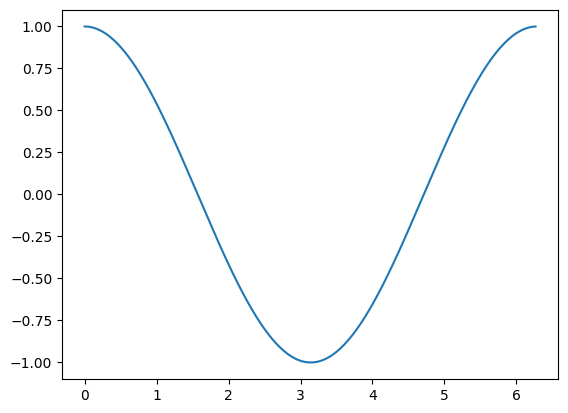

In [ ]:
plt.plot(angles_rad, np.cos(angles_rad))

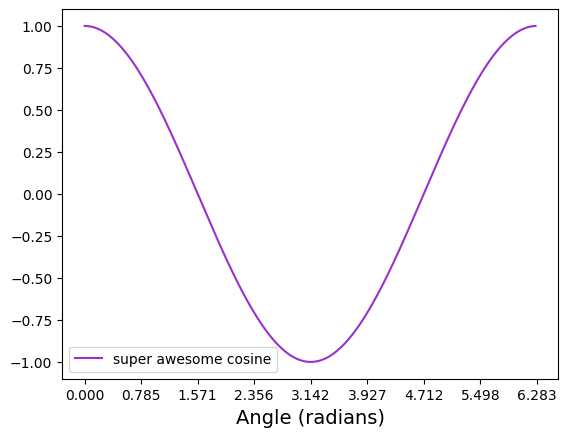

In [ ]:
plt.plot(angles_rad, np.cos(angles_rad), color='darkorchid', label="super awesome cosine")
plt.xlabel("Angle (radians)", fontsize=14)
plt.xticks(np.linspace(0, 2*np.pi, 9))
plt.legend()
plt.show()

## 1.3 loading data

In this section we will use numpy to read some scattering data in different formats.

In [ ]:
# This will download the file to our google colab workspace
url = 'https://raw.githubusercontent.com/SasView/sasview/main/src/sas/example_data/1d_data/100nmPinholeSphere.txt'
!wget 'content/' {url}

--2024-01-20 03:11:26--  http://content/
Resolving content (content)... failed: Name or service not known.
wget: unable to resolve host address ‘content’
--2024-01-20 03:11:26--  https://raw.githubusercontent.com/SasView/sasview/main/src/sas/example_data/1d_data/100nmPinholeSphere.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5977 (5.8K) [text/plain]
Saving to: ‘100nmPinholeSphere.txt’

100nmPinholeSphere. 100%[===================>]   5.84K  --.-KB/s    in 0s      

2024-01-20 03:11:26 (43.7 MB/s) - ‘100nmPinholeSphere.txt’ saved [5977/5977]

FINISHED --2024-01-20 03:11:26--
Total wall clock time: 0.3s
Downloaded: 1 files, 5.8K in 0s (43.7 MB/s)


In [ ]:
# the argument to the loadtxt function, everything in (), is now a file path to the data
# this would either be a relative or absolute path on your computer if you were working with a local script
data = np.loadtxt('100nmPinholeSphere.txt', skiprows=12) # the skiprows argument allows us to skip the header in the file that is not part of the table format

In [ ]:
data.shape

(150, 4)

In [ ]:
# the data will show up as an n x 4 array
# the second dimension refers to q, I(q), I(q) error, sigma q
data

array([[1.00e-03, 2.41e+03, 2.41e+01, 1.50e-04],
       [1.04e-03, 2.40e+03, 2.40e+01, 1.56e-04],
       [1.09e-03, 2.39e+03, 2.39e+01, 1.63e-04],
       [1.13e-03, 2.37e+03, 2.37e+01, 1.70e-04],
       [1.18e-03, 2.36e+03, 2.36e+01, 1.77e-04],
       [1.23e-03, 2.34e+03, 2.34e+01, 1.85e-04],
       [1.28e-03, 2.33e+03, 2.33e+01, 1.93e-04],
       [1.34e-03, 2.31e+03, 2.31e+01, 2.01e-04],
       [1.40e-03, 2.29e+03, 2.29e+01, 2.09e-04],
       [1.46e-03, 2.27e+03, 2.27e+01, 2.18e-04],
       [1.52e-03, 2.25e+03, 2.25e+01, 2.28e-04],
       [1.58e-03, 2.23e+03, 2.23e+01, 2.37e-04],
       [1.65e-03, 2.20e+03, 2.20e+01, 2.47e-04],
       [1.72e-03, 2.18e+03, 2.18e+01, 2.58e-04],
       [1.79e-03, 2.15e+03, 2.15e+01, 2.69e-04],
       [1.87e-03, 2.12e+03, 2.12e+01, 2.80e-04],
       [1.95e-03, 2.08e+03, 2.08e+01, 2.92e-04],
       [2.03e-03, 2.05e+03, 2.05e+01, 3.05e-04],
       [2.12e-03, 2.01e+03, 2.01e+01, 3.18e-04],
       [2.21e-03, 1.97e+03, 1.97e+01, 3.31e-04],
       [2.30e-03, 1.

Text(0, 0.5, 'I(q) (1/cm)')

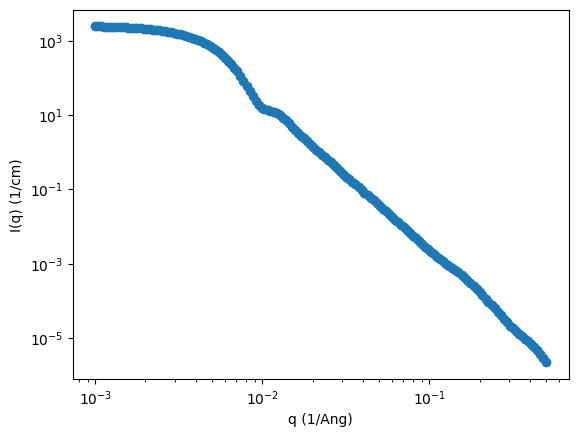

In [ ]:
plt.scatter(data[:,0], data[:,1])
plt.yscale('log')
plt.xscale('log')
plt.xlabel('q (1/Ang)')
plt.ylabel('I(q) (1/cm)')

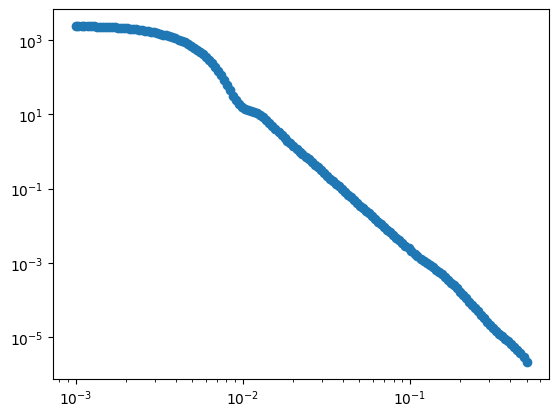

In [ ]:
plt.loglog(data[:,0], data[:,1], 'o')

We can perform simple transformations on the data, e.g. removing incoherent background, in a numpy array:

--2024-01-20 03:13:06--  http://content/
Resolving content (content)... failed: Name or service not known.
wget: unable to resolve host address ‘content’
--2024-01-20 03:13:06--  https://raw.githubusercontent.com/SasView/sasview/main/src/sas/example_data/1d_data/n_coreshell.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6349 (6.2K) [text/plain]
Saving to: ‘n_coreshell.txt.1’

n_coreshell.txt.1   100%[===================>]   6.20K  --.-KB/s    in 0s      

2024-01-20 03:13:06 (52.5 MB/s) - ‘n_coreshell.txt.1’ saved [6349/6349]

FINISHED --2024-01-20 03:13:06--
Total wall clock time: 0.09s
Downloaded: 1 files, 6.2K in 0s (52.5 MB/s)


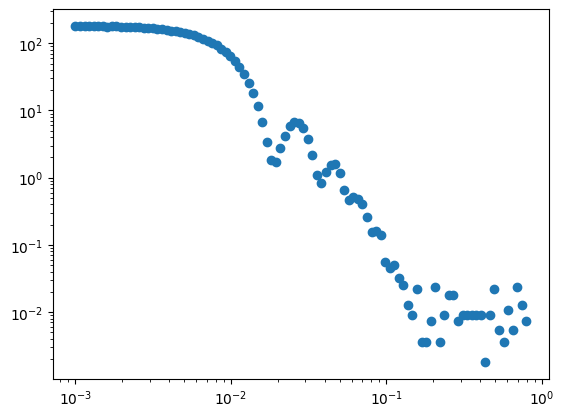

In [ ]:
url = 'https://raw.githubusercontent.com/SasView/sasview/main/src/sas/example_data/1d_data/n_coreshell.txt'
!wget 'content/' {url}
data = np.loadtxt('/content/n_coreshell.txt', skiprows=5)
plt.loglog(data[:,0], data[:,1], 'o')

In [ ]:
data[:,0]>0.1

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
selection = data[:,0]>0.1

In [ ]:
background = np.average(data[selection,1])

In [ ]:
data_sub = np.copy(data)

In [ ]:
data_sub[:,1] = data_sub[:,1] - background

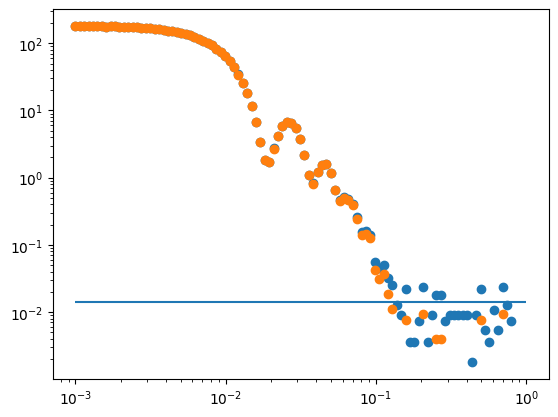

In [ ]:
plt.loglog(data[:,0], data[:,1], 'o')
plt.loglog(data_sub[:,0], data_sub[:,1], 'o')
plt.hlines(background, 0.001, 1)

## 1.4 functions and loops

In [ ]:
def do_something(print_statement, do_it_twice=False):
  print(print_statement)
  if do_it_twice:
    print(print_statement)

In [ ]:
do_something('I will print this statement.')

I will print this statement.


In [ ]:
do_something('I will print this statement.', do_it_twice=True)

I will print this statement.
I will print this statement.


In [ ]:
do_something()

TypeError: do_something() missing 1 required positional argument: 'print_statement'

In [ ]:
for i in range(5):
  print(i)

0
1
2
3
4


In [ ]:
for j in ['no', 'yes', 'maybe']:
  print(j)

no
yes
maybe


In [ ]:
for k in {'yes':'no'}:
  print(k)

yes


In [ ]:
# enumerating through the items of a dictionary give you the key: value pairs that you can set as i and j, respectively
test_dict = {
    '1': 'one',
    '2': 'two',
    '3': 'four'
}
for i, j in test_dict.items():
  print(i, j)

1 one
2 two
3 four


## 1.5 EXERCISE: Practice basic Python concepts

Practice basic Python concepts learned in section 1 by removing the flat background from multiple SANS datasets. The first cell has been started for you and will load the files into your Google colab directory. The files are:  
x_coreshell_1.txt  
x_coreshell_2.txt  
x_coreshell_3.txt  
x_coreshell_4.txt  

Follow along with the commented prompts in the cell below to load the data into a dictionary, remove the background for each file, and plot the data on separate plots that shows the data before and after background removal.




In [ ]:
# run this cell to download all the data to your google colab file system
url = 'https://raw.githubusercontent.com/SasView/sasview/main/src/sas/example_data/1d_data/x_coreshell_1.txt'
!wget 'content/' {url}

url = 'https://raw.githubusercontent.com/SasView/sasview/main/src/sas/example_data/1d_data/x_coreshell_2.txt'
!wget 'content/' {url}

url = 'https://raw.githubusercontent.com/SasView/sasview/main/src/sas/example_data/1d_data/x_coreshell_3.txt'
!wget 'content/' {url}

url = 'https://raw.githubusercontent.com/SasView/sasview/main/src/sas/example_data/1d_data/x_coreshell_4.txt'
!wget 'content/' {url}

--2024-01-20 03:14:34--  http://content/
Resolving content (content)... failed: Name or service not known.
wget: unable to resolve host address ‘content’
--2024-01-20 03:14:34--  https://raw.githubusercontent.com/SasView/sasview/main/src/sas/example_data/1d_data/x_coreshell_1.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61248 (60K) [text/plain]
Saving to: ‘x_coreshell_1.txt’

x_coreshell_1.txt   100%[===================>]  59.81K  --.-KB/s    in 0.02s   

2024-01-20 03:14:34 (3.76 MB/s) - ‘x_coreshell_1.txt’ saved [61248/61248]

FINISHED --2024-01-20 03:14:34--
Total wall clock time: 0.3s
Downloaded: 1 files, 60K in 0.02s (3.76 MB/s)
--2024-01-20 03:14:34--  http://content/
Resolving content (content)... failed: Name or service not known.
wget: unable

In [ ]:
# start by creating a list of filenames, the first one is done for you

filenames = [
    '/content/x_coreshell_1.txt',
    '/content/x_coreshell_2.txt',
    '/content/x_coreshell_3.txt',
    '/content/x_coreshell_4.txt',
]

# let's create an empty dictionary where we will store the datasets we load
data_dict = {}

# now let's use numpy to load each of the datasets into an array and save them
# in the dictionary; we can use the filenames for the dictionary keys or you
# can use whatever other format you would like
# HINT: use a loop here so you don't have to type out loading each file!
# HINT: skip the first 9 rows of the file as these are part of the header
for file in filenames:
  data = np.loadtxt(file, skiprows=9)
  data_dict[file] = data

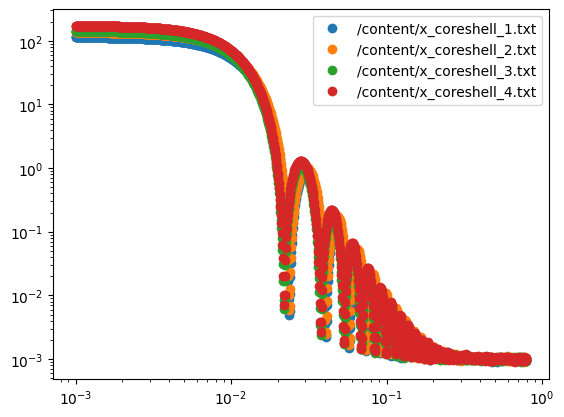

In [ ]:
# plot the datasets to see what you are working with
# again, try using a loop to cycle through all the datasets in the dictionary

for key, data in data_dict.items():
  plt.loglog(data[:,0], data[:,1], 'o', label=key)

plt.legend()

In [ ]:
# create a function that removes the flat background from a dataset
# and then returns the subtracted dataset

def remove_background(data, q_limit=0.2):
  selection = (data[:,0]>q_limit)
  background = np.average(data[selection, 1])
  data_sub = np.copy(data)
  data_sub[:,1] = data_sub[:,1] - background
  return data_sub


In [ ]:
# now loop through the data again but use your function to remove the background
# and then store the subtracted data in a new dictionary

data_sub_dict = {}

for key, data in data_dict.items():
  data_sub = remove_background(data, q_limit=0.3)
  data_sub_dict[key] = data_sub

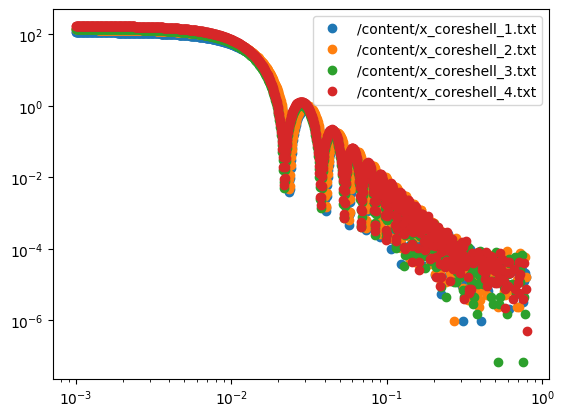

In [ ]:
# plot your subtracted datasets to see the results

for key, data in data_sub_dict.items():
  plt.loglog(data[:,0], data[:,1], 'o', label=key)

plt.legend()

Great work! Let's think about ways that the code above is specific to this dataset. In what ways would we need to change the code to make this more broadly applicable? How would you make your code more sophisticated in the future?

# 2.&nbsp;Simulating data with sasmodels

In [ ]:
# we need to install packages that are not standard on the colab environment
!pip install bumps==0.9.1 sasmodels==1.0.7 periodictable==1.6.1
!pip install sasdata==0.8.1
!pip install tol-colors
!pip install git+https://github.com/SasView/sasview.git@v5.0.6

# import sasmodels
import sasmodels
import sasmodels.core
import sasmodels.data
import sasmodels.bumps_model

# import bumps
import bumps
import bumps.fitters
import bumps.names
import bumps.fitproblem

# import sasdata
import sasdata
from sasdata.dataloader.loader import Loader

# import sasview for some legacy sesans functionality
import sas

import numpy as np
import os
import periodictable
import periodictable.nsf
import tol_colors as tc # colorblind safe color palettes


"""
import matplotlib.pyplot and set custom default settings for plots
"""
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
plt.rc('font', size=14) # default fontsize
plt.rc('axes', titlesize=16)
plt.rc('axes', labelsize=16)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)
plt.rc('legend', title_fontsize=14)
plt.rc('figure', titlesize=18)
plt.rc("figure", figsize=(5,5))
plt.rc("lines", linewidth=3)


# use colorblind safe colors:
plt.rc('axes', prop_cycle=plt.cycler('color', list(tc.tol_cset('muted'))))
try:
    plt.cm.register_cmap('tc_iridescent', tc.tol_cmap('iridescent'))
except:
    pass
plt.rc('image', cmap='tc_iridescent')

%config InlineBackend.figure_format = 'retina'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.1/542.1 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.4/535.4 kB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 752.5/752.5 kB 41.4 MB/s eta 0:00:00
  Created wheel for bumps: filename=bumps-0.9.1-py3-none-any.whl size=566579 sha256=ab7afd2751208f8ae59282b58cdb64c7b8000f3839bdabd3c78a5f6d0c1ab4cb
  Stored in directory: /root/.cache/pip/wheels/25/70/9e/42433bcbbc136dc4f6fe739502274008276e5a40270a260086
Successfully built bumps
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.1/248.1 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 8.2 MB/s eta 0:00:00
  Created wheel for xmlrunner: filename=xmlrunner-1.7.7-py3-none-any.whl size=6223 sha256=bc0c7e111a8ad93f8afabacd4d88e4b90e6b877639ea7dabeda7067

<ipython-input-35-3b4fb3a76ef7>:38: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')
<ipython-input-35-3b4fb3a76ef7>:54: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  plt.cm.register_cmap('tc_iridescent', tc.tol_cmap('iridescent'))


All available models can be accessed through the sasmodels `core` module. With `sasmodels.core.list_models()`:

In [ ]:
sasmodels.core.list_models()

['adsorbed_layer',
 'barbell',
 'bcc_paracrystal',
 'be_polyelectrolyte',
 'binary_hard_sphere',
 'broad_peak',
 'capped_cylinder',
 'core_multi_shell',
 'core_shell_bicelle',
 'core_shell_bicelle_elliptical',
 'core_shell_bicelle_elliptical_belt_rough',
 'core_shell_cylinder',
 'core_shell_ellipsoid',
 'core_shell_parallelepiped',
 'core_shell_sphere',
 'correlation_length',
 'cylinder',
 'dab',
 'ellipsoid',
 'elliptical_cylinder',
 'fcc_paracrystal',
 'flexible_cylinder',
 'flexible_cylinder_elliptical',
 'fractal',
 'fractal_core_shell',
 'fuzzy_sphere',
 'gauss_lorentz_gel',
 'gaussian_peak',
 'gel_fit',
 'guinier',
 'guinier_porod',
 'hardsphere',
 'hayter_msa',
 'hollow_cylinder',
 'hollow_rectangular_prism',
 'hollow_rectangular_prism_thin_walls',
 'lamellar',
 'lamellar_hg',
 'lamellar_hg_stack_caille',
 'lamellar_stack_caille',
 'lamellar_stack_paracrystal',
 'line',
 'linear_pearls',
 'lorentz',
 'mass_fractal',
 'mass_surface_fractal',
 'mono_gauss_coil',
 'multilayer_vesic

## 2.1 sasmodels `kernel`
In order to access these models, we use sasmodels to build a `kernel`, which includes the theory for a specific model. The kernel includes all the information required to calculate the scattering intensity for a specific system, e.g., monodisperse spheres. We haven't yet told it anything about our data to fit or what format of data we want, i.e., 1D vs. 2D. This is just the theory part of the model.

Let's look at the [sphere](https://www.sasview.org/docs/user/models/sphere.html) form factor as our first example.

In [ ]:
# Create the sphere kernel
kernel = sasmodels.core.load_model("sphere")

We can access the documentation and description found in the source files for each model:

In [ ]:
print(kernel.info.description)

P(q)=(scale/V)*[3V(sld-sld_solvent)*(sin(qr)-qr cos(qr))
                /(qr)^3]^2 + background
    r: radius of sphere
    V: The volume of the scatter
    sld: the SLD of the sphere
    sld_solvent: the SLD of the solvent



In [ ]:
print(kernel.info.docs)


For information about polarised and magnetic scattering, see
the :ref:`magnetism` documentation.

Definition
----------

The 1D scattering intensity is calculated in the following way (Guinier, 1955)

.. math::

    I(q) = \frac{\text{scale}}{V} \cdot \left[
        3V(\Delta\rho) \cdot \frac{\sin(qr) - qr\cos(qr))}{(qr)^3}
        \right]^2 + \text{background}

where *scale* is a volume fraction, $V$ is the volume of the scatterer,
$r$ is the radius of the sphere and *background* is the background level.
*sld* and *sld_solvent* are the scattering length densities (SLDs) of the
scatterer and the solvent respectively, whose difference is $\Delta\rho$.

Note that if your data is in absolute scale, the *scale* should represent
the volume fraction (which is unitless) if you have a good fit. If not,
it should represent the volume fraction times a factor (by which your data
might need to be rescaled).

The 2D scattering intensity is the same as above, regardless of the
orientation of $\vec 

In [ ]:
kernel.info.parameters.defaults

{'scale': 1,
 'background': 0.001,
 'sld': 1,
 'sld_solvent': 6,
 'radius': 50,
 'up_frac_i': 0.0,
 'up_frac_f': 0.0,
 'up_angle': 0.0,
 'up_phi': 0.0,
 'sld_M0': 0.0,
 'sld_mtheta': 0.0,
 'sld_mphi': 0.0,
 'sld_solvent_M0': 0.0,
 'sld_solvent_mtheta': 0.0,
 'sld_solvent_mphi': 0.0}

In [ ]:
kernel.info.parameters.iq_parameters

[P<sld>, P<sld_solvent>, P<radius>]

In order to call our kernel, i.e., simulate scattering intensity, I(q), as a function of q, we need to create a callable version of the model. However, we need to give the kernel a dataset to know what type of data to return (1D vs. 2D). In this case, since we just want to simulate data, we can use an empty dataset using the `data` module in sasmodels:

In [ ]:
# Create an Empty 1D dataset of 1000 log-spaced q-values between 1e-4 inverse Angstroms and 1 inverse Angstroms.

q_min = 1e-4
q_max = 1
num_q = 10000
q = np.logspace(np.log10(q_min), np.log10(q_max), num_q)
data = sasmodels.data.empty_data1D(q)

To create the callable kernel, we will use the `direct_model` module:

In [ ]:
model_name = "sphere"
kernel = sasmodels.core.load_model(model_name)
direct_model = sasmodels.direct_model.DirectModel(data, kernel)

Now we can call the kernal like a function in python and provide the required parameter values as arguments:

In [ ]:
Iq = direct_model(
    # values of parameters can be set as arguments
    radius = 200,
    background = 0.1,
    scale = 0.1,
    sld = 1,
    sld_solvent = 6,
)

In [ ]:
params = {
    'radius': 200,
    'background': 0.1,
    'scale': 0.1,
    'sld': 1,
    'sld_solvent': 6
}
Iq = direct_model(**params)

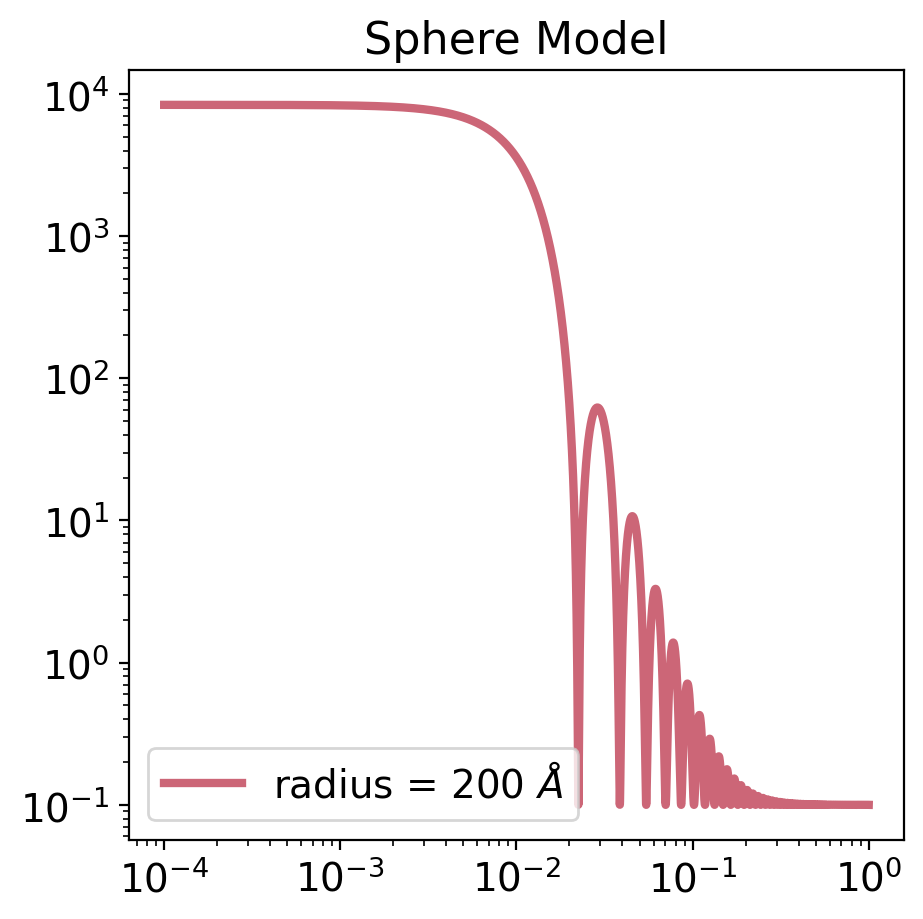

In [ ]:
# plot the data with your favorite Python plotting tool, here I am using matplotlib.pyplot

plt.loglog(data.x, Iq, label="radius = 200 $\AA$")
plt.title("Sphere Model")
plt.legend()
plt.show()

## 2.2 EXERCISE: Use a sasmodels `kernel` to explore a different model other than a sphere form factor.

What if you didn't have a system of spheres? What if you had cylinders, ellipsoids, or maybe you expect a fractal? So far we have only looked at sphere models, but SasView includes a wide range of shape and shape-independent models. You can find them listed in the SasView [documentation](https://www.sasview.org/docs/user/qtgui/Perspectives/Fitting/models/index.html) or pick a random one from the list generated by `sasmodels.core.list_models()`.

Pick a new model, create a callable kernel or model, and explore how the scattering signal is affected by changes to the parameter values.

In [ ]:
q_min = 0.001
q_max = 1
num_q = 1000
q = np.logspace(np.log10(q_min), np.log10(q_max), num_q)
data = sasmodels.data.empty_data1D(q)

kernel = sasmodels.core.load_model("ellipsoid")
call_kernel = sasmodels.direct_model.DirectModel(data, model=kernel)
kernel.info.parameters.defaults

{'scale': 1,
 'background': 0.001,
 'sld': 4,
 'sld_solvent': 1,
 'radius_polar': 20,
 'radius_equatorial': 400,
 'theta': 60,
 'phi': 60,
 'up_frac_i': 0.0,
 'up_frac_f': 0.0,
 'up_angle': 0.0,
 'up_phi': 0.0,
 'sld_M0': 0.0,
 'sld_mtheta': 0.0,
 'sld_mphi': 0.0,
 'sld_solvent_M0': 0.0,
 'sld_solvent_mtheta': 0.0,
 'sld_solvent_mphi': 0.0}

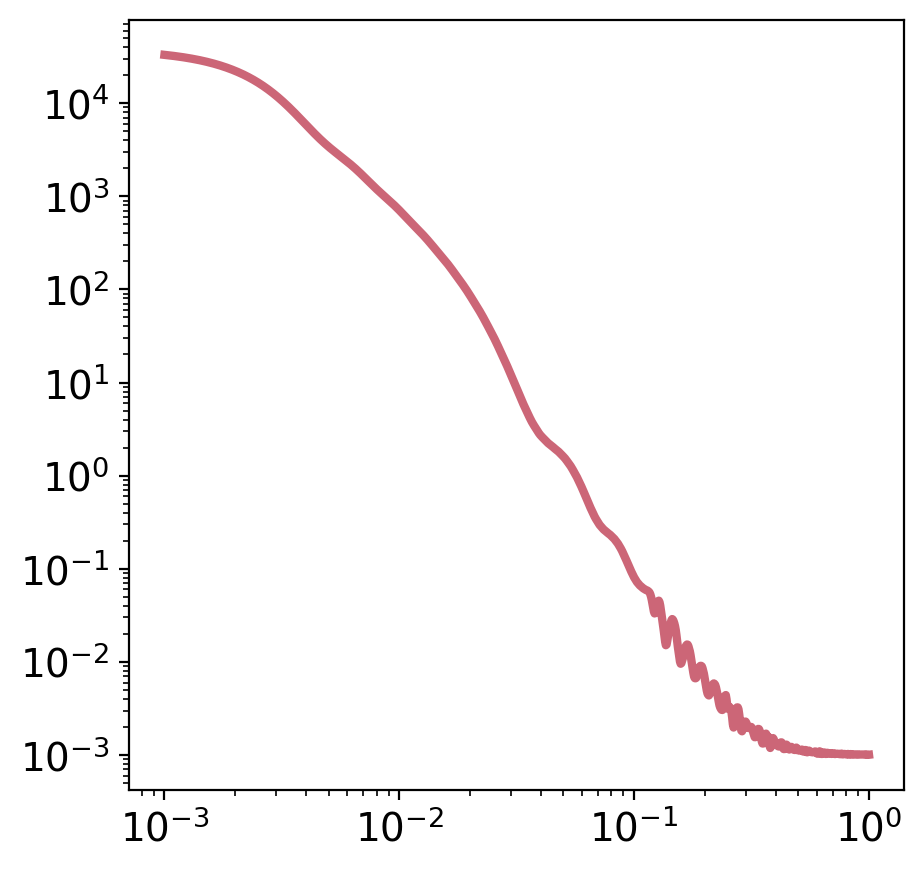

In [ ]:
params = {
    "scale": 0.1,
    "radius_equatorial": 1000,
    "radius_polar": 100
}

Iq = call_kernel(**params)
plt.loglog(data.x, Iq)

## 2.3 polydispersity

Up until now, we have been working with monodisperse systems, however polydispersity can also be applied to certain parameters. Those parameters for 1D and 2D systems are identified in the kernel info:

In [ ]:
kernel = sasmodels.core.load_model("sphere")
kernel.info.parameters.pd_1d, kernel.info.parameters.pd_2d

({'radius'}, {'radius'})

The polydispersity is set using a special set of \*\_pd\_\* parameters:
* `*_pd*` is the width of the polydispersity and the exact definition will depend on the type of distribution specified; in this cause of a 'gaussian` distribution, it is defined as as $\frac{\sigma}{x_{mean}}$
* `*_pd_type*` defines the type of polydispersity distribution used
* `*_pd_n` corresponds to the the number of points in the distribution used by the calculation (Npts in the image below)
* `*_pd_nsigma` sets the range of the distribution sampled (Nsigmas in the image below)

For example, radius polydispersity could be defined by specifying **all four** of the pd parameters. With the default values, this would look like:
* `radius_pd = 0`
* `radius_pd_type = 'gaussian'`
* `radius_pd_n = 35`
* `radius_pd_nsigma = 3`

The available polydispersity distributions are defined in the SasView [documentation](https://www.sasview.org/docs/user/qtgui/Perspectives/Fitting/pd/polydispersity.html) but we can access them directly through the sasmodels `weights` module.

The 'gaussian' distribution is claculed by:

$$
f(x) = \frac{1}{Norm}\exp\left(-\frac{(x-x_{mean})^2}{2\sigma^2}\right)
$$

<img src=https://www.sasview.org/docs/_images/pd_gaussian.jpg>

*Image source: https://www.sasview.org/docs/user/qtgui/Perspectives/Fitting/pd/polydispersity.html*


Let's plot the default gaussian distribution but apply a pd value greater than 0 (apply polydispersity).

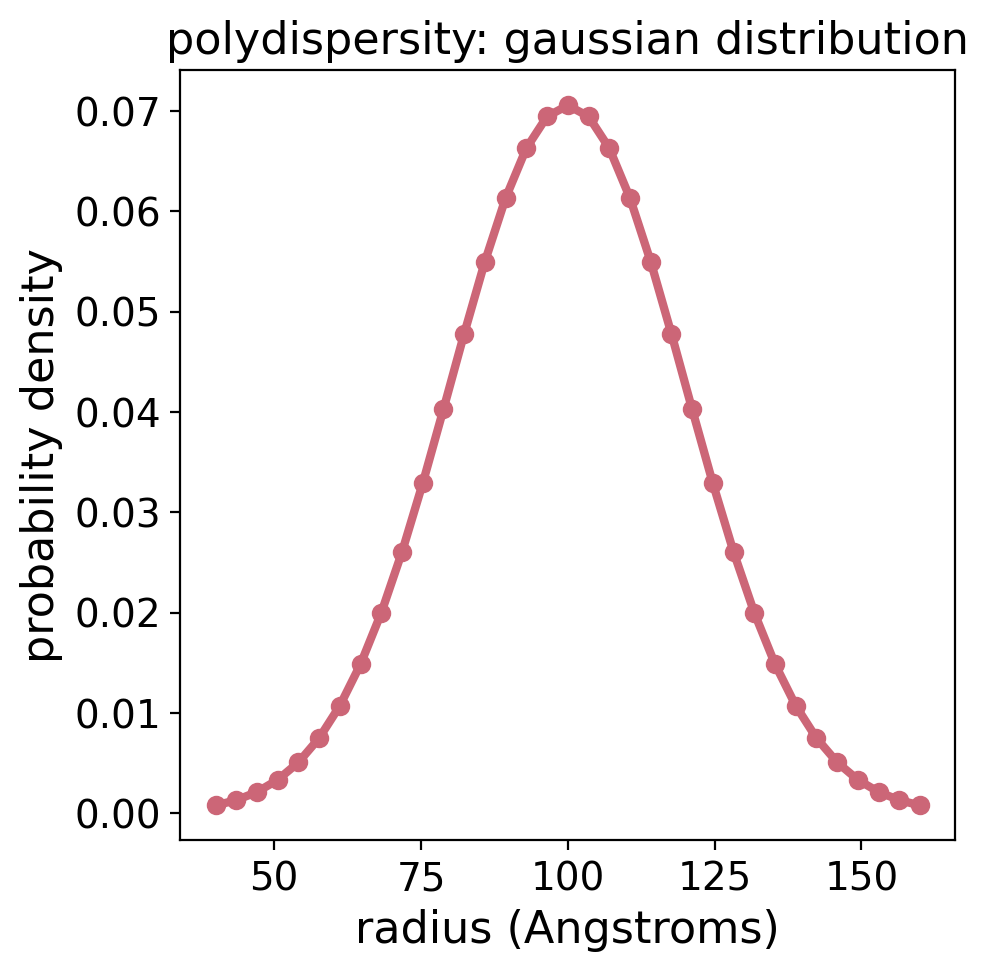

In [ ]:
distribution = "gaussian"

# The probability density function can be accessed using the weights.get_weights() method in sasmodels
pdf = sasmodels.weights.get_weights(
    distribution,
    n=35,               # _pd_n parameter
    width=0.2,          # this is equal to _pd parameter, or sigma/x_mean
    nsigmas=3,          # _pd_nsigma parameter
    value=100,          # corresponds to x_mean, or the value of the parameter to which polydispersity is applied, in this case it is the radius
    limits=[0, np.inf], # hard limit on the possible values (can't have negative radius)
    relative=True       # set to true if width is in proportion to the parameter value, or x_mean in this case
)

plt.errorbar(pdf[0], pdf[1], fmt='o-')
plt.xlabel("radius (Angstroms)")
plt.ylabel("probability density")
plt.title(f"polydispersity: {distribution} distribution")
plt.show()

We also notice that with the limits argument we can set hard limits on the possible values of the parameter across the distribution. Notice that when our radius is low and polydispersity is high, the distribution is cutoff at 0, the lower limit we have set.

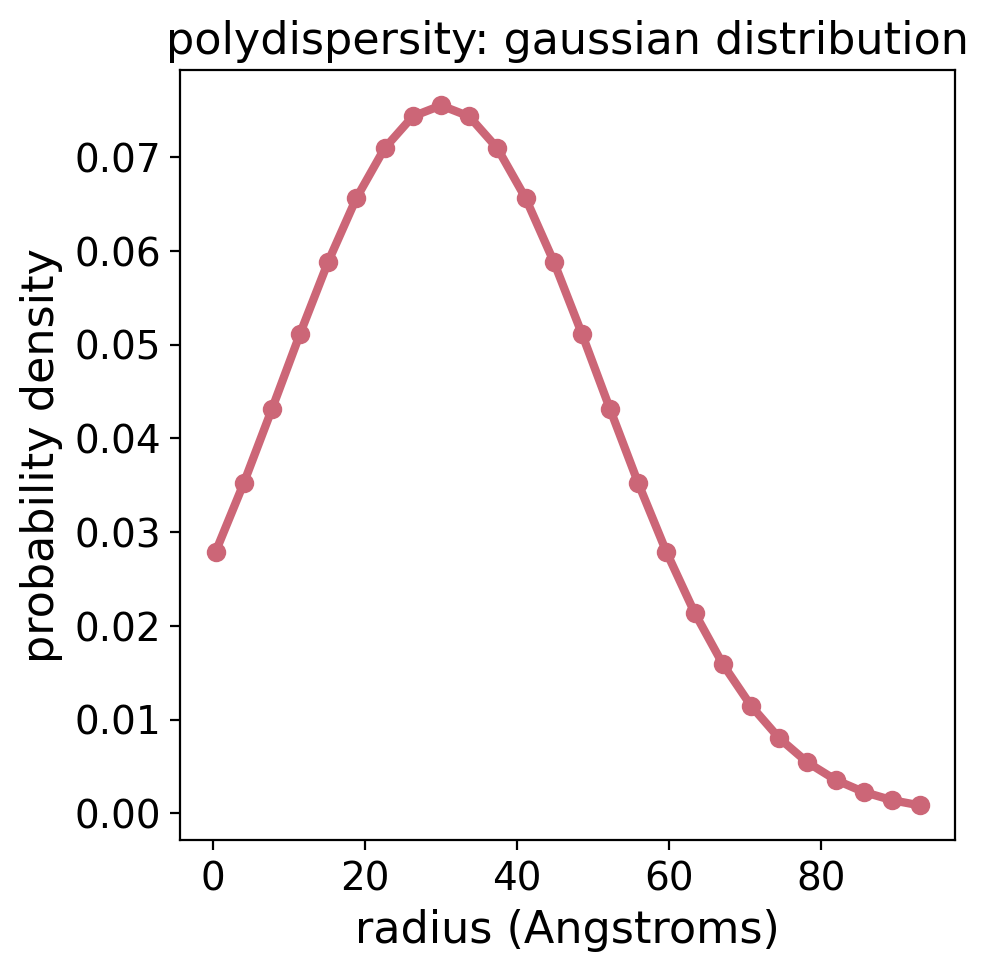

In [ ]:
distribution = "gaussian"

# The probability density function can be accessed using the weights.get_weights() method in sasmodels
pdf = sasmodels.weights.get_weights(
    distribution,
    n=35,               # _pd_n parameter
    width=0.7,          # this is equal to _pd parameter, or sigma/x_mean
    nsigmas=3,          # _pd_nsigma parameter
    value=30,          # corresponds to x_mean, or the value of the parameter to which polydispersity is applied, in this case it is the radius
    limits=[0, np.inf], # hard limit on the possible values (can't have negative radius)
    relative=True       # set to true if width is in proportion to the parameter value, or x_mean in this case
)

plt.errorbar(pdf[0], pdf[1], fmt='o-')
plt.xlabel("radius (Angstroms)")
plt.ylabel("probability density")
plt.title(f"polydispersity: {distribution} distribution")
plt.show()

Gaussian is only one type of polydispersity distribution that we can apply. Others include 'boltzmann', 'uniform', 'lognormal', 'schulz' and more. The available distributions are defined in greater detail in the sasview [documentation](https://www.sasview.org/docs/user/qtgui/Perspectives/Fitting/pd/polydispersity.html) linked here.

Another example of the lognormal distribution is shown here:

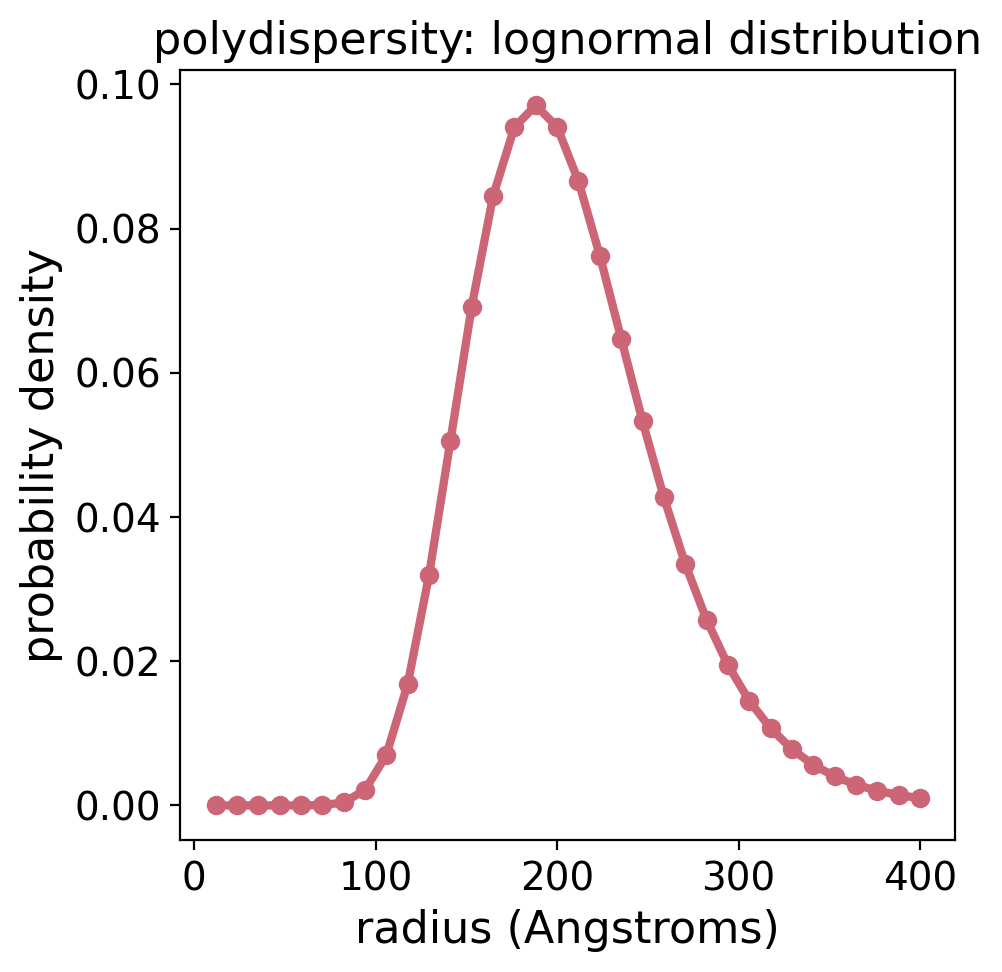

In [ ]:
distribution = "lognormal"
pdf = sasmodels.weights.get_weights(
    distribution,
    n=35, # _pd_n parameter
    width=0.25, # this is equal to _pd parameter, or sigma/x_mean
    nsigmas=4, # _pd_nsigma parameter
    value=200, # corresponds to x_mean, or the value of the parameter to which polydispersity is applied, in this case it is the radius
    limits=[0, np.inf], # hard limit on the possible values (can't have negative radius)
    relative=True # set to true if width is in proportion to the parameter value, or x_mean in this case
)

plt.errorbar(pdf[0], pdf[1], fmt='o-')
plt.xlabel("radius (Angstroms)")
plt.ylabel("probability density")
plt.title(f"polydispersity: {distribution} distribution")
plt.show()

## 2.4 resolution

Up until now, we have not yet considered the effects of smearing on our data. We can look at the resolution specified on our callable kernel and it will be listed as a `Perfect1D` system unless we would like to apply a `Pinhole1D` or `Slit1D` resolution function to our data.



In [ ]:
q_min = 1e-4
q_max = 0.3
num_q = 1000
q = np.logspace(np.log10(q_min), np.log10(q_max), num_q)
data = sasmodels.data.empty_data1D(q)

# create callable kernel
model_name = "sphere"
kernel = sasmodels.core.load_model(model_name)
model = sasmodels.direct_model.DirectModel(data, kernel)

model.resolution

### pinhole smearing

<img width=600 src="https://drive.google.com/uc?id=1BDEiWSxrOwa17QBomEUSmphl5a2rcLu5">

*Image source: https://sestar.irb.hr/images/instrumenti/documents/52.pdf*


### slit smearing

<img width=600 src="https://saxs-igorcodedocs.readthedocs.io/en/stable/_images/SmearingGeometry.jpg">


*Source of slit smearing image: https://saxs-igorcodedocs.readthedocs.io/en/stable/Irena/Desmearing.html*


The resolution functions available are defined in the SasView [documentation](https://www.sasview.org/docs/user/qtgui/Perspectives/Fitting/resolution.html), but let's explore how the model is affected by pinhole and slit smearing.

In [ ]:
q_min = 0.00005
q_max = 0.5
num_q = 1000
q = np.logspace(np.log10(q_min), np.log10(q_max), num_q)
data = sasmodels.data.empty_data1D(q)

model_name = "sphere"
kernel = sasmodels.core.load_model(model_name)

The default resolution is set at Perfect1D. First calculate the scattering intensity with no smearing effects.

In [ ]:
model = sasmodels.direct_model.DirectModel(data, kernel)
Iq_perfect1d = model(radius=500)

Now apply pinole resolution with a delta(q)/q value of 15%.

In [ ]:
dq_q = 0.08 # 8 % d(q)/q
dq = dq_q * data.x
dq

array([4.00000000e-06, 4.03704876e-06, 4.07444068e-06, 4.11217893e-06,
       4.15026671e-06, 4.18870728e-06, 4.22750388e-06, 4.26665983e-06,
       4.30617845e-06, 4.34606310e-06, 4.38631717e-06, 4.42694407e-06,
       4.46794727e-06, 4.50933025e-06, 4.55109653e-06, 4.59324966e-06,
       4.63579321e-06, 4.67873082e-06, 4.72206611e-06, 4.76580279e-06,
       4.80994457e-06, 4.85449519e-06, 4.89945846e-06, 4.94483817e-06,
       4.99063821e-06, 5.03686245e-06, 5.08351484e-06, 5.13059932e-06,
       5.17811991e-06, 5.22608065e-06, 5.27448561e-06, 5.32333890e-06,
       5.37264468e-06, 5.42240714e-06, 5.47263051e-06, 5.52331906e-06,
       5.57447710e-06, 5.62610897e-06, 5.67821906e-06, 5.73081181e-06,
       5.78389169e-06, 5.83746320e-06, 5.89153090e-06, 5.94609938e-06,
       6.00117329e-06, 6.05675730e-06, 6.11285614e-06, 6.16947459e-06,
       6.22661744e-06, 6.28428956e-06, 6.34249585e-06, 6.40124125e-06,
       6.46053077e-06, 6.52036944e-06, 6.58076235e-06, 6.64171463e-06,
      

In [ ]:
model = sasmodels.direct_model.DirectModel(data, kernel)
model.resolution = sasmodels.resolution.Pinhole1D(data.x, dq) # provide dq
Iq_pinhole1d = model(radius=500)

Finally, apply slit smearing with a slit length of 0.2 $Å^{-1}$.

In [ ]:
slit_length = 0.117
model = sasmodels.direct_model.DirectModel(data, kernel)
# qx_width is slit height from SasView (length, long dimension, perpendicular dimension) and qy_width is slit width in SasView (width, short dimension, parallel dimension)
# this nomenclature is in the process of being updated throughout the code so in the future these arguments will be called q_length and q_width
model.resolution = sasmodels.resolution.Slit1D(data.x, qx_width=slit_length, qy_width=0)
Iq_slit1d = model(radius=500)

Now create a plot to show the effects of pinhole and slit smearing. What do you notice about the effects of pinhole and slit smearing?

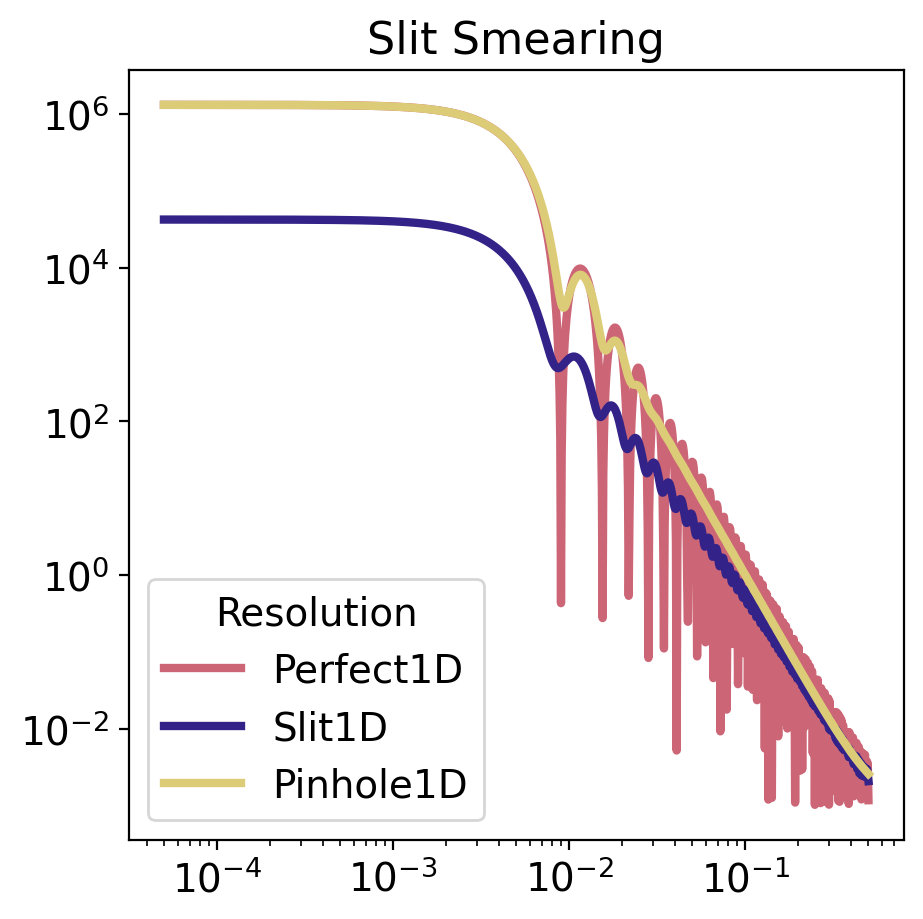

In [ ]:
plt.figure()
plt.loglog(data.x, Iq_perfect1d, label="Perfect1D")
plt.loglog(data.x, Iq_slit1d, label="Slit1D")
plt.loglog(data.x, Iq_pinhole1d, label="Pinhole1D")
plt.legend(title="Resolution")
plt.title("Slit Smearing")
plt.show()

## 2.5 EXERCISE: Explore pinhole and slit smearing.

In the previous cell, we compared pinhole and slit smearing effects on the sphere model. But how is the data effected with varying slit length or delta(q)/q values?

Create two plots that demonstrates these effects. One plot will show the sphere form factor as a function of slit length (and slit width if you have time) and the other will show the sphere form factor as a function of delta(q)/q.

Remember to implement the python basics we've covered! Maybe loops or functions can help you explore many parameters?

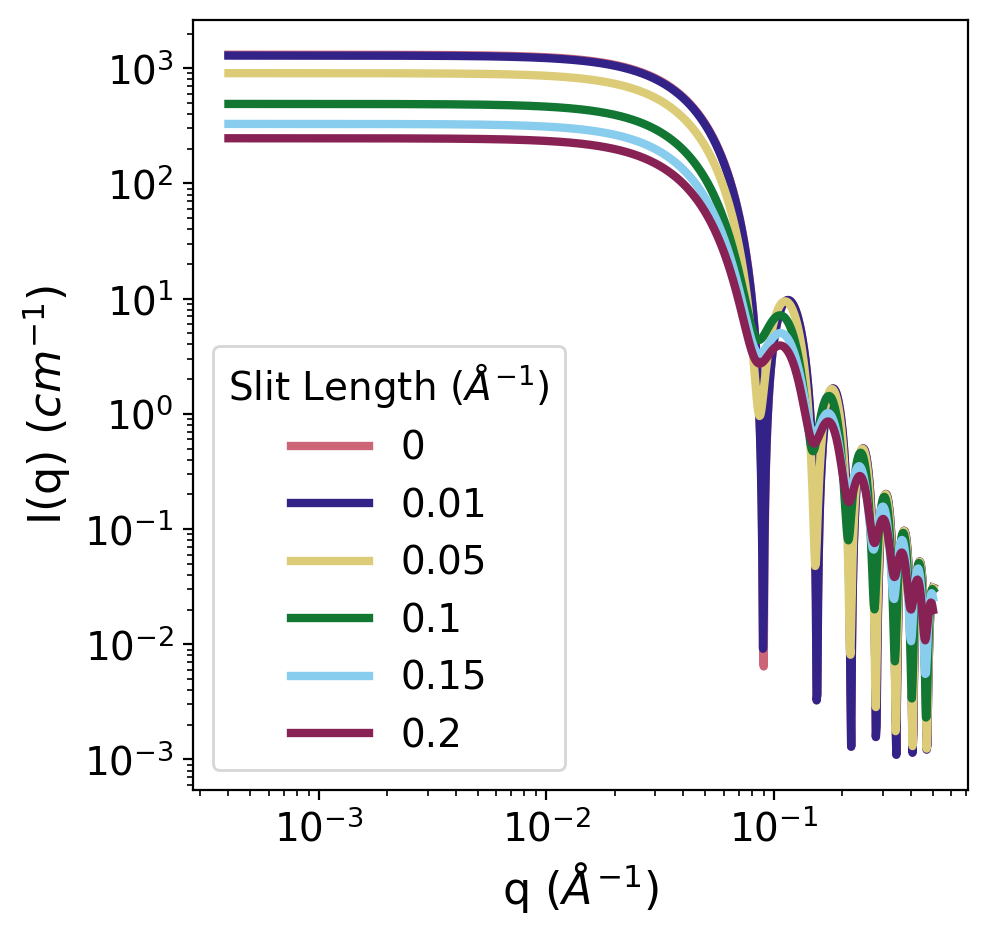

In [ ]:
q_min = 4e-4
q_max = 0.5
num_q = 1000
q = np.logspace(np.log10(q_min), np.log10(q_max), num_q)
data = sasmodels.data.empty_data1D(q)

model_name = "sphere"
kernel = sasmodels.core.load_model(model_name)

slit_lengths = [0, 0.01, 0.05, 0.1, 0.15, 0.2]

for length in slit_lengths:
    call_kernel = sasmodels.direct_model.DirectModel(data, model=kernel)
    call_kernel.resolution = sasmodels.resolution.Slit1D(data.x, length)
    Iq = call_kernel()
    plt.loglog(data.x, Iq, label=f"{length}")

plt.legend(title="Slit Length ($\AA^{-1}$)")
plt.xlabel('q ($\AA^{-1}$)')
plt.ylabel('I(q) ($cm^{-1}$)')
plt.show()

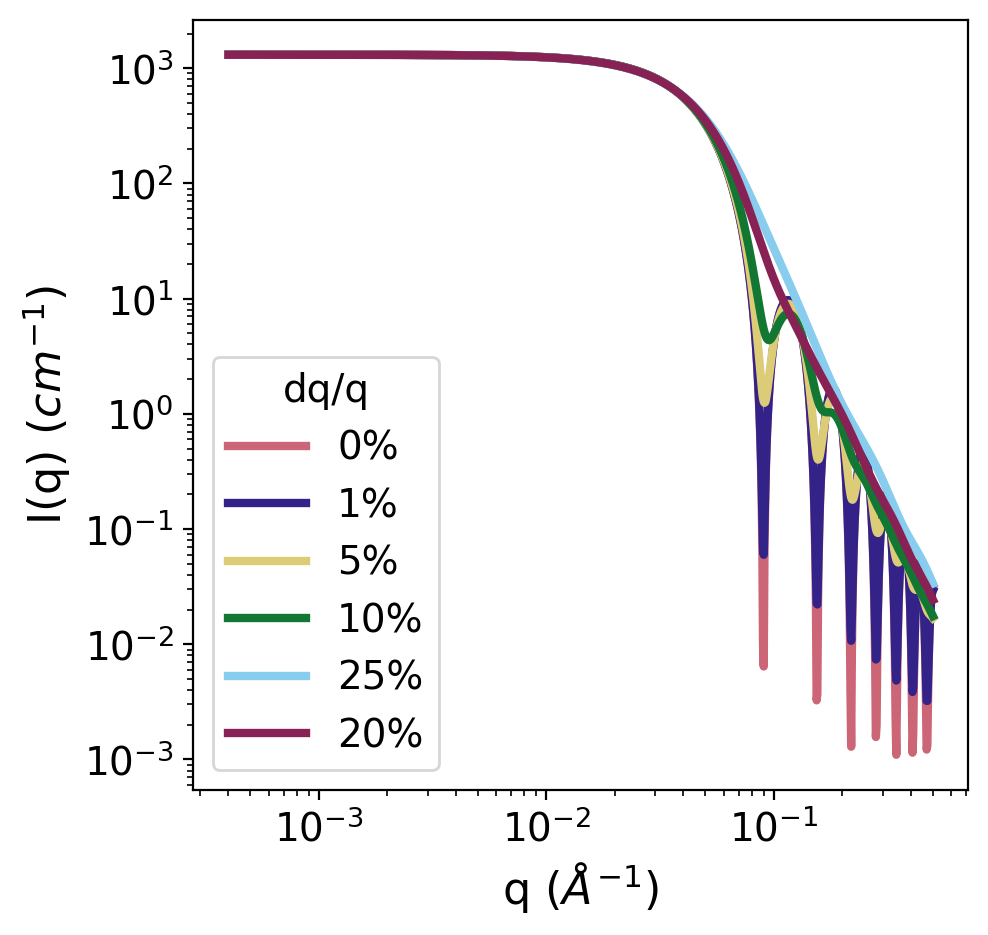

In [ ]:
q_min = 4e-4
q_max = 0.5
num_q = 1000
q = np.logspace(np.log10(q_min), np.log10(q_max), num_q)
data = sasmodels.data.empty_data1D(q)

model_name = "sphere"
kernel = sasmodels.core.load_model(model_name)

dq_q = [0, 1, 5, 10, 25, 20] # % dq/q

for dq in dq_q:
    call_kernel = sasmodels.direct_model.DirectModel(data, model=kernel)
    call_kernel.resolution = sasmodels.resolution.Pinhole1D(data.x, data.x*dq/100)
    Iq = call_kernel()
    plt.loglog(data.x, Iq, label=f"{dq}%")

plt.legend(title="dq/q")
plt.xlabel('q ($\AA^{-1}$)')
plt.ylabel('I(q) ($cm^{-1}$)')
plt.show()

## 2.6 combined models and structure factors

Models can be combined together by using '+' or '*' in the model name. For example, a binary system of spheres and cylinders could be created by loading a 'sphere+cylinder' model. What do you notice about the parameter names?

In [ ]:
q_min = 4e-4
q_max = 0.5
num_q = 1000
q = np.logspace(np.log10(q_min), np.log10(q_max), num_q)
data = sasmodels.data.empty_data1D(q)

kernel = sasmodels.core.load_model("sphere+cylinder")
kernel.info.parameters.defaults

{'scale': 1,
 'background': 0.001,
 'A_scale': 1.0,
 'A_sld': 1,
 'A_sld_solvent': 6,
 'A_radius': 50,
 'B_scale': 1.0,
 'B_sld': 4,
 'B_sld_solvent': 1,
 'B_radius': 20,
 'B_length': 400,
 'B_theta': 60,
 'B_phi': 60,
 'up_frac_i': 0.0,
 'up_frac_f': 0.0,
 'up_angle': 0.0,
 'up_phi': 0.0,
 'A_sld_M0': 0.0,
 'A_sld_mtheta': 0.0,
 'A_sld_mphi': 0.0,
 'A_sld_solvent_M0': 0.0,
 'A_sld_solvent_mtheta': 0.0,
 'A_sld_solvent_mphi': 0.0,
 'B_sld_M0': 0.0,
 'B_sld_mtheta': 0.0,
 'B_sld_mphi': 0.0,
 'B_sld_solvent_M0': 0.0,
 'B_sld_solvent_mtheta': 0.0,
 'B_sld_solvent_mphi': 0.0}

Notice how now some parameters have an `A_` or `B_` prefix which correspond to the parameters for the `sphere` and `cylinder` models, respectively. The scale and background parameters are handled carefully. There are now `scale`, `A_scale`, and `B_scale` parameters and only a single `background` parameter. These are handled in the combined model as:

$I(q)=scale*(A\_scale *sphere + B\_scale*cylinder) + background$

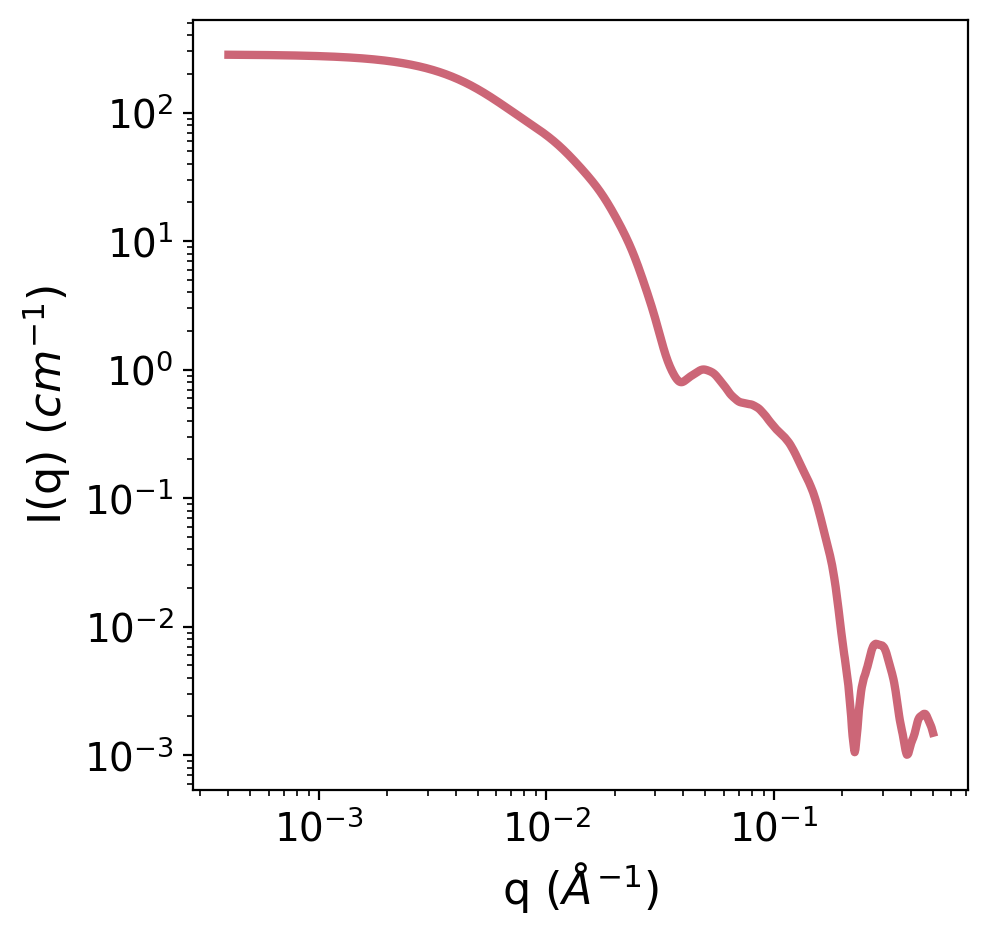

In [ ]:
call_kernel = sasmodels.direct_model.DirectModel(data, kernel)
Iq = call_kernel(
    A_radius=20,
    B_radius=100,
    B_length=1000,
    A_scale=0.01,
    B_scale=0.01
)

plt.loglog(data.x, Iq)
plt.xlabel("q ($\AA^{-1}$)")
plt.ylabel("I(q) ($cm^{-1}$)")
plt.show()

Applying a structure factor is similar, but you use a `@` symbol instead. For example, a sphere with a hardsphere structure factor would be called with "sphere@hardsphere". Note how there are no prefixes on the parameters but rather we see the addition of the structure factor parameters. Note that a radius_effective_mode of 0 should be set in order to specify the effective radius. A mode of 1 will use the radius term for the sphere model to calculate it.

In [ ]:
q_min = 0.001
q_max = 0.3
num_q = 1000
q = np.logspace(np.log10(q_min), np.log10(q_max), num_q)
data = sasmodels.data.empty_data1D(q)

data = sasmodels.data.empty_data1D(q)
kernel = sasmodels.core.load_model("sphere@hardsphere")
kernel.info.parameters.defaults

{'scale': 1,
 'background': 0.001,
 'sld': 1,
 'sld_solvent': 6,
 'radius': 50,
 'radius_effective': 50.0,
 'volfraction': 0.2,
 'structure_factor_mode': 0,
 'radius_effective_mode': 1,
 'up_frac_i': 0.0,
 'up_frac_f': 0.0,
 'up_angle': 0.0,
 'up_phi': 0.0,
 'sld_M0': 0.0,
 'sld_mtheta': 0.0,
 'sld_mphi': 0.0,
 'sld_solvent_M0': 0.0,
 'sld_solvent_mtheta': 0.0,
 'sld_solvent_mphi': 0.0}

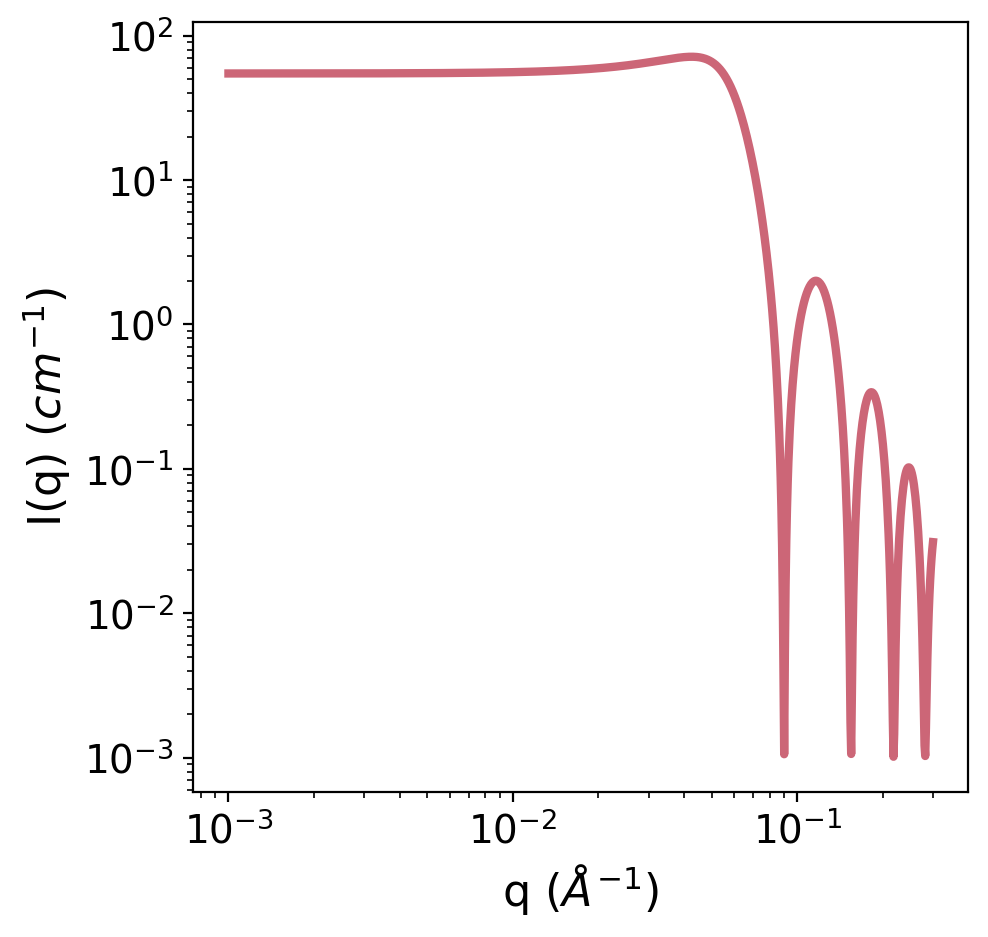

In [ ]:
model = sasmodels.direct_model.DirectModel(data, kernel)
Iq = model()

plt.loglog(data.x, Iq)
plt.xlabel("q ($\AA^{-1}$)")
plt.ylabel("I(q) ($cm^{-1}$)")
plt.show()

In [ ]:
# for radius effective modes, 0 is always unconstrained
# other modes of integers 1+ correspond to the list in each specific model
# for the sphere this is set to the radius (weighted average if polydisperse)
kernel = sasmodels.core.load_model("sphere")
kernel.info.radius_effective_modes

['radius']

In [ ]:
# try it for the cylinder model
kernel = sasmodels.core.load_model("cylinder")
kernel.info.radius_effective_modes

['excluded volume',
 'equivalent volume sphere',
 'radius',
 'half length',
 'half min dimension',
 'half max dimension',
 'half diagonal']

## 2.7 EXERCISE: Use the sasmodels model to generate simulated data for a proposal.

In this exercise you will combine what you have learned above about sasmodels kernels, i.e., how they provide a callable function for calculating the scattering intensity from q-values and parameters using the defined model such as the spherical form factor, with the Python tools you learning in Morning Session 1, including how you can calculate sld and contrast from periodictable and plotting data.

You are submitting a proposal for beamtime at the **S**uper **A**wesome **N**ew **S**ANS (SANS) beamline where you would like to measure a size series and concentration series of polystyrene nanoparticles. For the proposal, you will provide simulated datasets of your expected results. Create two plots, one for the size series and one for a concentration series of a selected size, below using the sasmodels sphere model and hardsphere structure factor.

Some helpful information:
* Polystyrene
 * (C8H8)n, density = 1.05 g/mL
 * Particle diameters available: 20, 50, 100, 250, 500, 1000 nm (+/- 5%)
 * The particles have a polydispersity of 0.1 (gaussian)
* Solvent is heavy water
* expected q range is from 0.001 $nm^{-1}$ to 10 $nm^{-1}$
* estimate a dq/q at 15%



Create an empty dataset and callable kernel:

In [ ]:
q_min = 0.001/10
q_max = 10/10
num_q = 1000
q = np.logspace(np.log10(q_min), np.log10(q_max), num_q)
data = sasmodels.data.empty_data1D(q)

kernel = sasmodels.core.load_model("sphere@hardsphere")
model = sasmodels.direct_model.DirectModel(data, kernel)

Apply the pinhole resolution:

In [ ]:
smearing = sasmodels.resolution.Pinhole1D(data.x, data.x*0.15)
model.resolution = smearing

Calculate the sld of the polystyrene nanoparticles and the solvent. TIP: earlier we installed the periodictable package. You can use the `periodictable.nsf.neutron_scattering` method (click [here](https://periodictable.readthedocs.io/en/latest/api/nsf.html#periodictable.nsf.neutron_scattering) for documentation) just like you would the [NIST sld calculator](https://www.ncnr.nist.gov/resources/activation/) (which is built using the periodictable package). Try calculating the SLD for polystyrene and D2O using this method!

In [ ]:
# look at the documentation to see what the returned parameters mean and which one is your sld
# remember to use indexing to select the value you need for your simulated datasets
sld_ps = periodictable.nsf.neutron_scattering(compound="C8H8", density=1.05, wavelength=6)
sld_ps

((1.4121940630623668, 4.539661672377558e-05, 18.07772536068136),
 (0.025798471369036062, 0.054475940068530695, 4.227589191449004),
 0.23213362635946266)

In [ ]:
sld_ps = periodictable.nsf.neutron_scattering(compound="C8H8", density=1.05, wavelength=6)[0][0]
sld_d2o = periodictable.nsf.neutron_scattering(compound="D2O", density=1.11, wavelength=6)[0][0]
print(sld_ps, sld_d2o)

1.4121940630623668 6.39266252366673


Create reference arrays of your particle radii and concentration (scale) to loop through during generation of your plots:

In [ ]:
radii = np.array([20, 50, 100, 250, 500, 1000])*10/2 # convert from diameter (nm) to radius (Ang)
concentrations = np.array([0.01, 0.02, 0.05, 0.1, 0.2])

Loop through the radii (don't forget about polydispersity!) and create the concentration series plot:

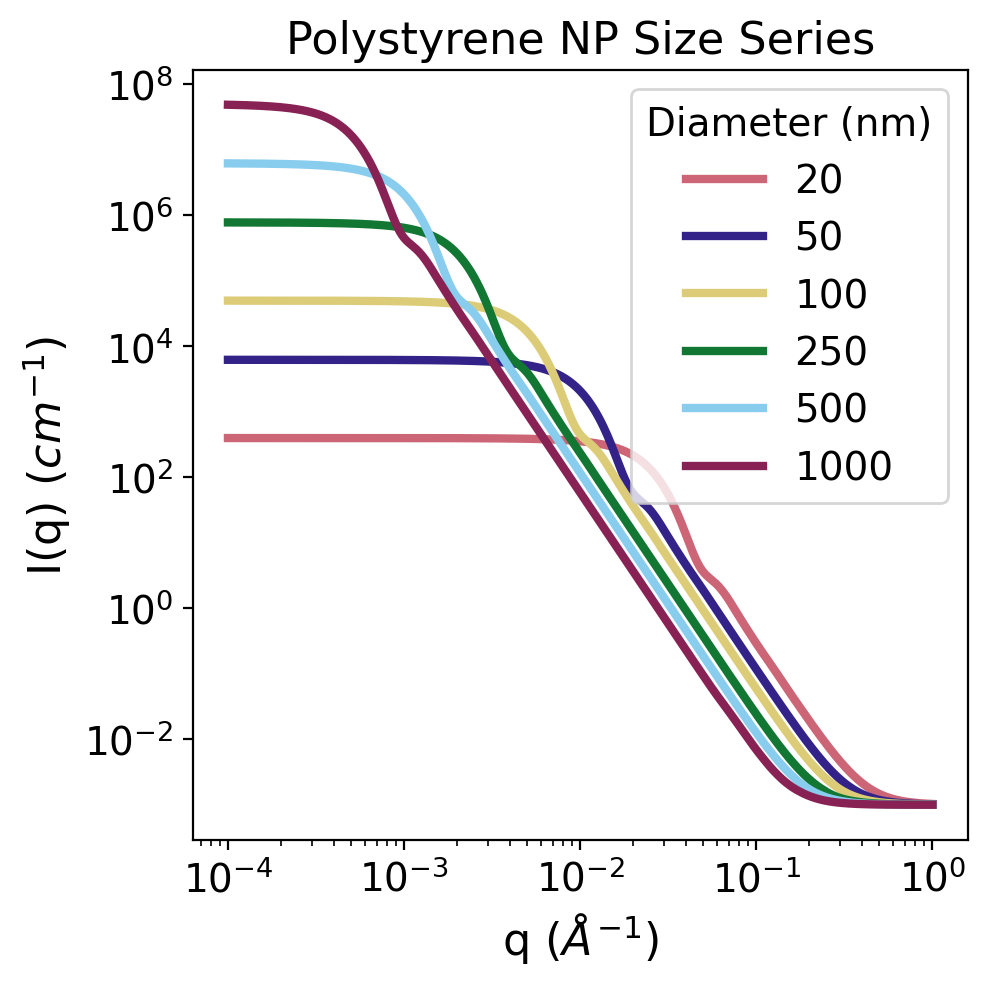

In [ ]:
for i, r in enumerate(radii):
    Iq = model(
        radius = r,
        radius_effective = r,
        radius_pd = 0.1,
        radius_pd_type = 'gaussian',
        radius_pd_nsigma = 3,
        radius_pd_n = 35,
        volfraction = 0.05,
        scale = 1
    )

    plt.loglog(data.x, Iq, label=f"{int(r*2/10)}", lw=3)

plt.legend(title="Diameter (nm)")
plt.xlabel("q ($\AA^{-1}$)")
plt.ylabel("I(q) ($cm^{-1}$)")
plt.title("Polystyrene NP Size Series")
plt.show()

Loop through the concentrations (for a single particle size) and create the concentration series plot:

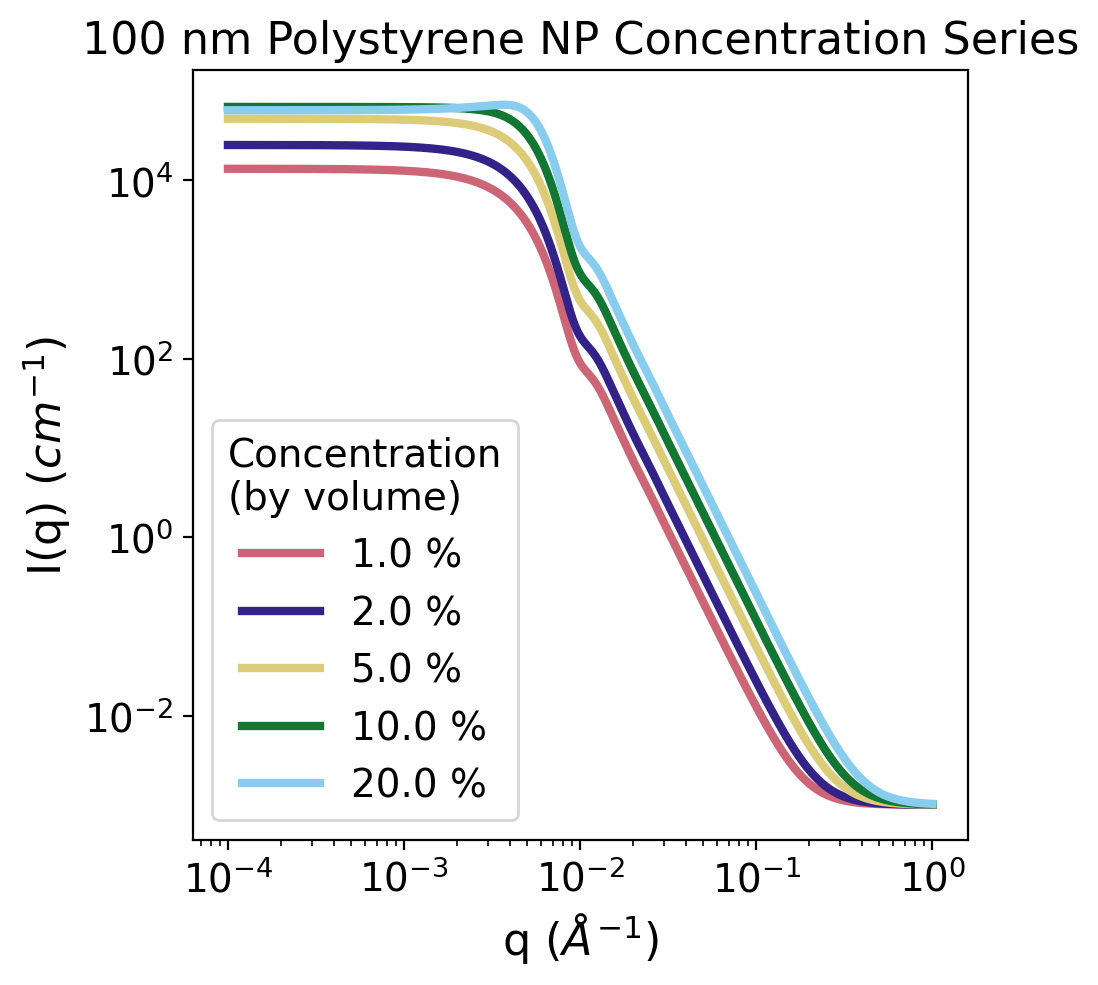

In [ ]:
for i, c in enumerate(concentrations):
    Iq = model(
        radius = 100*10/2,
        radius_effective = 100*10/2,
        radius_effective_mode = 0,
        radius_pd = 0.1,
        radius_pd_type = 'gaussian',
        radius_pd_nsigmas = 3,
        radius_pd_n = 35,
        volfraction = c,
        scale = 1
    )

    plt.loglog(data.x, Iq, label=f"{c*100} %", lw=3)

plt.legend(title="Concentration\n(by volume)")
plt.xlabel("q ($\AA^{-1}$)")
plt.ylabel("I(q) ($cm^{-1}$)")
plt.title("100 nm Polystyrene NP Concentration Series")
plt.show()

# 3.&nbsp;Fitting with the bumps package

The bumps fitting pacakge can be used to fit scattering data with the models we created in the previous section using sasmodels. In this section we will learn how to create the sasmodels `bumps_model.Model` and `bumps_model.Experiment` which interface with bumps, apply parameter constraints, and fit a single scattering curve. Finally, we will cover how to perform simulataneous fitting, which is helpful if you have two datasets, e.g. USANS and SANS, for the same sample and need to hold parameters (e.g. sphere radius) constant across the two datasets and their fits.

## 3.1 sasmodels `Model` and parameter constraints
We have learned how to generate a kernel using sasmodels, which calculated the theoretical scattering intensity as a function of the q-values and parameter values. In order to use our kernel for data fitting, we must create a model that interfaces with the bumps fitting library. This is done by creating a `Model` and `Experiment` from the sasmodels `bumps_model` module.

The `Model` is similar to a callable kernel or direct model we used before, however it will now explicitly list the polydispersity parameters and it creates a bumps `Parameter` object for each parameter of the model.

In [ ]:
kernel = sasmodels.core.load_model("sphere")
model = sasmodels.bumps_model.Model(model=kernel)
model.state()

{'scale': 1,
 'background': 0.001,
 'sld': 1,
 'sld_solvent': 6,
 'radius': 50,
 'radius_pd': 0.0,
 'radius_pd_n': 35.0,
 'radius_pd_nsigma': 3.0,
 'up_frac_i': 0.0,
 'up_frac_f': 0.0,
 'up_angle': 0.0,
 'up_phi': 0.0,
 'sld_M0': 0.0,
 'sld_mtheta': 0.0,
 'sld_mphi': 0.0,
 'sld_solvent_M0': 0.0,
 'sld_solvent_mtheta': 0.0,
 'sld_solvent_mphi': 0.0,
 'radius_pd_type': 'gaussian'}

Each of the parameters is an attribute of the `Model` and are also a bumps `Parameter` type.

In [ ]:
kernel = sasmodels.core.load_model("sphere")
model = sasmodels.bumps_model.Model(model=kernel)
type(model.radius)

bumps.parameter.Parameter

A parameter object has atributes including the limits, fitting range (when specified as a fittable parameter), the value and even bounds that can follow a distribution.

What are the `limits` of the sphere radius?

In [ ]:
model.radius.limits

(0.0, inf)

What about its value?

In [ ]:
model.radius.value

50

We can directly change this value of the parameter...

In [ ]:
model.radius.value = 100
model.radius.value

100

...or we can create a dictionary of parameters to pass to the `Model` function.

In [ ]:
params = {
    "radius" : 200
}

In [ ]:
kernel = sasmodels.core.load_model("sphere")
model = sasmodels.bumps_model.Model(kernel, **params)
model.radius.value

200

The parameter is assumed fixed unless we tell it otherwise, i.e., provide a fitting range or bounds.

In [ ]:
model.radius.fixed

True

Set a fitting range from 0 to 300 Angstroms for the radius:

In [ ]:
model.radius.range(0, 300) # if we call this method we can set a fitting range and so this parameter will vary within these bounds during a fit to data
model.radius.fixed

False

This information is now stored in the `bounds` of the parameter:

In [ ]:
model.radius.bounds.limits

(0, 300)

When using the range method, there is a uniform probability of seeing any value within the bounds specified. However, what if you had some confidence of your particle radius from another characterization method? You can use other distributions, such as a Normal distribution, to still allow the parameter to vary slightly but penalize values that stray too far from the set value.

Text(0.5, 0, 'Radius (Angstroms)')

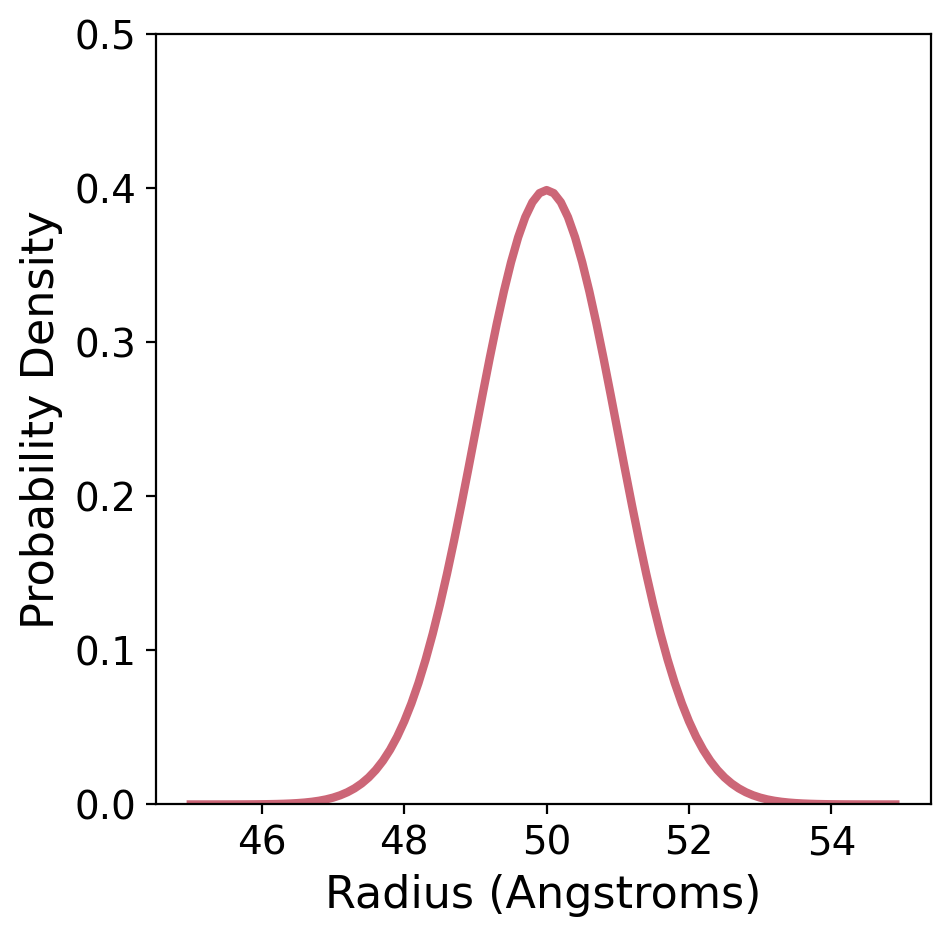

In [ ]:
model.radius.bounds = bumps.bounds.Normal(mean=50, std=1)
radius_values = np.arange(45, 55, 0.1)
pdf = model.radius.bounds.dist.pdf(radius_values)
plt.plot(radius_values, pdf)
plt.ylim(0, 0.5)
plt.ylabel("Probability Density")
plt.xlabel("Radius (Angstroms)")

The current value of all parameters can always be called using `model.state()`:

In [ ]:
model.state()

{'scale': 1,
 'background': 0.001,
 'sld': 1,
 'sld_solvent': 6,
 'radius': 200,
 'radius_pd': 0.0,
 'radius_pd_n': 35.0,
 'radius_pd_nsigma': 3.0,
 'up_frac_i': 0.0,
 'up_frac_f': 0.0,
 'up_angle': 0.0,
 'up_phi': 0.0,
 'sld_M0': 0.0,
 'sld_mtheta': 0.0,
 'sld_mphi': 0.0,
 'sld_solvent_M0': 0.0,
 'sld_solvent_mtheta': 0.0,
 'sld_solvent_mphi': 0.0,
 'radius_pd_type': 'gaussian'}

As mentioned before, we need not only a `bumps_model.Model` object but also a `bumps_model.Experiment` to interface with the bumps fitting module. Since the `Experiment` will combine the model information, including the kernel and parameter values, together with the scattering data, let's first look at how to import scattering data.

## 3.2 Importing scattering data

Data can be loaded using the SasView data methods which can read common data formats of 1D or 2D SANS data and 1D SESANS data from many facilities. These are described in the documentation [here](https://www.sasview.org/docs/user/qtgui/MainWindow/data_formats_help.html) in greater detail. Today we will work with .txt files that have three columns: q, I(q), dI(q).

In [ ]:
sasdata.__version__

'0.8.1'

In [ ]:
url = 'https://raw.githubusercontent.com/SasView/sasview/main/src/sas/example_data/1d_data/1umSlitSmearSphere.ABS'
!wget 'content/' {url}

# the Loader can load a single or multiple files, so it creates a list of the data objects
# we will just select the first object in the list and work with single files for now
loader = Loader()
loaded_data_list = loader.load('/content/1umSlitSmearSphere.ABS')
data = loaded_data_list[0]

--2024-01-20 03:47:07--  http://content/
Resolving content (content)... failed: Name or service not known.
wget: unable to resolve host address ‘content’
--2024-01-20 03:47:07--  https://raw.githubusercontent.com/SasView/sasview/main/src/sas/example_data/1d_data/1umSlitSmearSphere.ABS
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8506 (8.3K) [text/plain]
Saving to: ‘1umSlitSmearSphere.ABS’

1umSlitSmearSphere. 100%[===================>]   8.31K  --.-KB/s    in 0s      

2024-01-20 03:47:07 (61.4 MB/s) - ‘1umSlitSmearSphere.ABS’ saved [8506/8506]

FINISHED --2024-01-20 03:47:07--
Total wall clock time: 0.4s
Downloaded: 1 files, 8.3K in 0s (61.4 MB/s)


In [ ]:
type(data)

sasdata.dataloader.data_info.Data1D

In [ ]:
data.x

array([0.0001  , 0.000103, 0.000106, 0.00011 , 0.000113, 0.000117,
       0.00012 , 0.000124, 0.000128, 0.000132, 0.000136, 0.00014 ,
       0.000145, 0.000149, 0.000154, 0.000159, 0.000164, 0.000169,
       0.000174, 0.00018 , 0.000186, 0.000191, 0.000197, 0.000204,
       0.00021 , 0.000217, 0.000223, 0.00023 , 0.000238, 0.000245,
       0.000253, 0.000261, 0.000269, 0.000277, 0.000286, 0.000295,
       0.000304, 0.000314, 0.000324, 0.000334, 0.000344, 0.000355,
       0.000366, 0.000378, 0.00039 , 0.000402, 0.000414, 0.000427,
       0.000441, 0.000455, 0.000469, 0.000484, 0.000499, 0.000515,
       0.000531, 0.000547, 0.000565, 0.000582, 0.000601, 0.000619,
       0.000639, 0.000659, 0.00068 , 0.000701, 0.000723, 0.000746,
       0.000769, 0.000793, 0.000818, 0.000844, 0.00087 , 0.000897,
       0.000926, 0.000955, 0.000985, 0.00102 , 0.00105 , 0.00108 ,
       0.00111 , 0.00115 , 0.00119 , 0.00122 , 0.00126 , 0.0013  ,
       0.00134 , 0.00138 , 0.00143 , 0.00147 , 0.00152 , 0.001

In [ ]:
data.y

array([7.74e+03, 7.71e+03, 7.68e+03, 7.65e+03, 7.62e+03, 7.59e+03,
       7.55e+03, 7.52e+03, 7.48e+03, 7.43e+03, 7.39e+03, 7.34e+03,
       7.29e+03, 7.24e+03, 7.18e+03, 7.12e+03, 7.06e+03, 7.00e+03,
       6.93e+03, 6.85e+03, 6.78e+03, 6.70e+03, 6.61e+03, 6.52e+03,
       6.43e+03, 6.33e+03, 6.22e+03, 6.11e+03, 6.00e+03, 5.88e+03,
       5.75e+03, 5.62e+03, 5.49e+03, 5.35e+03, 5.20e+03, 5.05e+03,
       4.89e+03, 4.73e+03, 4.56e+03, 4.38e+03, 4.21e+03, 4.02e+03,
       3.84e+03, 3.64e+03, 3.45e+03, 3.25e+03, 3.06e+03, 2.86e+03,
       2.66e+03, 2.46e+03, 2.26e+03, 2.06e+03, 1.87e+03, 1.68e+03,
       1.50e+03, 1.33e+03, 1.16e+03, 1.01e+03, 8.63e+02, 7.29e+02,
       6.07e+02, 4.98e+02, 4.03e+02, 3.21e+02, 2.54e+02, 1.99e+02,
       1.57e+02, 1.27e+02, 1.08e+02, 9.83e+01, 9.59e+01, 9.91e+01,
       1.06e+02, 1.15e+02, 1.23e+02, 1.30e+02, 1.34e+02, 1.34e+02,
       1.30e+02, 1.21e+02, 1.09e+02, 9.38e+01, 7.76e+01, 6.15e+01,
       4.71e+01, 3.55e+01, 2.74e+01, 2.32e+01, 2.24e+01, 2.40e

In [ ]:
data.dy

array([7.74e+01, 7.71e+01, 7.68e+01, 7.65e+01, 7.62e+01, 7.59e+01,
       7.55e+01, 7.52e+01, 7.48e+01, 7.43e+01, 7.39e+01, 7.34e+01,
       7.29e+01, 7.24e+01, 7.18e+01, 7.12e+01, 7.06e+01, 7.00e+01,
       6.93e+01, 6.85e+01, 6.78e+01, 6.70e+01, 6.61e+01, 6.52e+01,
       6.43e+01, 6.33e+01, 6.22e+01, 6.11e+01, 6.00e+01, 5.88e+01,
       5.75e+01, 5.62e+01, 5.49e+01, 5.35e+01, 5.20e+01, 5.05e+01,
       4.89e+01, 4.73e+01, 4.56e+01, 4.38e+01, 4.21e+01, 4.02e+01,
       3.84e+01, 3.64e+01, 3.45e+01, 3.25e+01, 3.06e+01, 2.86e+01,
       2.66e+01, 2.46e+01, 2.26e+01, 2.06e+01, 1.87e+01, 1.68e+01,
       1.50e+01, 1.33e+01, 1.16e+01, 1.01e+01, 8.63e+00, 7.29e+00,
       6.07e+00, 4.98e+00, 4.03e+00, 3.21e+00, 2.54e+00, 1.99e+00,
       1.57e+00, 1.27e+00, 1.08e+00, 9.83e-01, 9.59e-01, 9.91e-01,
       1.06e+00, 1.15e+00, 1.23e+00, 1.30e+00, 1.34e+00, 1.34e+00,
       1.30e+00, 1.21e+00, 1.09e+00, 9.38e-01, 7.76e-01, 6.15e-01,
       4.71e-01, 3.55e-01, 2.74e-01, 2.32e-01, 2.24e-01, 2.40e

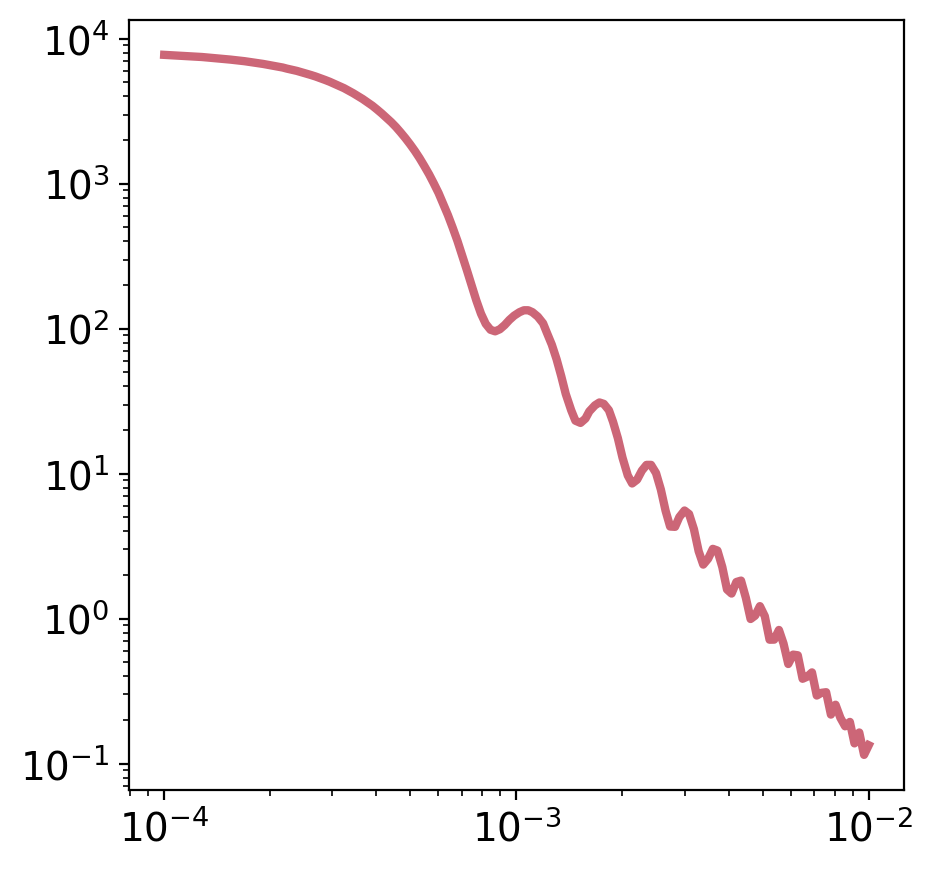

In [ ]:
plt.loglog(data.x, data.y)

The units are assumed to be $Å^{-1}$ for q and $cm^{-1}$ for I(q), and are noted in sasmodels `Data1D` object attributes:

In [ ]:
data.x_unit, data.y_unit

('A^{-1}', 'cm^{-1}')

You can also directly create a `sasmodels.data.Data1D` instance if your data is stored in another format, such as a numpy array.

In [ ]:
url = 'https://raw.githubusercontent.com/SasView/sasview/main/src/sas/example_data/1d_data/100nmPinholeSphere.txt'
!wget 'content/' {url}
data_np = np.loadtxt("100nmPinholeSphere.txt", skiprows=12)
data_np

--2024-01-20 03:47:40--  http://content/
Resolving content (content)... failed: Name or service not known.
wget: unable to resolve host address ‘content’
--2024-01-20 03:47:40--  https://raw.githubusercontent.com/SasView/sasview/main/src/sas/example_data/1d_data/100nmPinholeSphere.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5977 (5.8K) [text/plain]
Saving to: ‘100nmPinholeSphere.txt.1’

100nmPinholeSphere. 100%[===================>]   5.84K  --.-KB/s    in 0s      

2024-01-20 03:47:40 (72.5 MB/s) - ‘100nmPinholeSphere.txt.1’ saved [5977/5977]

FINISHED --2024-01-20 03:47:40--
Total wall clock time: 0.2s
Downloaded: 1 files, 5.8K in 0s (72.5 MB/s)


array([[1.00e-03, 2.41e+03, 2.41e+01, 1.50e-04],
       [1.04e-03, 2.40e+03, 2.40e+01, 1.56e-04],
       [1.09e-03, 2.39e+03, 2.39e+01, 1.63e-04],
       [1.13e-03, 2.37e+03, 2.37e+01, 1.70e-04],
       [1.18e-03, 2.36e+03, 2.36e+01, 1.77e-04],
       [1.23e-03, 2.34e+03, 2.34e+01, 1.85e-04],
       [1.28e-03, 2.33e+03, 2.33e+01, 1.93e-04],
       [1.34e-03, 2.31e+03, 2.31e+01, 2.01e-04],
       [1.40e-03, 2.29e+03, 2.29e+01, 2.09e-04],
       [1.46e-03, 2.27e+03, 2.27e+01, 2.18e-04],
       [1.52e-03, 2.25e+03, 2.25e+01, 2.28e-04],
       [1.58e-03, 2.23e+03, 2.23e+01, 2.37e-04],
       [1.65e-03, 2.20e+03, 2.20e+01, 2.47e-04],
       [1.72e-03, 2.18e+03, 2.18e+01, 2.58e-04],
       [1.79e-03, 2.15e+03, 2.15e+01, 2.69e-04],
       [1.87e-03, 2.12e+03, 2.12e+01, 2.80e-04],
       [1.95e-03, 2.08e+03, 2.08e+01, 2.92e-04],
       [2.03e-03, 2.05e+03, 2.05e+01, 3.05e-04],
       [2.12e-03, 2.01e+03, 2.01e+01, 3.18e-04],
       [2.21e-03, 1.97e+03, 1.97e+01, 3.31e-04],
       [2.30e-03, 1.

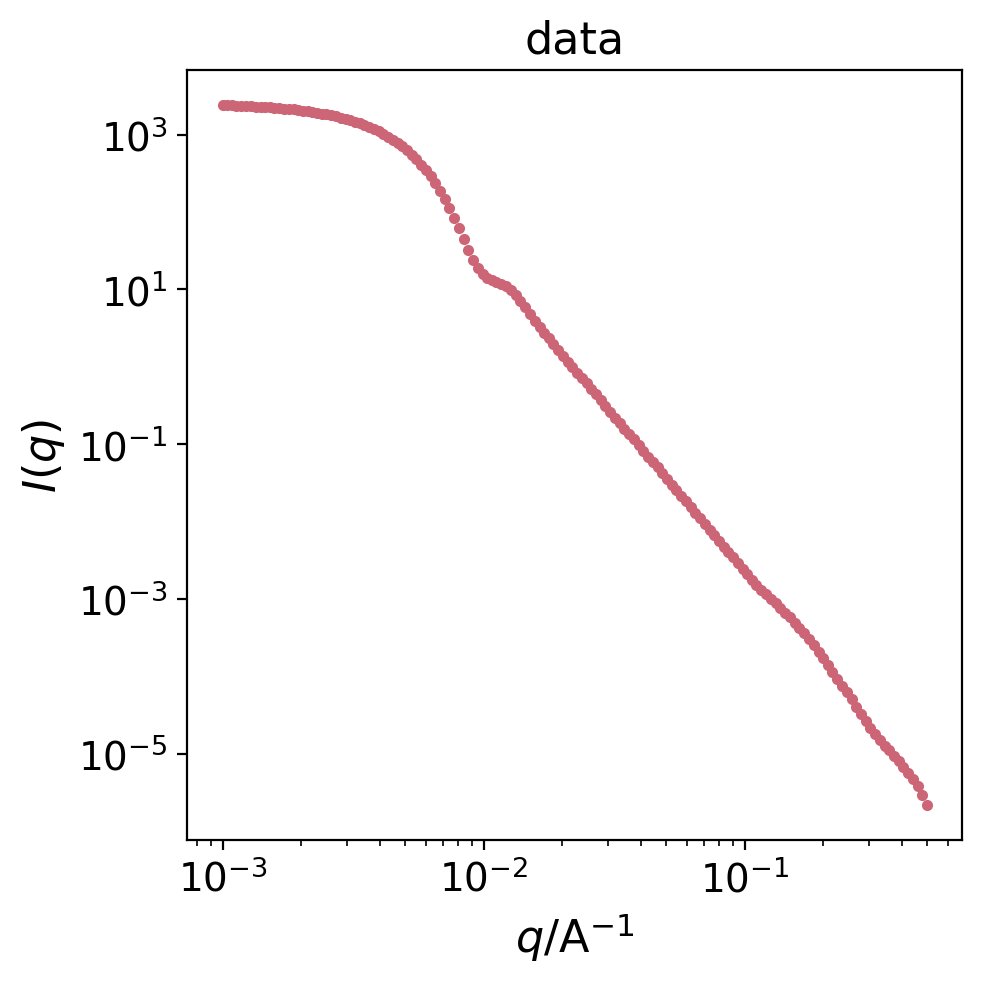

In [ ]:
data = sasmodels.data.Data1D(x=data_np[:,0], y=data_np[:,1], dy=data_np[:,2], dx=data_np[:,3])
sasmodels.data.plot_data(data)

SasView also supports other types of data, such as SESANS:

In [ ]:
url = 'https://raw.githubusercontent.com/SasView/sasview/main/src/sas/example_data/sesans_data/sphere2micron.ses'
!wget 'content/' {url}

# the Loader can load a single or multiple files, so it creates a list of the data objects
# we will just select the first object in the list and work with single files for now
loaded_data_list = Loader().load(url.split('/')[-1])
data = loaded_data_list[0]

--2024-01-20 03:47:51--  http://content/
Resolving content (content)... failed: Name or service not known.
wget: unable to resolve host address ‘content’
--2024-01-20 03:47:51--  https://raw.githubusercontent.com/SasView/sasview/main/src/sas/example_data/sesans_data/sphere2micron.ses
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3319 (3.2K) [text/plain]
Saving to: ‘sphere2micron.ses’

sphere2micron.ses   100%[===================>]   3.24K  --.-KB/s    in 0s      

2024-01-20 03:47:51 (35.4 MB/s) - ‘sphere2micron.ses’ saved [3319/3319]

FINISHED --2024-01-20 03:47:51--
Total wall clock time: 0.2s
Downloaded: 1 files, 3.2K in 0s (35.4 MB/s)


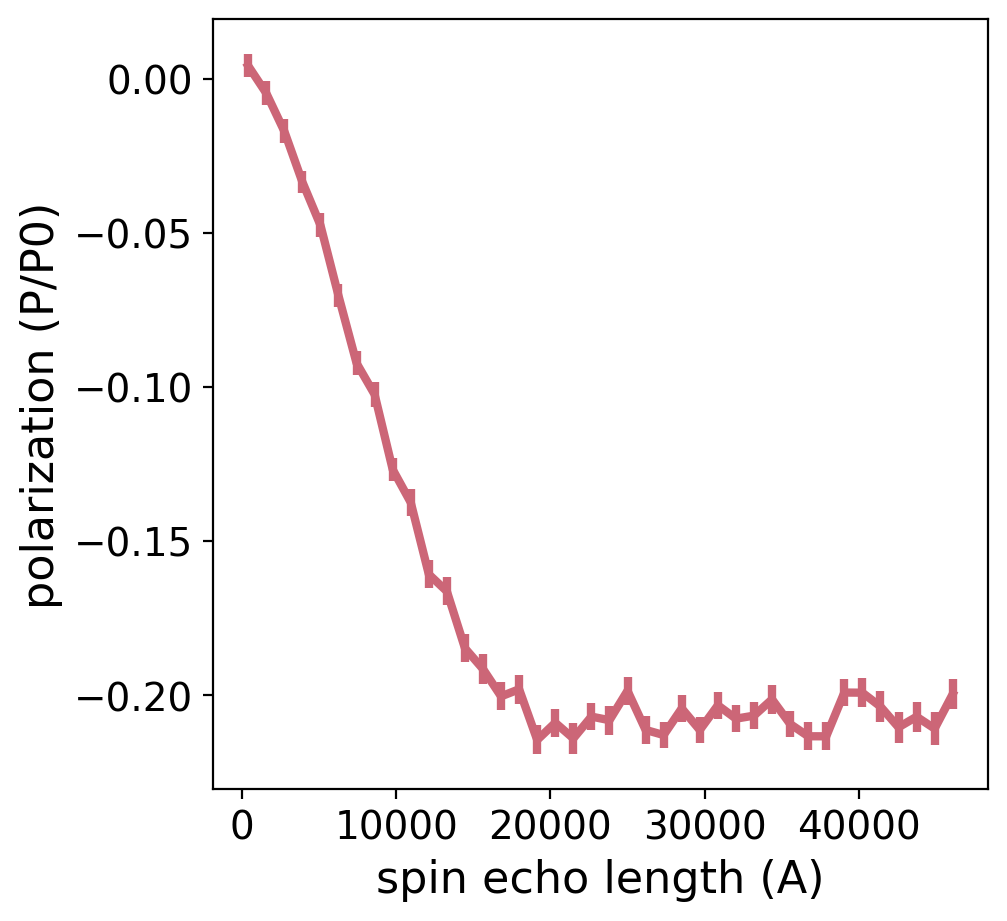

In [ ]:
sasmodels.data.plot_data(data)

In [ ]:
data.isSesans, type(data)

(True, sasdata.dataloader.data_info.Data1D)

## 3.3 sasmodels `Experiment`

As previously mentioned, the `Experiment` will combine the model information, including the kernel and parameter values, together with the scattering data. It is similar to a callable verison of the kernel, but will interface with the bumps fitting pacakge to enable fitting of the scattering data using the kernel and parameter information.

Let's load the '100nmPinoholeSphere.txt` dataset again. If you are using a numpy area, remember to create the sasmodels.data.Data1D object!

In [ ]:
data = np.loadtxt("/content/100nmPinholeSphere.txt", skiprows=12)
data = sasmodels.data.Data1D(x=data[:,0], y=data[:,1], dy=data[:,2], dx=data[:,3])

Create the `kernel`, `Model`, and then the `Experiment`:

In [ ]:
kernel = sasmodels.core.load_model("sphere")
params = {} # default parameters for now
model = sasmodels.bumps_model.Model(kernel, **params)
experiment = sasmodels.bumps_model.Experiment(data=data, model=model)

The experiment allows us to access the typical plots we see in SasView, including the model data plotted against the theoretical data and the residuals. We can see right away that the default parameters are far from the system captured in the experimental data.

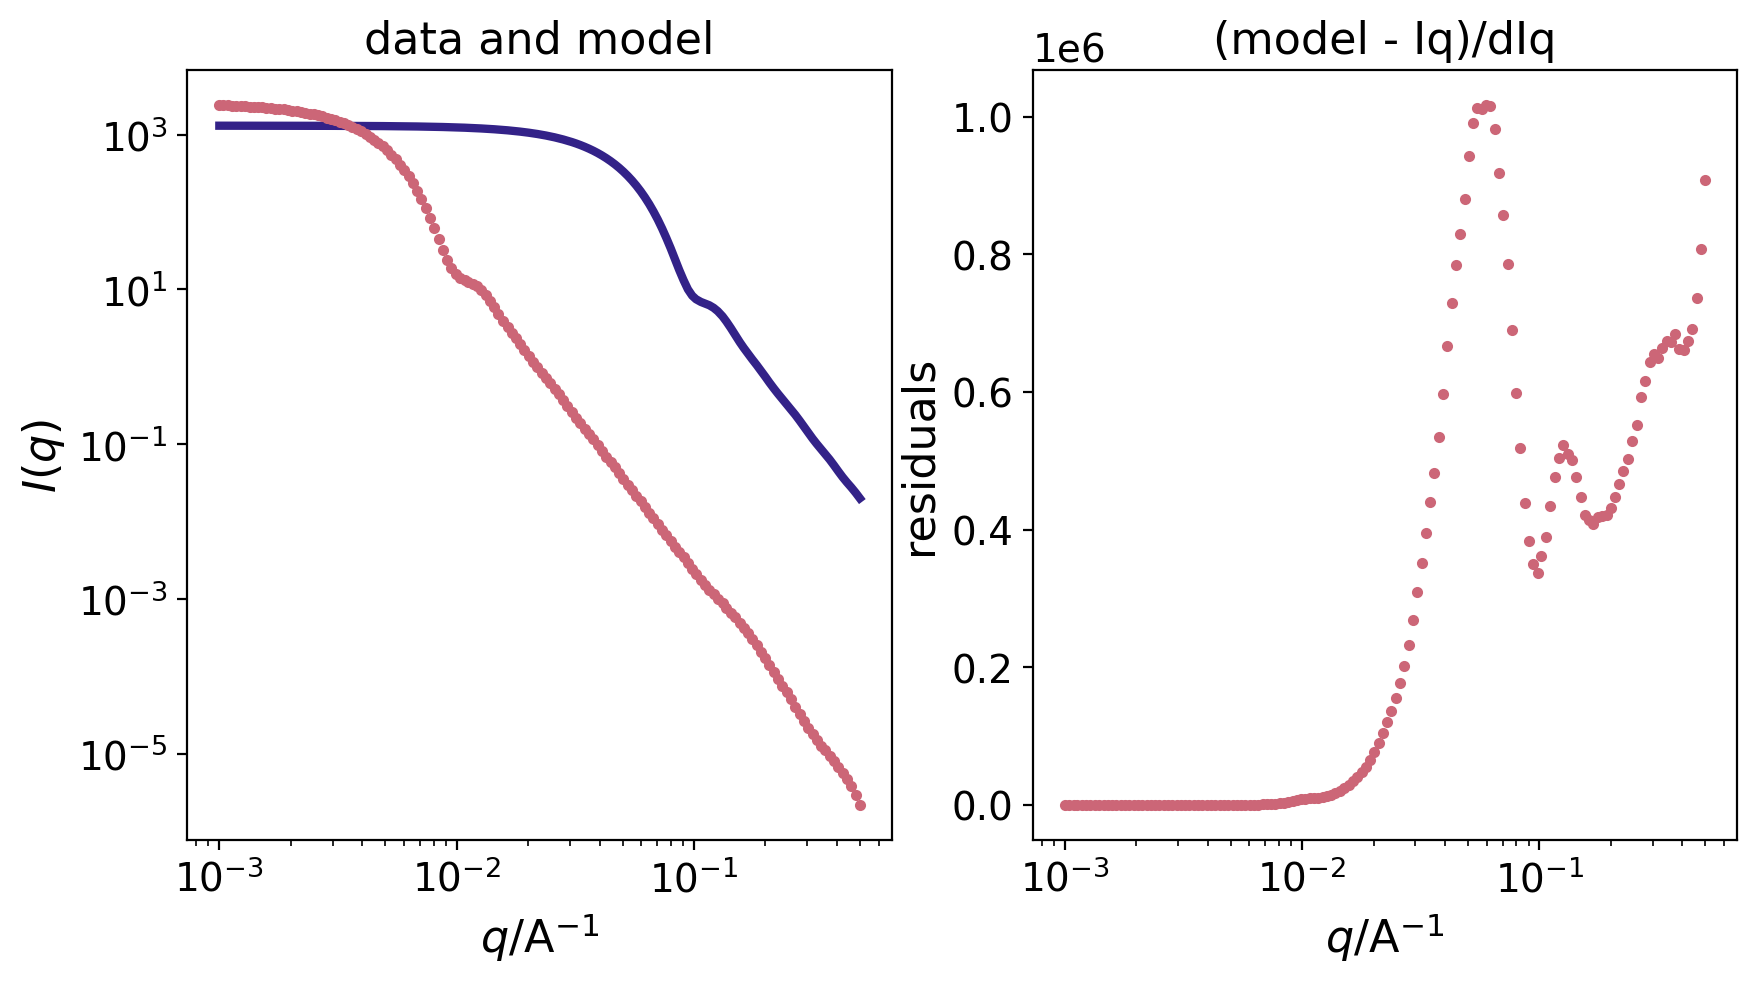

In [ ]:
plt.figure(figsize=(10,5))
experiment.plot()


## 3.4 EXERCISE: Finding good starting parameters for a fit.

Before we begin fitting, try to find better starting parameters in the model, similar to what we would do in SasView before we start the fit.

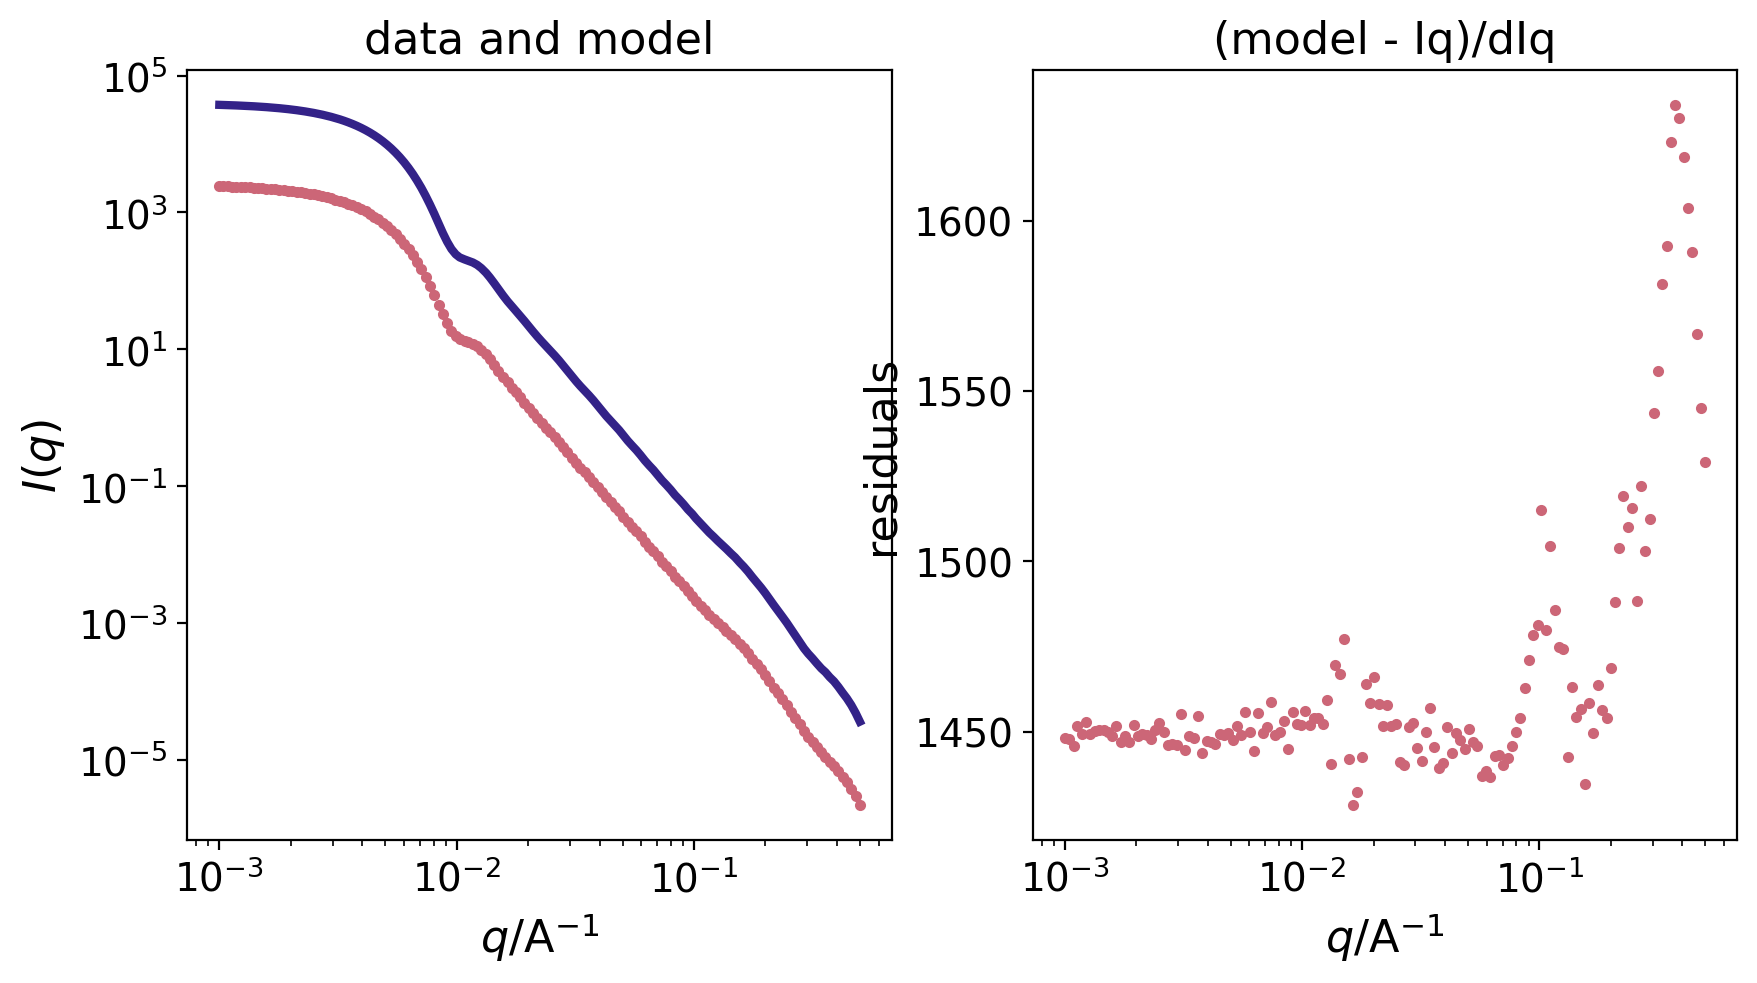

In [ ]:
params = {
    "radius": 500,
    "background": 0,
    "scale": 0.03
}
model = sasmodels.bumps_model.Model(model=kernel, **params)
experiment = sasmodels.bumps_model.Experiment(data=data, model=model)

plt.figure(figsize=(10,5))
experiment.plot()

## 3.5 Single Curve Fitting

Now that we have found a good starting place for the fit, create parameter constraints and set which parameters will be allowed to vary during the fit by setting a range.

In [ ]:
params = {
    "radius": 500,
    "background": 0,
    "scale": 0.03
}
model = sasmodels.bumps_model.Model(model=kernel, **params)

model.scale.range(0, 1)
# model.radius.range(0, 1000)

experiment = sasmodels.bumps_model.Experiment(data=data, model=model)

To start the fit, we need to create a bumps `FitProblem` which translates our sasmodels information in `Experiment` into bumps where we can access different optimizers and view our fitting results.

In [ ]:
problem = bumps.fitproblem.FitProblem(experiment)

To run the fit, we call `bumps.fitters.fit`:

step 1 cost 2169258.6621(67)
                                   scale |.........       0.03 in (0,1)
final chisq 7.0854(67)
=== Uncertainty from curvature:     name   value(unc.) ===
                                   scale   0.0019127(16)  


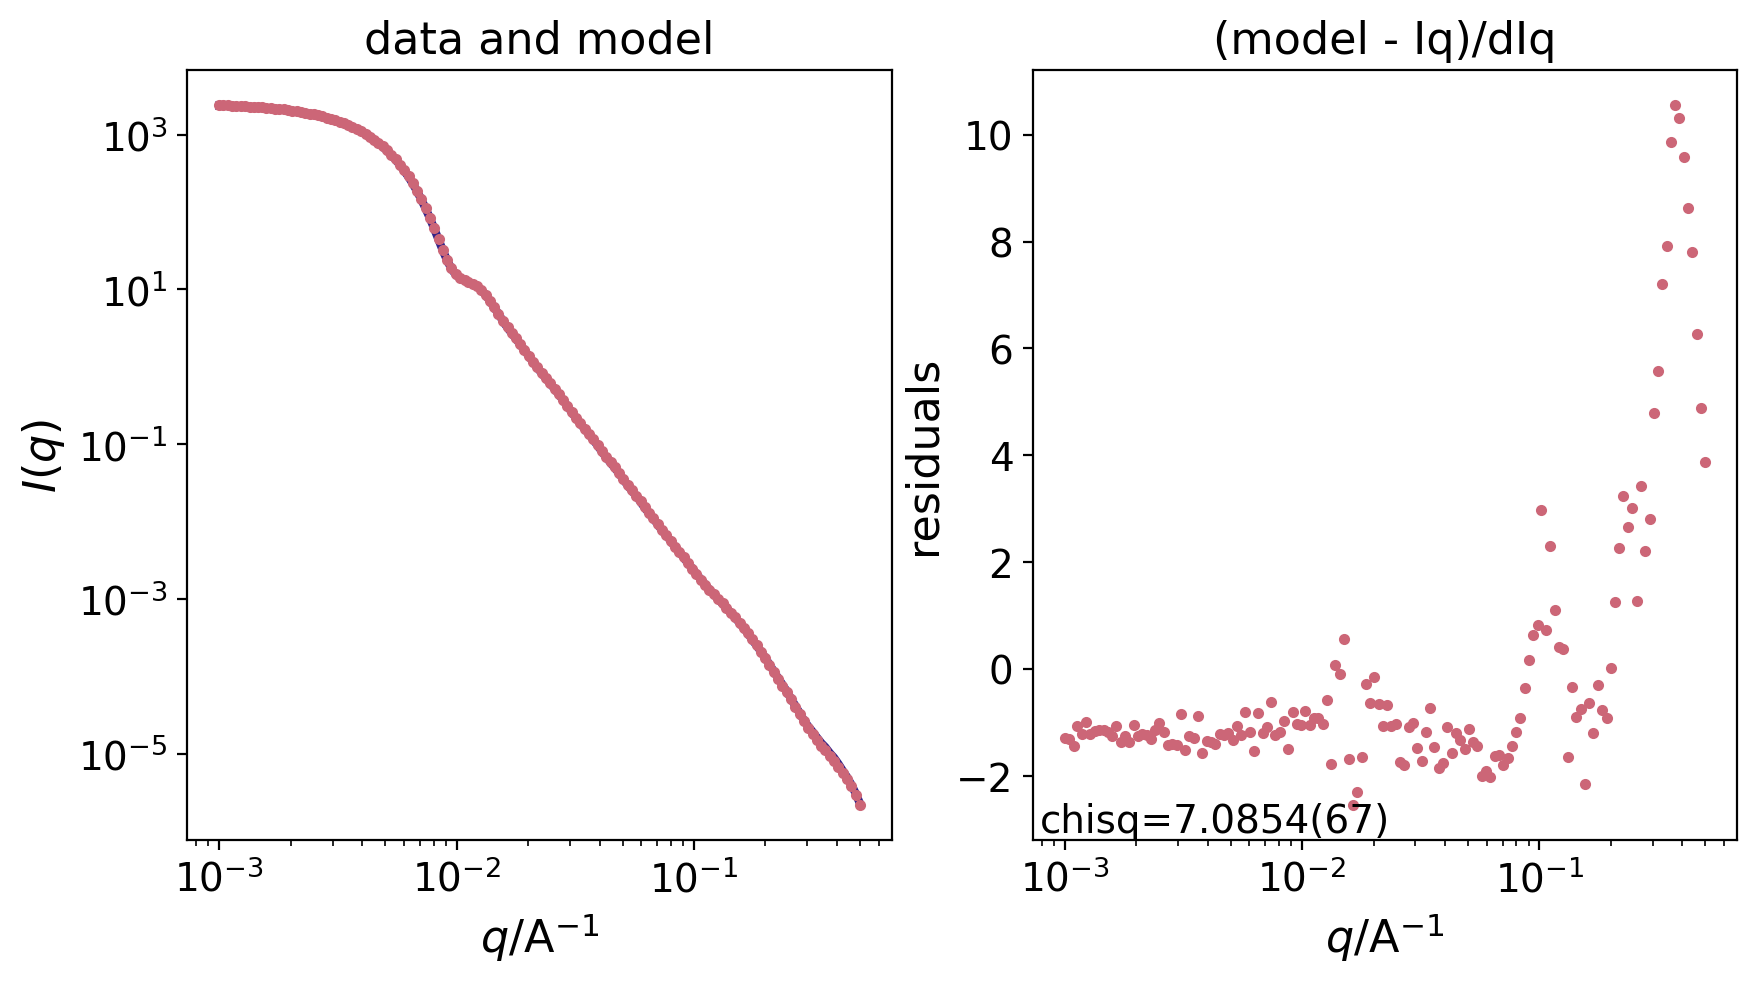

In [ ]:
results = bumps.fitters.fit(problem, verbose=True)
plt.figure(figsize=(10, 5))
problem.plot()

We can see the summary of the results and current state or value of all the parameters in the `FitProblem`:

In [ ]:
print(problem.summarize())

                                   scale |......... 0.00191273 in (0,1)


In [ ]:
problem.fitness.model.state()

{'scale': 0.001912731975316996,
 'background': 0,
 'sld': 1,
 'sld_solvent': 6,
 'radius': 500,
 'radius_pd': 0.0,
 'radius_pd_n': 35.0,
 'radius_pd_nsigma': 3.0,
 'up_frac_i': 0.0,
 'up_frac_f': 0.0,
 'up_angle': 0.0,
 'up_phi': 0.0,
 'sld_M0': 0.0,
 'sld_mtheta': 0.0,
 'sld_mphi': 0.0,
 'sld_solvent_M0': 0.0,
 'sld_solvent_mtheta': 0.0,
 'sld_solvent_mphi': 0.0,
 'radius_pd_type': 'gaussian'}

In [ ]:
problem.fitness.theory()

array([2.37868561e+03, 2.36862395e+03, 2.35572128e+03, 2.34475571e+03,
       2.33120516e+03, 2.31672550e+03, 2.30169091e+03, 2.28320716e+03,
       2.26402741e+03, 2.24408565e+03, 2.22338760e+03, 2.20209258e+03,
       2.17663670e+03, 2.15019005e+03, 2.12292076e+03, 2.09109885e+03,
       2.05819521e+03, 2.02432172e+03, 1.98549027e+03, 1.94554480e+03,
       1.90461422e+03, 1.85851147e+03, 1.81145166e+03, 1.75891429e+03,
       1.70543670e+03, 1.64665674e+03, 1.58715210e+03, 1.52712517e+03,
       1.45752210e+03, 1.39240222e+03, 1.32271918e+03, 1.24892099e+03,
       1.17135456e+03, 1.09503010e+03, 1.01593447e+03, 9.34753100e+02,
       8.56406598e+02, 7.77355586e+02, 6.98522989e+02, 6.20674084e+02,
       5.48124832e+02, 4.75088003e+02, 4.08660668e+02, 3.43886772e+02,
       2.84540721e+02, 2.33086586e+02, 1.85760762e+02, 1.45416538e+02,
       1.11300376e+02, 8.28676967e+01, 6.07791110e+01, 4.40633987e+01,
       3.17193658e+01, 2.37098585e+01, 1.85089192e+01, 1.55349499e+01,
      

We can also see the final fit values and uncertainties in `results`:

In [ ]:
results.x

array([0.00191273])

In [ ]:
results.dx

array([1.5622891e-06])

In [ ]:
problem.labels()

['scale']

We also see that these values are updated in the original model:

In [ ]:
model.radius.value

500

And the information is carried through the experiment:

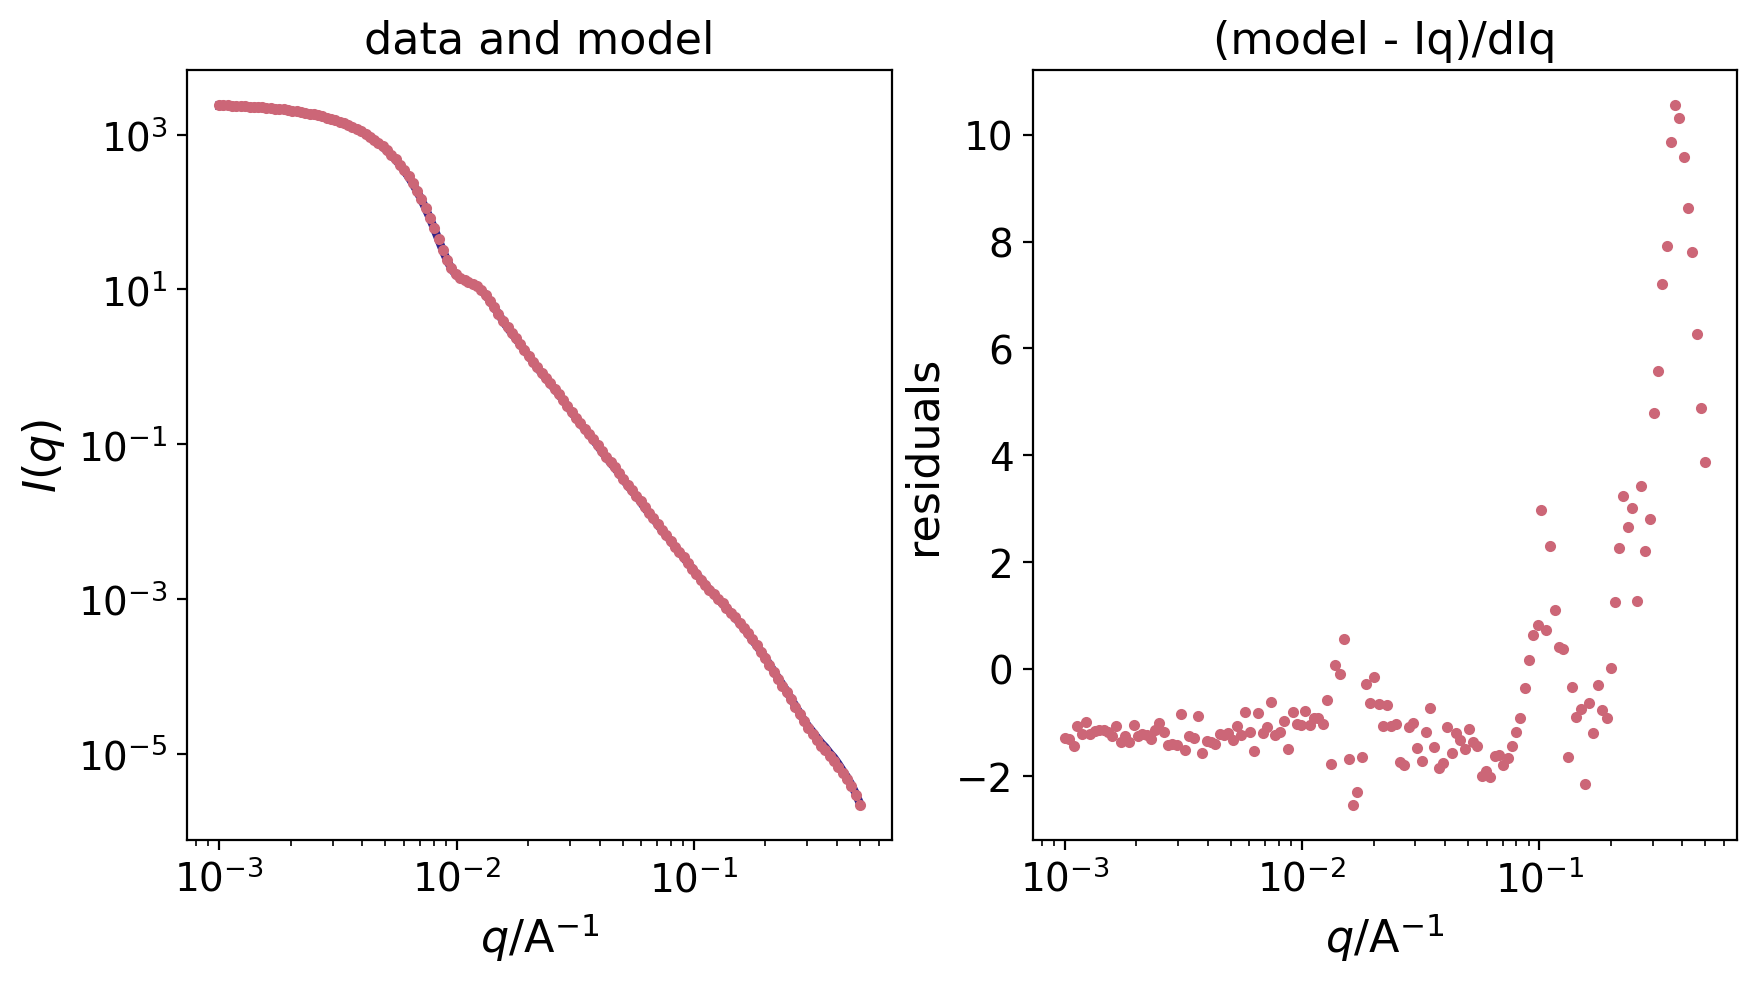

In [ ]:
plt.figure(figsize=(10,5))
experiment.plot()

The default optimizer for the bumps fit is the Levenberg-Marquardt method, but there are many available as described in greater detail in the Bumps [documentation](https://bumps.readthedocs.io/en/latest/guide/optimizer.html) with additional fitting options.

For Levenberg-Marquardt, the steps, f(x) tolerance and x tolerance from the GUI options can be set with the `steps`, `ftol` and `xtol` arguments in the `fit` method.

<img src="https://bumps.readthedocs.io/en/latest/_images/fit-lm.png">

*Image source: https://bumps.readthedocs.io/en/latest/guide/optimizer.html*

step 1 cost 14.1709(67)
                                   scale |......... 0.00191273 in (0,1)
final chisq 7.0854(67)
=== Uncertainty from curvature:     name   value(unc.) ===
                                   scale   0.0019127(16)  


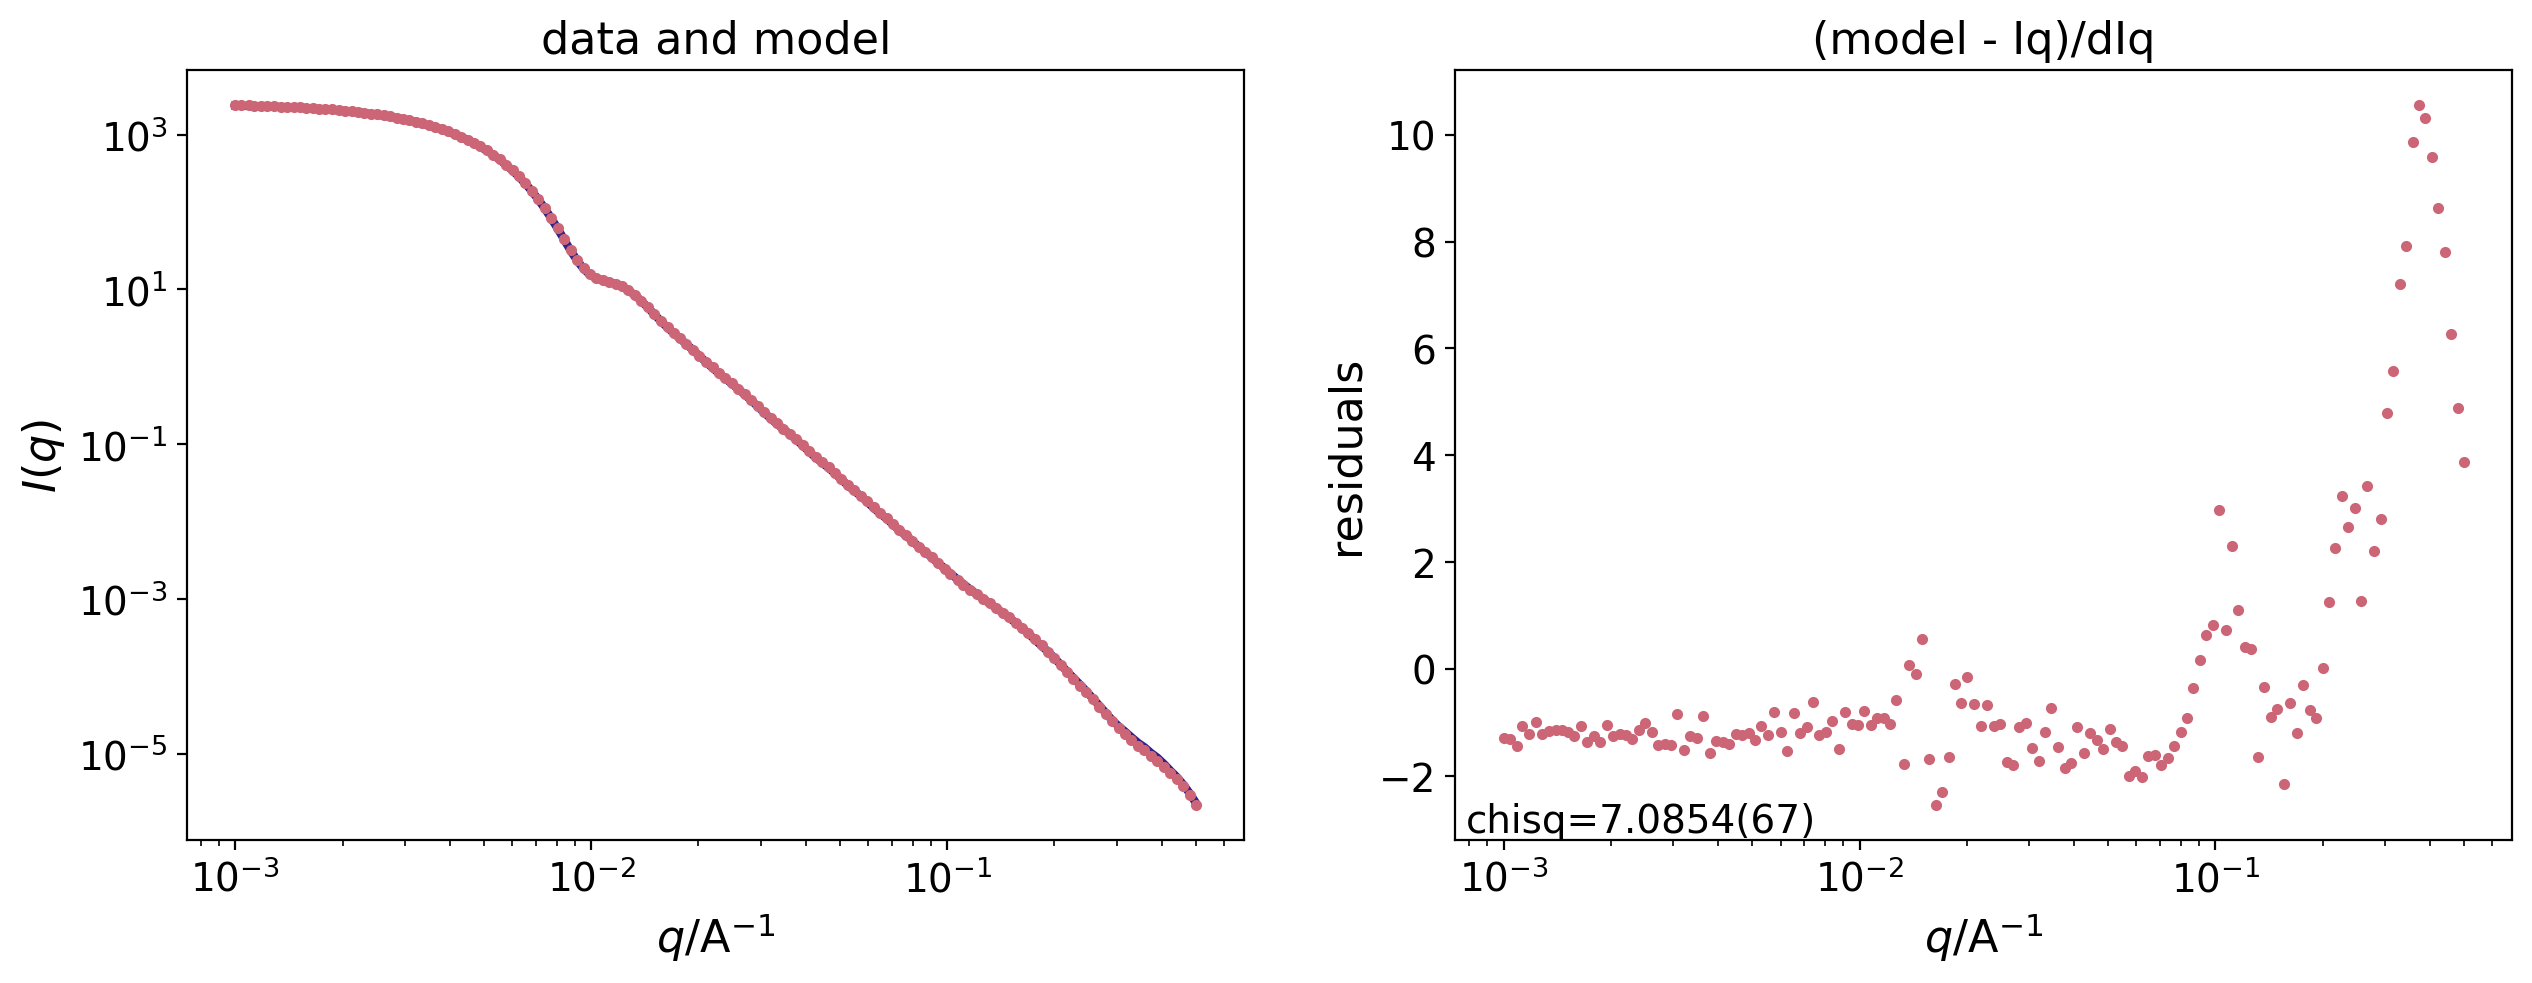

In [ ]:
results = bumps.fitters.fit(problem, method='lm', steps=1000, ftol=1.5e-08, xtol=1.5e-08, verbose=True)

plt.figure(figsize=(15,5))
problem.plot()

The DREAM is a Markov chain monte carlo fitting algorithm that is less likely to get trapped in local minima as LM occasionally does, but it is more computationally expensive than LM.

The samples, burn-in steps, population, initializer, thinning, and steps can be set with `burn`, `pop`, `init`, `thin` and `steps` arguments.

<img src="https://bumps.readthedocs.io/en/latest/_images/fit-dream.png">

*Image source: https://bumps.readthedocs.io/en/latest/guide/optimizer.html*

# steps: 1000, # draws: 10000
step 1 cost 7.0854(67)
                                   scale |......... 0.00191273 in (0,1)
step 140 cost 7.0854(67)
step 293 cost 7.0854(67)
step 446 cost 7.0854(67)
step 602 cost 7.0854(67)
step 717 cost 7.0854(67)
step 774 cost 7.0854(67)
step 832 cost 7.0854(67)
step 891 cost 7.0854(67)
step 951 cost 7.0854(67)
step 1009 cost 7.0854(67)
final chisq 7.0854(67)
=== Uncertainty from curvature:     name   value(unc.) ===
                                   scale   0.0019127(16)  


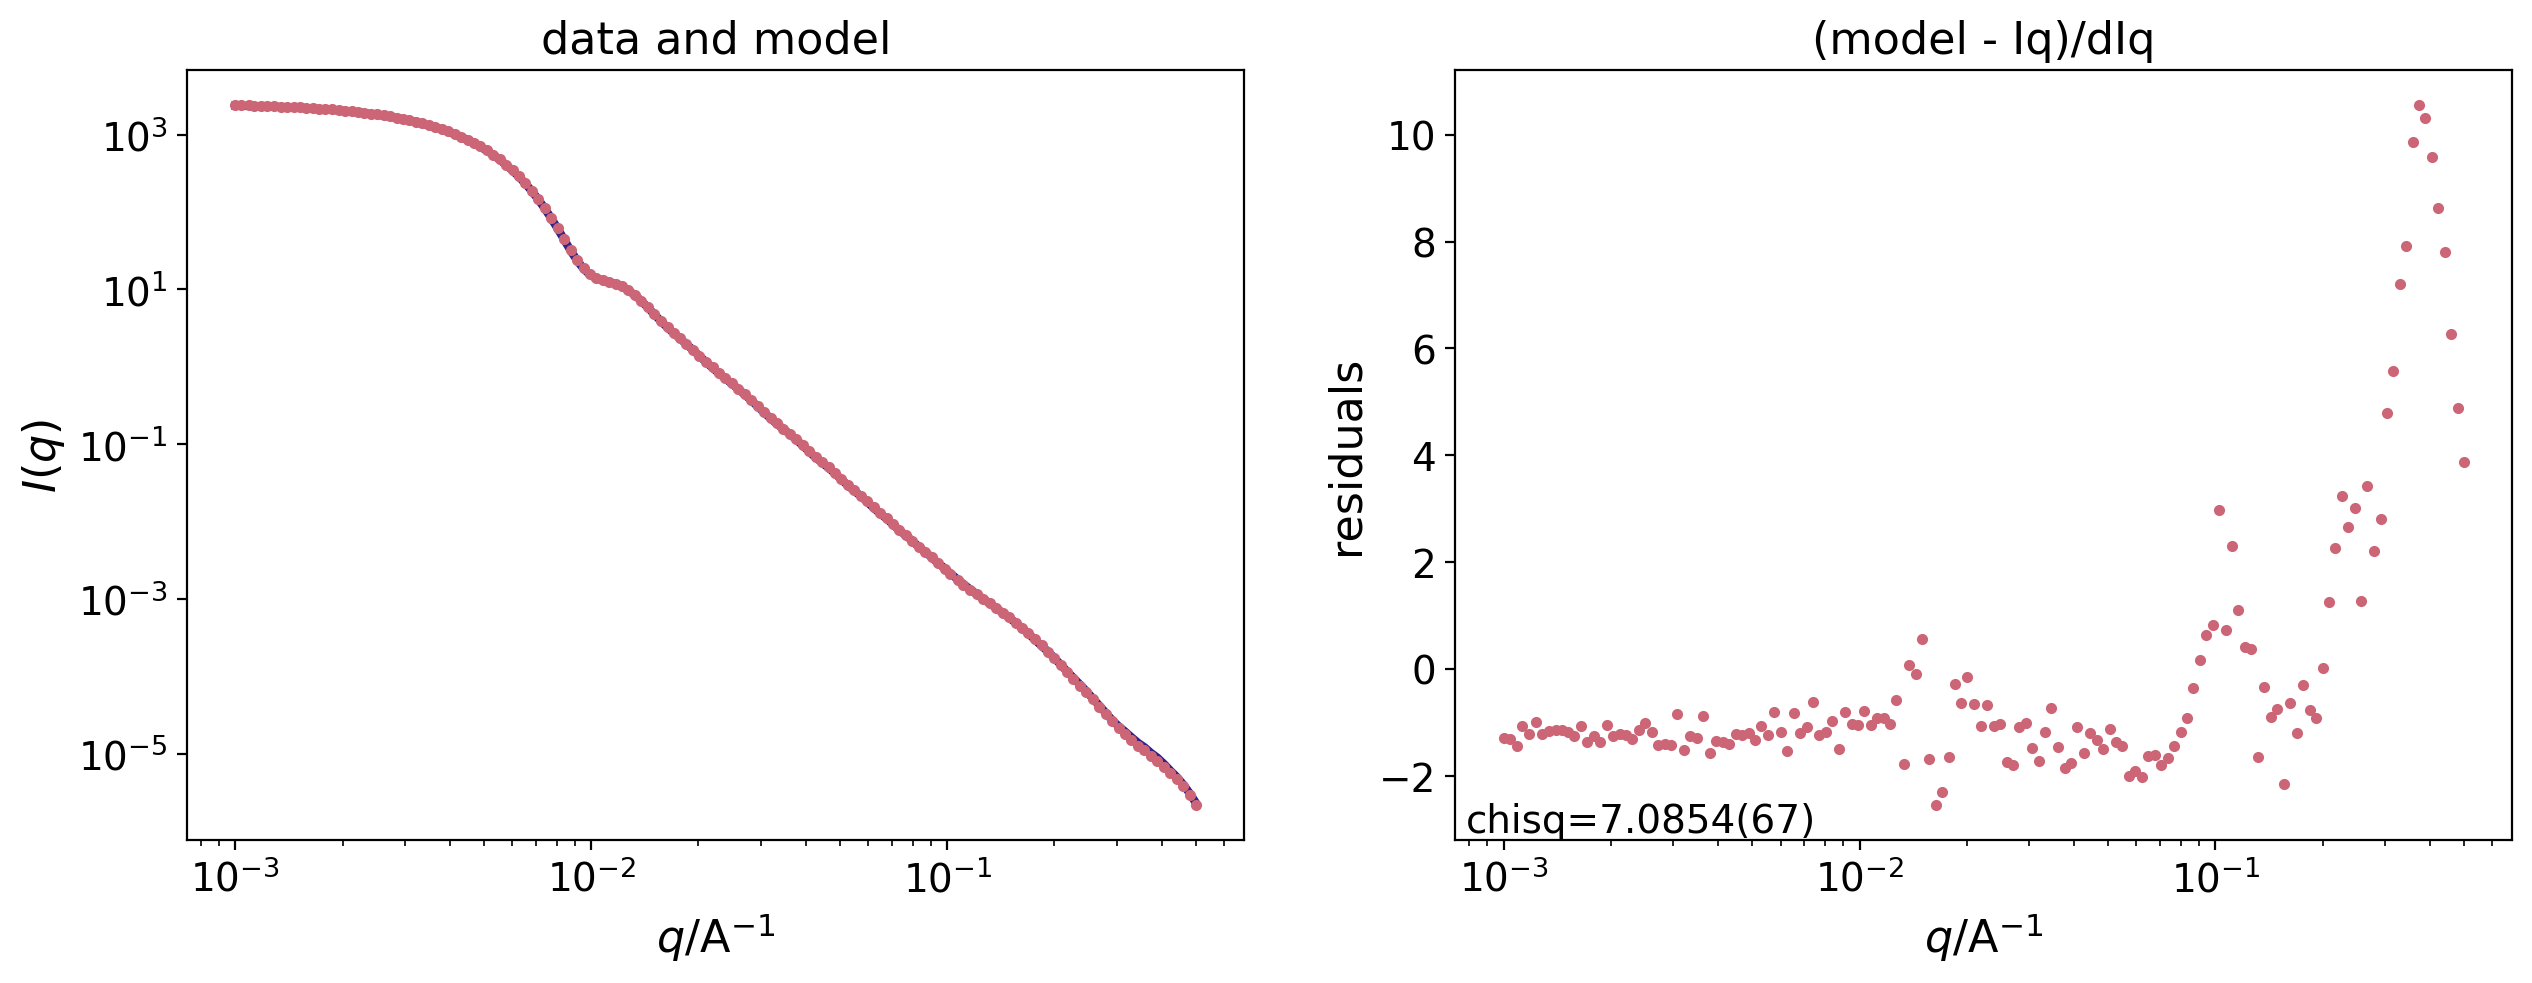

In [ ]:
results = bumps.fitters.fit(problem, method='dream', steps=1000, verbose=True)

plt.figure(figsize=(15,5))
problem.plot()

DREAM also provides additional uncertainty analysis:

              Parameter       mean  median    best [   68% interval] [   95% interval]
 1                scale 0.0019127(16) 0.00191273 0.00191273 [0.0019112 0.0019143] [0.0019096 0.0019158]

Statistics and plots based on 10110 samples (100.0% of total samples drawn)


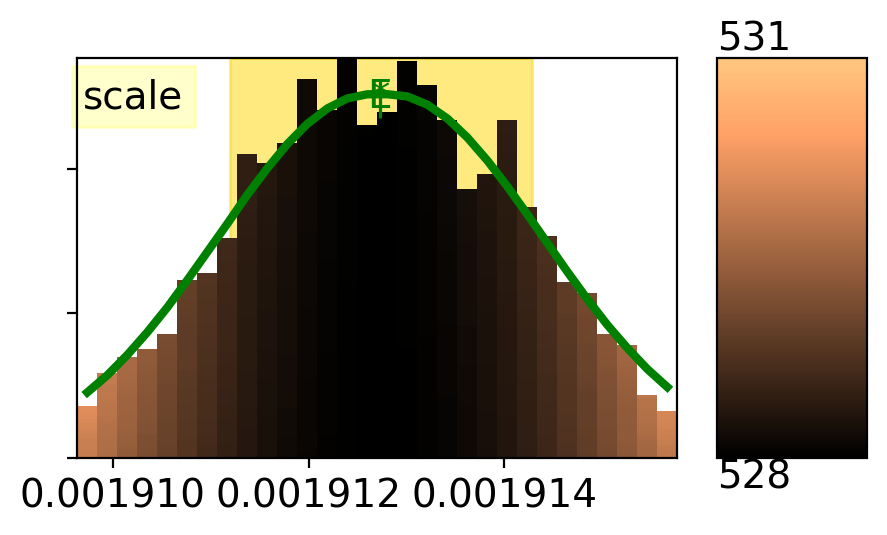

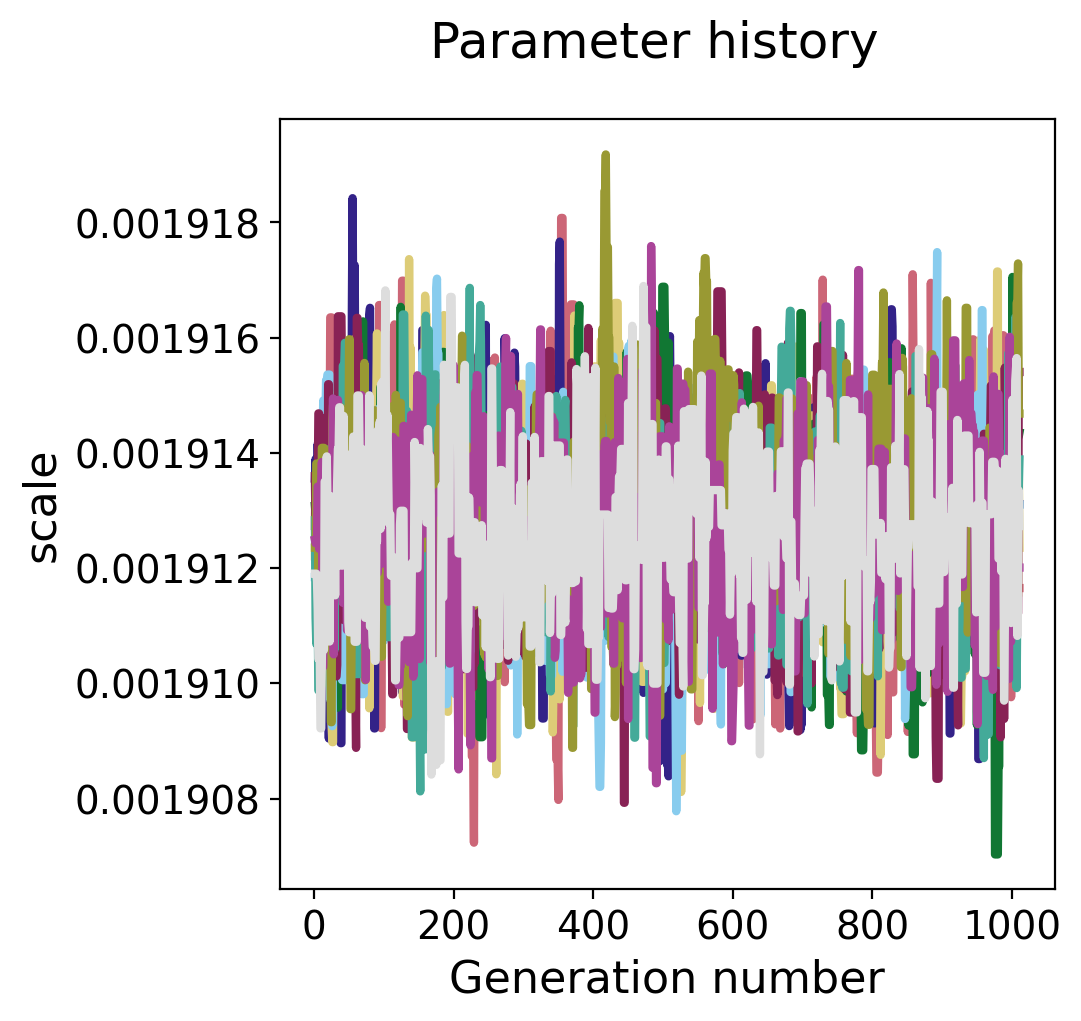

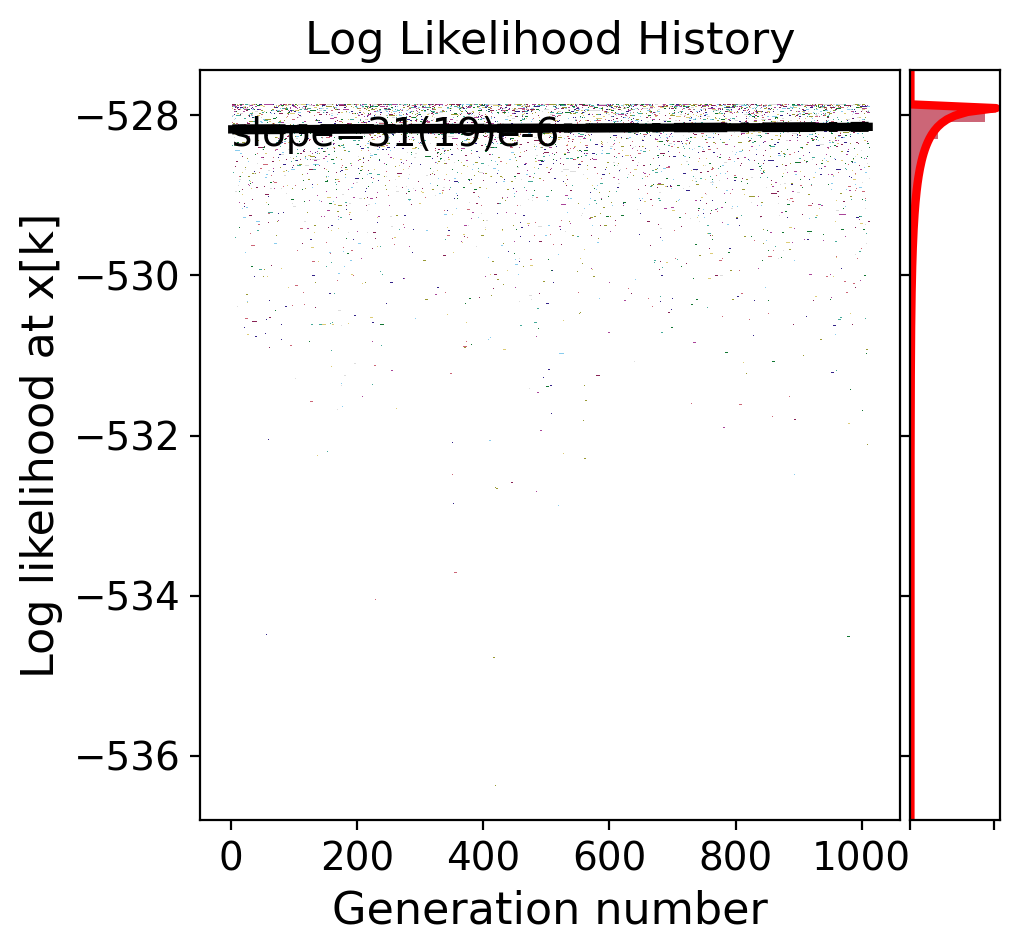

<Figure size 500x500 with 0 Axes>

In [ ]:
results.state.show(figfile='save_dream_results')

## 3.6 Simultaneous fitting

It is also possible to fit two or more datasets simulataneous, i.e., keep parameters equivalent across multiple datasets as they vary during the fit. This can be useful if, for example, you collected both USANS and SANS data for the same sample and would like to fit a sphere model across both datasets. Instead of desmearing the data and merging the datasets prior to fitting them, each dataset can be fit with it's own smeared model.

Two datasets will be created in the next cell for this exercise. We will be looking at polystyrene nanoparticles in heavy water.

In [ ]:
# @title
# generate polystyrene np sans and usans data

q_min = 0.002
q_max = 0.3
num_q = 100
q = np.logspace(np.log10(q_min), np.log10(q_max), num_q)
data = sasmodels.data.empty_data1D(q, resolution=0.05)
kernel = sasmodels.core.load_model("sphere")
call_kernel = sasmodels.direct_model.DirectModel(data, kernel)

call_kernel.simulate_data(background=0.096, noise=15, radius=5295, radius_pd=0.05, radius_pd_n=35, radius_pd_nsigmas=35, radius_pd_type='gaussian', scale=0.05, sld=periodictable.nsf.neutron_sld(compound="C8H8", density=1.05)[0], sld_solvent=periodictable.nsf.neutron_sld(compound="D2O", density=1.11)[0])

# plt.errorbar(data.x, call_kernel.Iq, yerr=call_kernel.dIq, fmt='o')
# plt.xscale('log')
# plt.yscale('log')

data_save = np.vstack((data.x, call_kernel.Iq, call_kernel.dIq, data.dx)).T
np.savetxt("PolystyreneNP2_SANS.txt", data_save, header="q (1/Ang), I(q) (1/cm), dI(q), dq")

q_min = 0.00008
q_max = 0.003
num_q = 30
q = np.logspace(np.log10(q_min), np.log10(q_max), num_q)
data = sasmodels.data.empty_data1D(q)
kernel = sasmodels.core.load_model("sphere")
call_kernel = sasmodels.direct_model.DirectModel(data, kernel)
call_kernel.resolution = sasmodels.resolution.Slit1D(data.x, 0.117)

call_kernel.simulate_data(background=0, noise=20, radius=5295, radius_pd=0.05, radius_pd_n=35, radius_pd_nsigmas=35, radius_pd_type='gaussian', scale=0.05, sld=periodictable.nsf.neutron_sld(compound="C8H8", density=1.05)[0], sld_solvent=periodictable.nsf.neutron_sld(compound="D2O", density=1.11)[0])

# plt.errorbar(data.x, call_kernel.Iq, yerr=call_kernel.dIq, fmt='o')
# plt.xscale('log')
# plt.yscale('log')

data_save = np.vstack((data.x, call_kernel.Iq, call_kernel.dIq)).T
np.savetxt("PolystyreneNP2_USANS.txt", data_save, header="q (1/Ang), I(q) (1/cm), dI(q), dq")

In [ ]:
sans_data = np.loadtxt("PolystyreneNP2_SANS.txt")
sans_data = sasmodels.data.Data1D(x=sans_data[:,0], y=sans_data[:,1], dy=sans_data[:,2], dx=sans_data[:,3])
usans_data = np.loadtxt("PolystyreneNP2_USANS.txt")
usans_data = sasmodels.data.Data1D(x=usans_data[:,0], y=usans_data[:,1], dy=usans_data[:,2])


Next, setup the kernel:

In [ ]:
kernel = sasmodels.core.load_model("sphere")

Determine the sld of the polystyrene nanoparticles and the heavy water solvent.

In [ ]:
sld_ps = periodictable.nsf.neutron_sld(compound="C8H8", density=1.05)[0]
sld_d2o = periodictable.nsf.neutron_sld(compound="D2O", density=1.11)[0]

Create a single model and specify which parameters will be fit:

In [ ]:
model = sasmodels.bumps_model.Model(
    kernel,
    sld=sld_ps,
    sld_solvent=sld_d2o,
    radius_pd = 0.05
)

model.radius.range(0, 10000)
model.scale.range(0,1)
model.background.range(0,1)



Parameter(background)

Create two separate experiments for the sans and usans datasets. The resolution dq was extracted from the SANS dataset, but the USANS dataset is slit smeared with a length of 0.117 inverse Angstroms. The resolution can be applied to the experiment, similar to the callable kernel.

In [ ]:
sans_experiment = sasmodels.bumps_model.Experiment(data=sans_data, model=model)
usans_experiment = sasmodels.bumps_model.Experiment(data=usans_data, model=model)
usans_experiment.resolution = sasmodels.resolution.Slit1D(usans_data.x, 0.117)

We can create a `MultiFitProblem` in bumps by passing a list of experiments rather than a single one. Then fit as normal and plot the results.

In [ ]:
problem = bumps.fitproblem.FitProblem([sans_experiment, usans_experiment])
results = bumps.fitters.fit(problem, method='dream', verbose=True)

# steps: 334, # draws: 10020
step 1 cost 18392643.192(28)
                              background |......... 0.000999582 in (0,1)
                                  radius |.........    49.9905 in (0,10000)
                                   scale .........|   0.999999 in (0,1)
step 21 cost 14376830.735(28)
step 42 cost 14.112(28)
step 62 cost 1.362(28)
step 82 cost 1.362(28)
step 102 cost 1.173(28)
step 123 cost 1.173(28)
step 133 cost 1.173(28)
step 142 cost 1.131(28)
step 151 cost 1.131(28)
step 160 cost 1.122(28)
step 176 cost 1.116(28)
step 196 cost 1.116(28)
step 216 cost 1.115(28)
step 236 cost 1.115(28)
step 257 cost 1.115(28)
step 277 cost 1.115(28)
step 298 cost 1.115(28)
step 319 cost 1.115(28)
step 339 cost 1.115(28)
step 360 cost 1.115(28)
step 372 cost 1.115(28)
step 382 cost 1.115(28)
step 391 cost 1.115(28)
step 401 cost 1.115(28)
step 420 cost 1.115(28)
step 440 cost 1.115(28)
final chisq 1.115(28)
=== Uncertainty from curvature:     name   value(unc.) ===
            

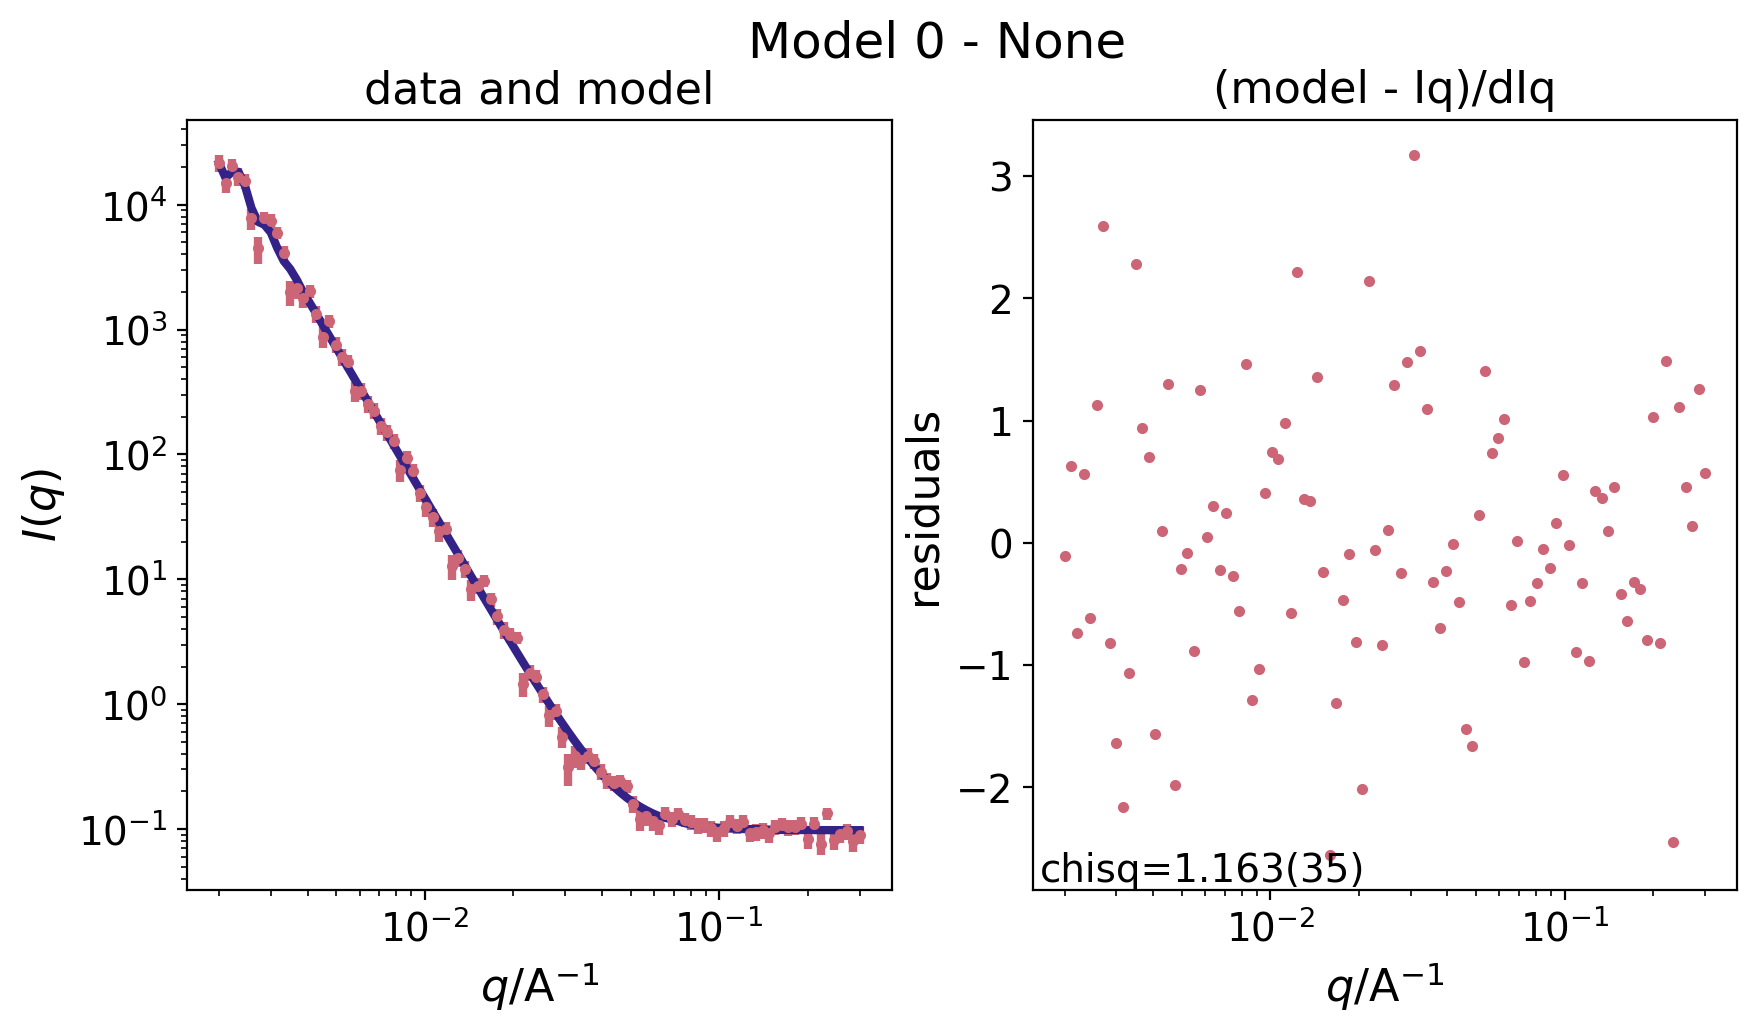

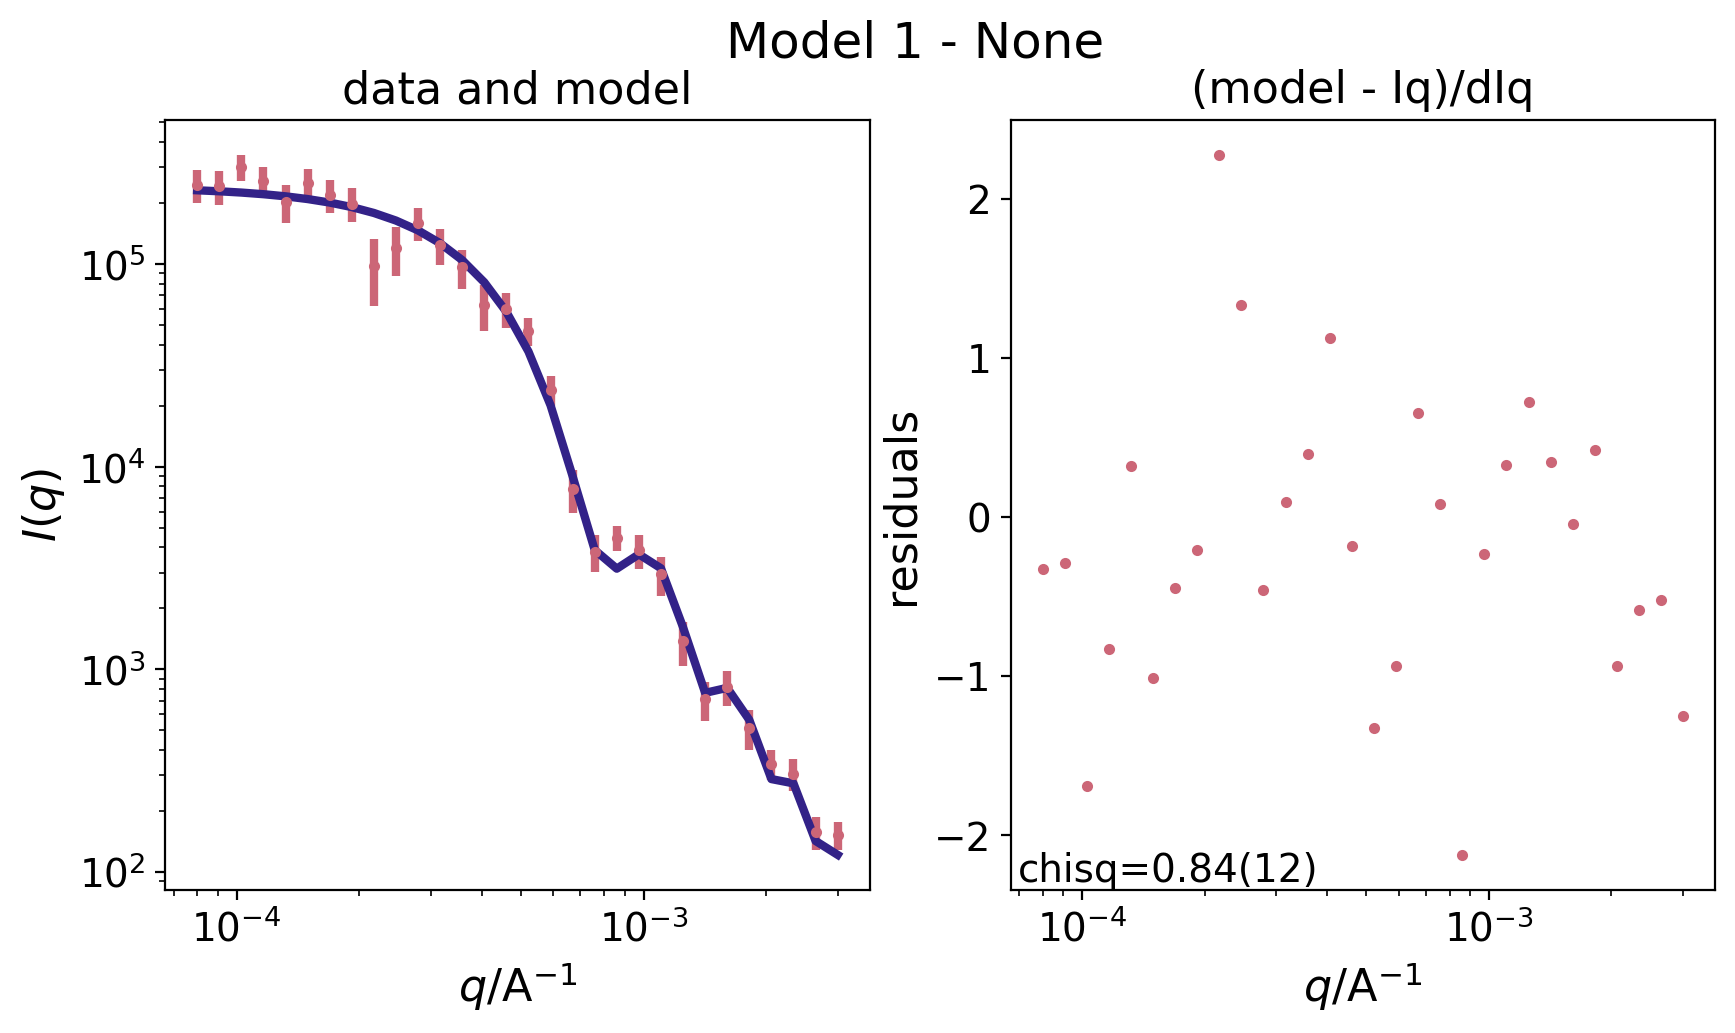

In [ ]:
plt.rc("figure", figsize=(10,5)) # temporarily change default figure size
problem.plot()


Let's make a single plot with all the datasets:

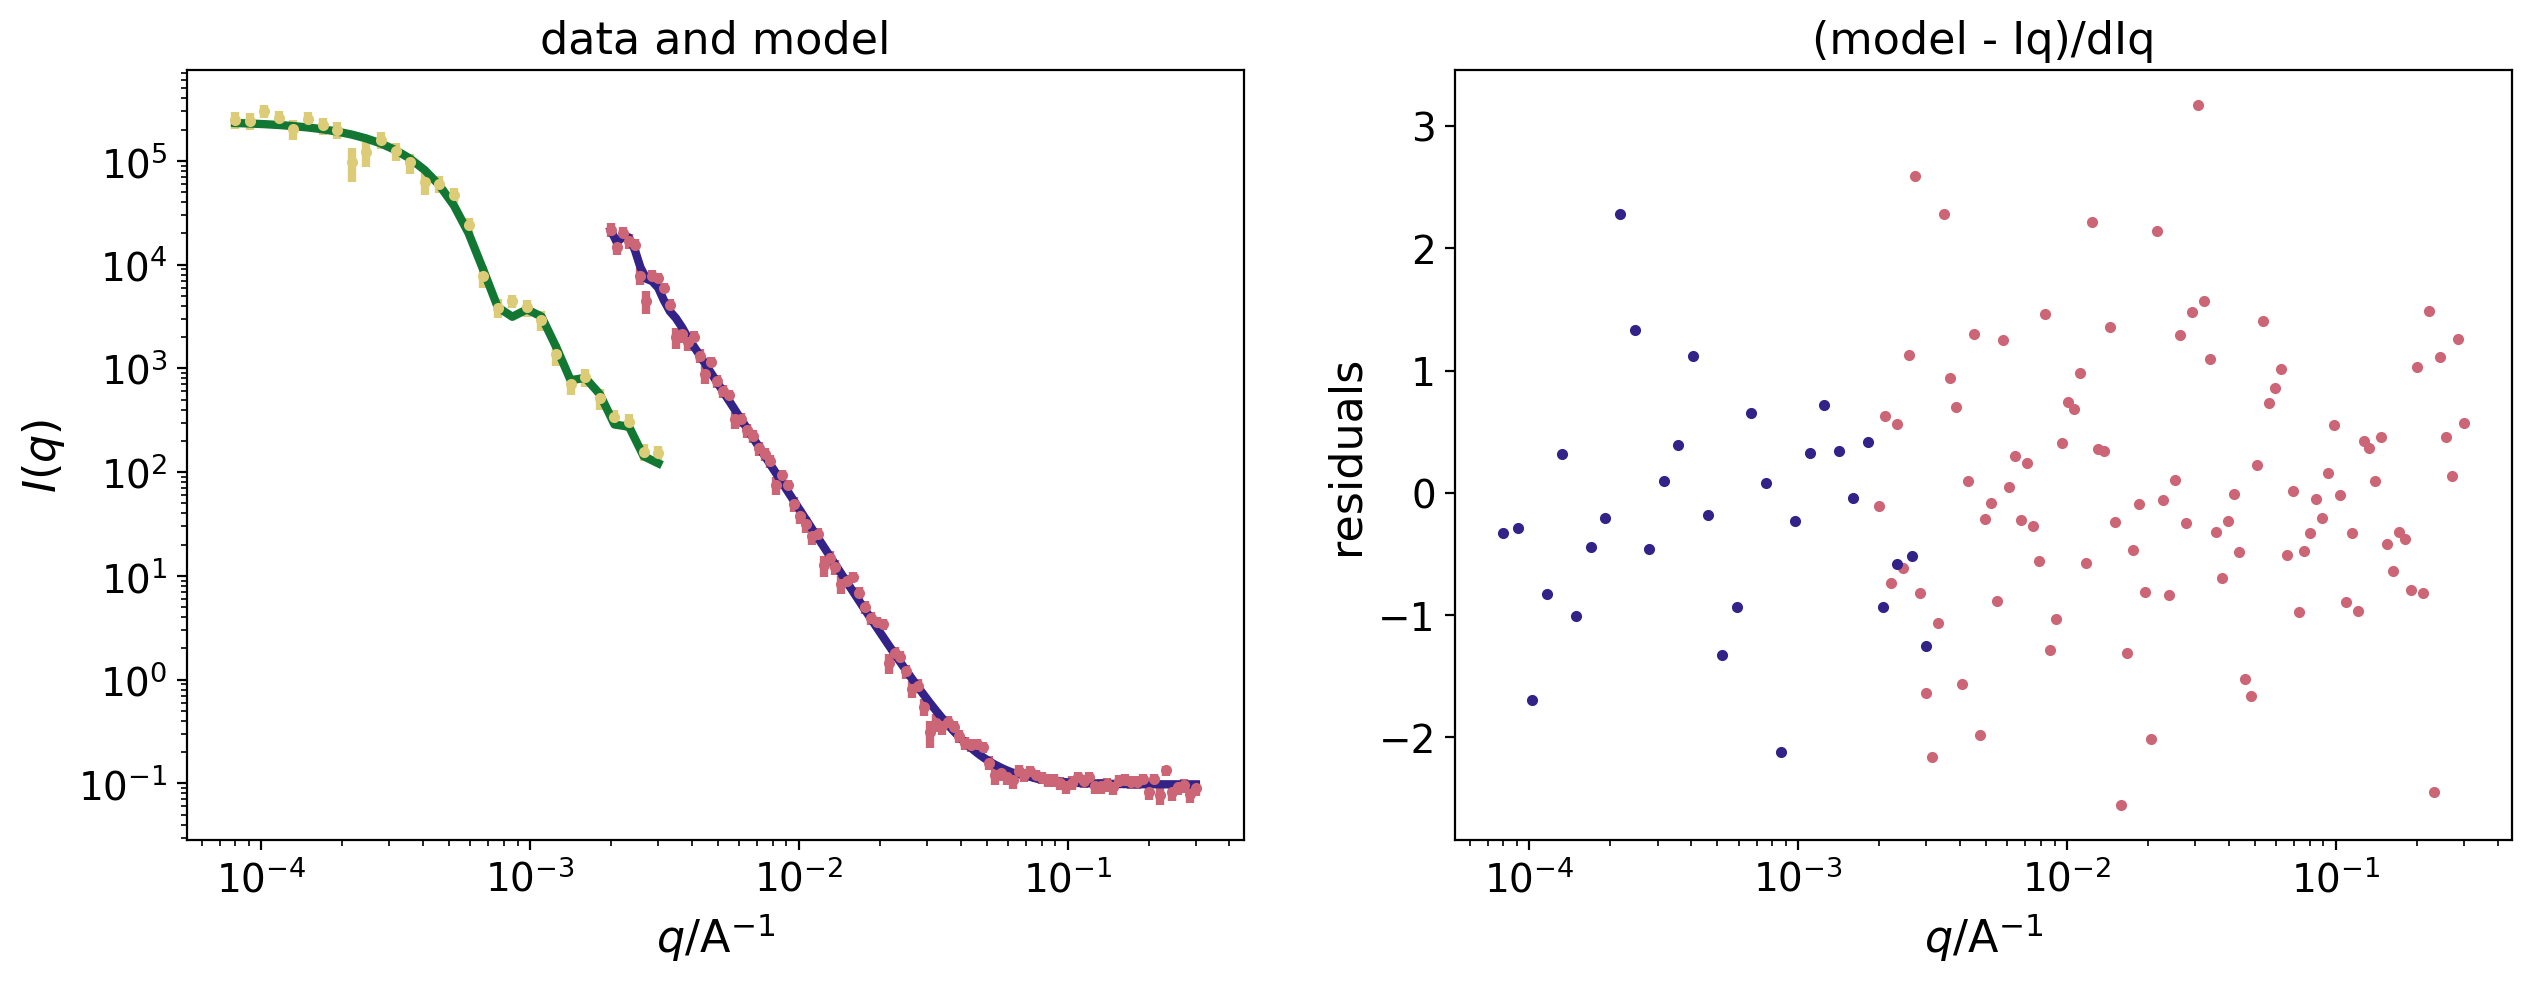

In [ ]:
plt.rc("figure", figsize=(15,5))

sans_experiment.plot()
usans_experiment.plot()



We can also confirm the fit parameters are equivalent across both datasets:

In [ ]:
sans_experiment.parameters()["radius"].value, usans_experiment.parameters()["radius"].value, model.radius.value

(5319.6805931882145, 5319.6805931882145, 5319.6805931882145)

## 3.7 Saving your fit

Remember to export your results when you are done fitting! You can do this in any format you like. I will typically export my fitting results and uncertainties along side the entire set of parameters for my model. When I am plotting my fit alongside my data, I can easily load the entire dictionary of parameters, simulate the model, and then plot alongside my experimental data.

Here I will show an example of how to export the dictionary of model parameters in model.state() to a csv file.

In [ ]:
import csv

with open('fit_parameters_sphere_simultaneous.csv','w') as f:
    w = csv.writer(f)
    w.writerows(model.state().items())
f.close()

# 4.&nbsp;Final Exercise, Discussion, Q&A

What questions do you still have? What about your own dataset? Use this time to try loading in some scattering data of your own and implementing a single fit. I'll be walking around to answer questions and help everyone get started implementing their own custom fitting protocols.

You can also follow along with the dataset below if you prefer. It is another example of fitting but for SESANS data! The protocol is the same as fitting regular SAS data. However, remember it's the data object that tells sasmodels what you need and the appropriate resolution. In this case, a SESANS data object (a type of Data1D) will tell sasmodels to compute the Hankel transform and provide you the model data in correlation space.

Run this cell to load the SESANS dataset from the sasview example data.

In [ ]:
url = 'https://raw.githubusercontent.com/SasView/sasview/main/src/sas/example_data/sesans_data/sphere2micron.ses'
!wget 'content/' {url}

# the Loader can load a single or multiple files, so it creates a list of the data objects
# we will just select the first object in the list and work with single files for now
loaded_data_list = Loader().load(url.split('/')[-1])
data = loaded_data_list[0]

--2024-01-20 03:53:34--  http://content/
Resolving content (content)... failed: Name or service not known.
wget: unable to resolve host address ‘content’
--2024-01-20 03:53:34--  https://raw.githubusercontent.com/SasView/sasview/main/src/sas/example_data/sesans_data/sphere2micron.ses
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3319 (3.2K) [text/plain]
Saving to: ‘sphere2micron.ses.1’

sphere2micron.ses.1 100%[===================>]   3.24K  --.-KB/s    in 0s      

2024-01-20 03:53:34 (53.0 MB/s) - ‘sphere2micron.ses.1’ saved [3319/3319]

FINISHED --2024-01-20 03:53:34--
Total wall clock time: 0.2s
Downloaded: 1 files, 3.2K in 0s (53.0 MB/s)


Now setup a single curve fit just like we did before with the SAS data. Set up your kernel, parameters, bumps model, experiment, and fit problem. Don't forget to plot your results! You may have to play around with the parameters to get a good starting place. How does the plot and data compare to the SAS results we saw before?

step 1 cost 14.592(60)
                                  radius ....|.....      10000 in (0,20000)
                                   scale |.........      0.005 in (0,1)
final chisq 1.052(60)
=== Uncertainty from curvature:     name   value(unc.) ===
                                  radius   10.38(11)e3    
                                   scale   0.005324(53)   


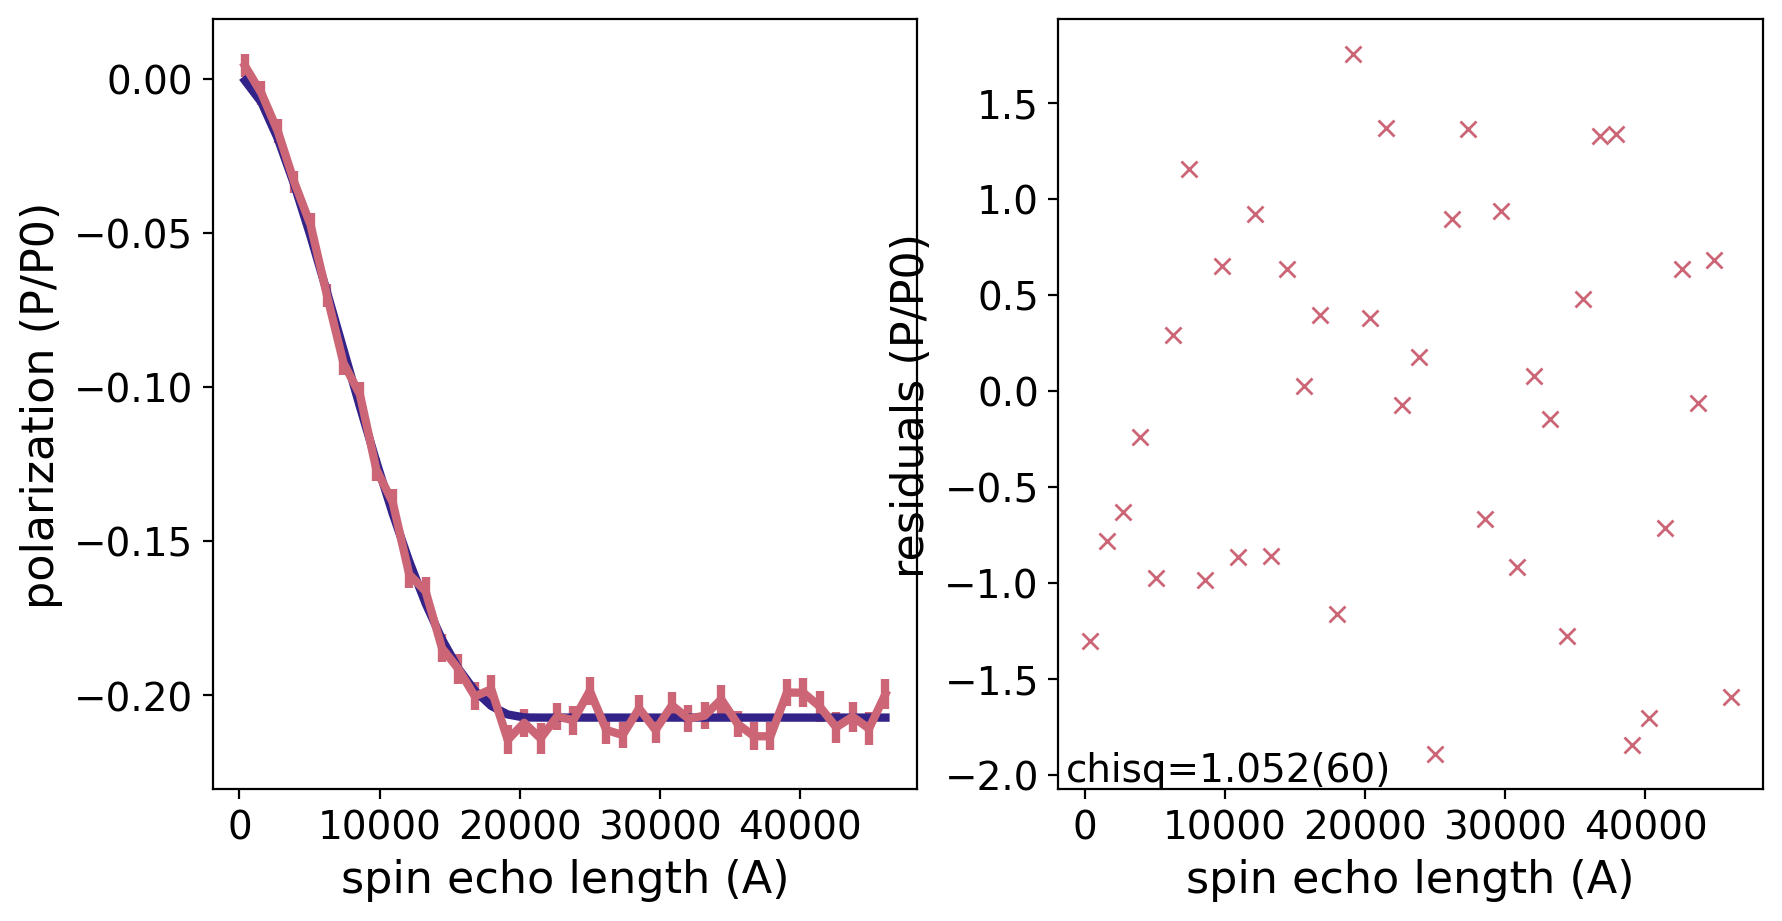

In [ ]:
params = {
    "radius": 10000,
    "background": 0, # always set to 0 for sesans data fits!
    "scale": 0.005
}
kernel = sasmodels.core.load_model("sphere")
model = sasmodels.bumps_model.Model(model=kernel, **params)

model.scale.range(0, 1)
model.radius.range(0, 20000)

experiment = sasmodels.bumps_model.Experiment(data=data, model=model)

problem = bumps.fitproblem.FitProblem(experiment)

results = bumps.fitters.fit(problem, verbose=True)
plt.figure(figsize=(10, 5))
problem.plot()

#5.&nbsp;Bonus Section: 2D datasets

We can apply a similar approach to what we learned above for 1D datasets to 2D scattering datasets.

In order to generate an empty 2D dataset, we need to define the maximum q at the edges and the number of q-values (could think of this as number of pixels along the x and y direction of a square detector):

In [ ]:
q_max = 0.4 # limit along edge of detector
num_q = 100 # number of q values along x and y directions, use even number
q = np.linspace(q_max*0.5/(int(num_q/2)-0.5), q_max, int(num_q/2))
q = np.hstack((-1*np.flip(q), q))
data2d = sasmodels.data.empty_data2D(qx=q, qy=q, resolution=0)

At each "pixel" location, the true q-value has qx and qy components, and so the 2D empty dataset is structured with a `qx_data` array and `qy_data` array that is used to calculate the `q_data` array as $q=(qx^2+qy^2)^{\frac{1}{2}}$.



In [ ]:
data2d.qx_data[:num_q]

array([-0.4       , -0.39191919, -0.38383838, -0.37575758, -0.36767677,
       -0.35959596, -0.35151515, -0.34343434, -0.33535354, -0.32727273,
       -0.31919192, -0.31111111, -0.3030303 , -0.29494949, -0.28686869,
       -0.27878788, -0.27070707, -0.26262626, -0.25454545, -0.24646465,
       -0.23838384, -0.23030303, -0.22222222, -0.21414141, -0.20606061,
       -0.1979798 , -0.18989899, -0.18181818, -0.17373737, -0.16565657,
       -0.15757576, -0.14949495, -0.14141414, -0.13333333, -0.12525253,
       -0.11717172, -0.10909091, -0.1010101 , -0.09292929, -0.08484848,
       -0.07676768, -0.06868687, -0.06060606, -0.05252525, -0.04444444,
       -0.03636364, -0.02828283, -0.02020202, -0.01212121, -0.0040404 ,
        0.0040404 ,  0.01212121,  0.02020202,  0.02828283,  0.03636364,
        0.04444444,  0.05252525,  0.06060606,  0.06868687,  0.07676768,
        0.08484848,  0.09292929,  0.1010101 ,  0.10909091,  0.11717172,
        0.12525253,  0.13333333,  0.14141414,  0.14949495,  0.15

In [ ]:
data2d.qx_data[num_q:num_q*2]

array([-0.4       , -0.39191919, -0.38383838, -0.37575758, -0.36767677,
       -0.35959596, -0.35151515, -0.34343434, -0.33535354, -0.32727273,
       -0.31919192, -0.31111111, -0.3030303 , -0.29494949, -0.28686869,
       -0.27878788, -0.27070707, -0.26262626, -0.25454545, -0.24646465,
       -0.23838384, -0.23030303, -0.22222222, -0.21414141, -0.20606061,
       -0.1979798 , -0.18989899, -0.18181818, -0.17373737, -0.16565657,
       -0.15757576, -0.14949495, -0.14141414, -0.13333333, -0.12525253,
       -0.11717172, -0.10909091, -0.1010101 , -0.09292929, -0.08484848,
       -0.07676768, -0.06868687, -0.06060606, -0.05252525, -0.04444444,
       -0.03636364, -0.02828283, -0.02020202, -0.01212121, -0.0040404 ,
        0.0040404 ,  0.01212121,  0.02020202,  0.02828283,  0.03636364,
        0.04444444,  0.05252525,  0.06060606,  0.06868687,  0.07676768,
        0.08484848,  0.09292929,  0.1010101 ,  0.10909091,  0.11717172,
        0.12525253,  0.13333333,  0.14141414,  0.14949495,  0.15

In [ ]:
data2d.qy_data[:num_q]

array([-0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4,
       -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4,
       -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4,
       -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4,
       -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4,
       -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4,
       -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4,
       -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4,
       -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4,
       -0.4])

In [ ]:
data2d.qy_data[num_q:num_q*2]

array([-0.39191919, -0.39191919, -0.39191919, -0.39191919, -0.39191919,
       -0.39191919, -0.39191919, -0.39191919, -0.39191919, -0.39191919,
       -0.39191919, -0.39191919, -0.39191919, -0.39191919, -0.39191919,
       -0.39191919, -0.39191919, -0.39191919, -0.39191919, -0.39191919,
       -0.39191919, -0.39191919, -0.39191919, -0.39191919, -0.39191919,
       -0.39191919, -0.39191919, -0.39191919, -0.39191919, -0.39191919,
       -0.39191919, -0.39191919, -0.39191919, -0.39191919, -0.39191919,
       -0.39191919, -0.39191919, -0.39191919, -0.39191919, -0.39191919,
       -0.39191919, -0.39191919, -0.39191919, -0.39191919, -0.39191919,
       -0.39191919, -0.39191919, -0.39191919, -0.39191919, -0.39191919,
       -0.39191919, -0.39191919, -0.39191919, -0.39191919, -0.39191919,
       -0.39191919, -0.39191919, -0.39191919, -0.39191919, -0.39191919,
       -0.39191919, -0.39191919, -0.39191919, -0.39191919, -0.39191919,
       -0.39191919, -0.39191919, -0.39191919, -0.39191919, -0.39

Let's plot the 2D scattering intensity for oriented [cylinders](https://www.sasview.org/docs/user/models/cylinder.html).

In [ ]:
kernel = sasmodels.core.load_model("cylinder")
call_kernel = sasmodels.direct_model.DirectModel(data2d, kernel)
kernel.info.parameters.defaults

{'scale': 1,
 'background': 0.001,
 'sld': 4,
 'sld_solvent': 1,
 'radius': 20,
 'length': 400,
 'theta': 60,
 'phi': 60,
 'up_frac_i': 0.0,
 'up_frac_f': 0.0,
 'up_angle': 0.0,
 'up_phi': 0.0,
 'sld_M0': 0.0,
 'sld_mtheta': 0.0,
 'sld_mphi': 0.0,
 'sld_solvent_M0': 0.0,
 'sld_solvent_mtheta': 0.0,
 'sld_solvent_mphi': 0.0}

The `phi` and `theta` parameters now become relevant when we are in the 2D space. The SasView cylinder [documentation](https://www.sasview.org/docs/user/models/cylinder.html) defines these angles as shown below relative to the detector plane.

<img src="https://www.sasview.org/docs/_images/cylinder_angle_definition.png">

*Image source: https://www.sasview.org/docs/user/models/cylinder.html*


Plot the model with the default parameter values:

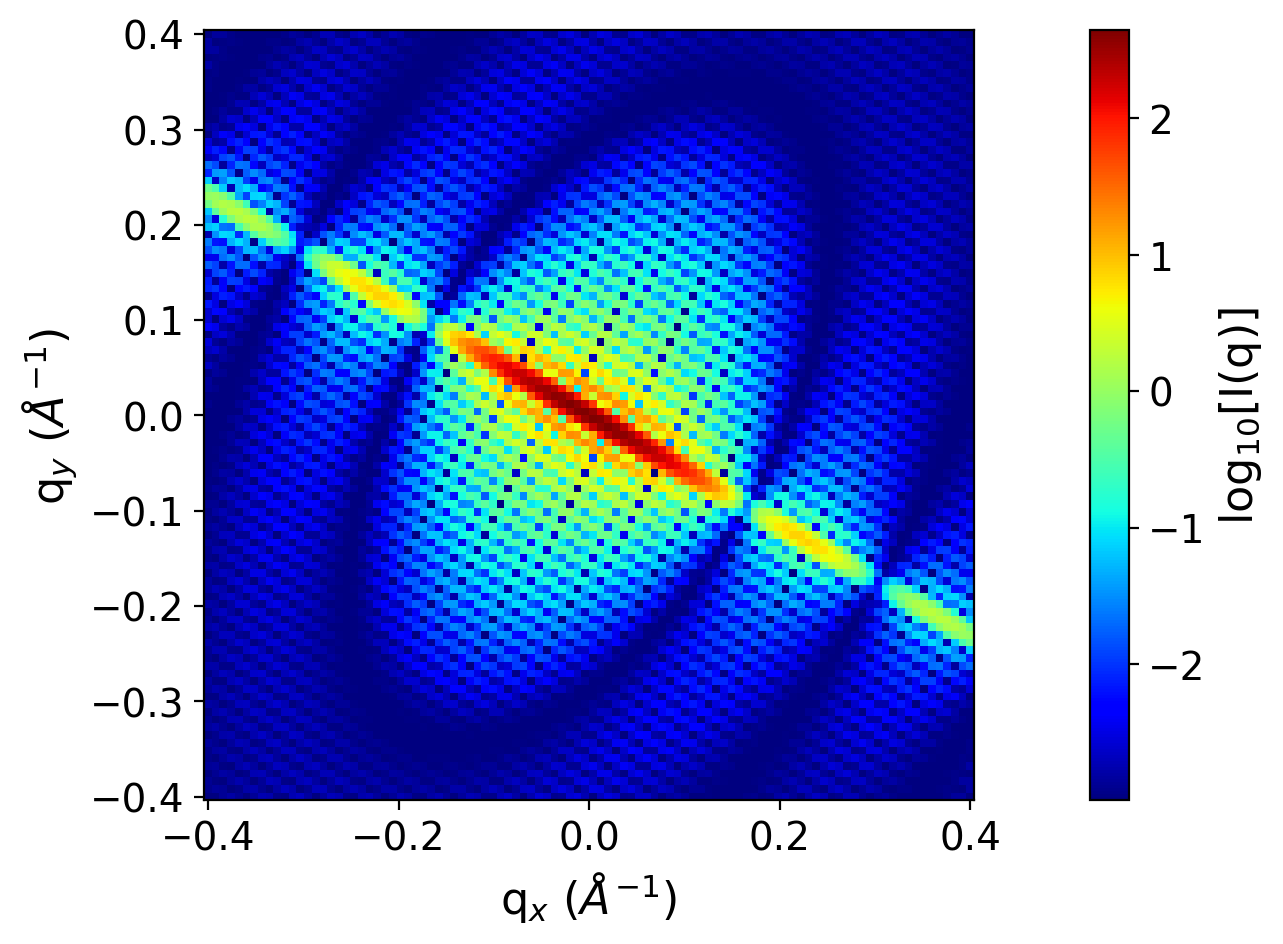

In [ ]:
Iq = call_kernel()

fig, ax = plt.subplots()
im = ax.pcolormesh(data2d.qx_data.reshape(2*int(num_q/2), -1), data2d.qy_data.reshape(2*int(num_q/2), -1), np.log10(Iq.reshape(2*int(num_q/2), -1)), cmap='jet')
fig.colorbar(im, label='log$_{10}$[I(q)]')

ratio = 1.0
x_min, x_max = (np.min(data2d.qx_data), np.max(data2d.qx_data))
y_min, y_max = (np.min(data2d.qy_data), np.max(data2d.qy_data))
ax.set_aspect(abs((x_max-x_min)/(y_min-y_max))*ratio)

plt.xlabel("q$_x$ ($\AA^{-1}$)")
plt.ylabel("q$_y$ ($\AA^{-1}$)")

plt.show()


Plot the 2D scattering data for the two projections shown below:

<img src="https://www.sasview.org/docs/_images/cylinder_angle_projection.png">

*Image source: https://www.sasview.org/docs/user/models/cylinder.html*

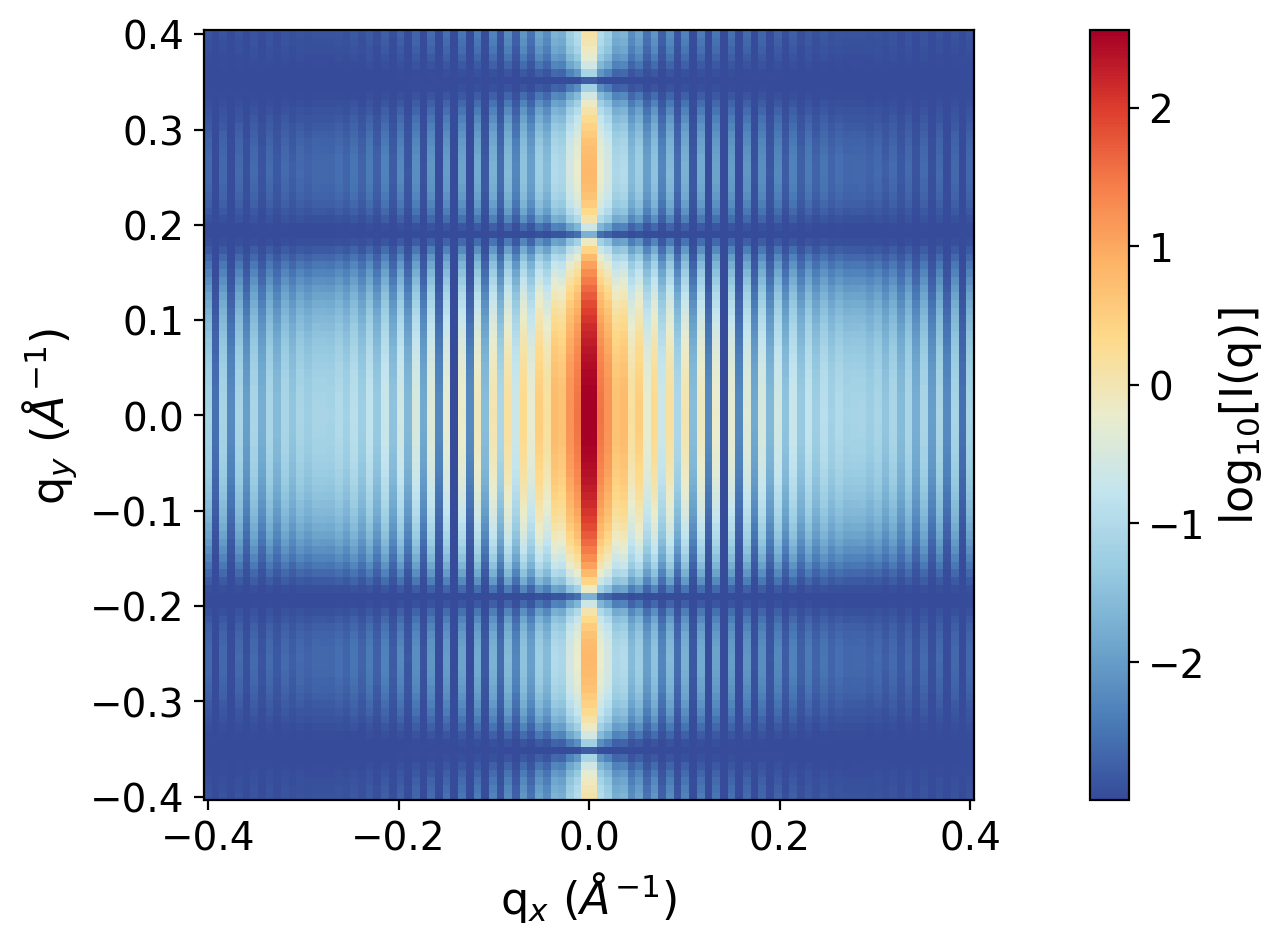

In [ ]:
Iq = call_kernel(phi=0, theta=90)

fig, ax = plt.subplots()
im = ax.pcolormesh(data2d.qx_data.reshape(2*int(num_q/2), -1), data2d.qy_data.reshape(2*int(num_q/2), -1), np.log10(Iq.reshape(2*int(num_q/2), -1)), cmap=tc.tol_cmap('sunset'))
fig.colorbar(im, label='log$_{10}$[I(q)]')

ratio = 1.0
x_min, x_max = (np.min(data2d.qx_data), np.max(data2d.qx_data))
y_min, y_max = (np.min(data2d.qy_data), np.max(data2d.qy_data))
ax.set_aspect(abs((x_max-x_min)/(y_min-y_max))*ratio)

plt.xlabel("q$_x$ ($\AA^{-1}$)")
plt.ylabel("q$_y$ ($\AA^{-1}$)")

plt.show()

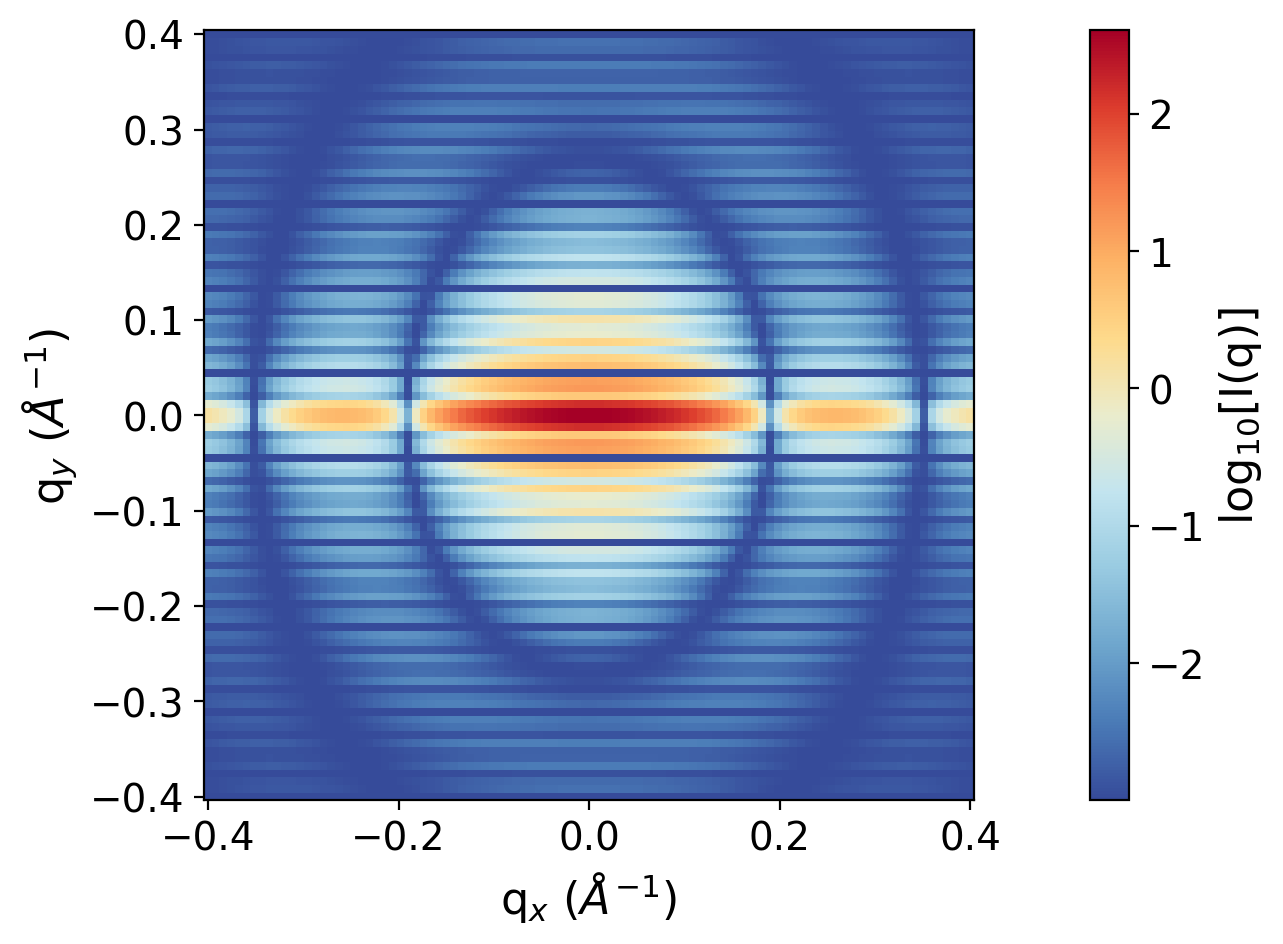

In [ ]:
Iq = call_kernel(phi=90, theta=45)

fig, ax = plt.subplots()
im = ax.pcolormesh(data2d.qx_data.reshape(2*int(num_q/2), -1), data2d.qy_data.reshape(2*int(num_q/2), -1), np.log10(Iq.reshape(2*int(num_q/2), -1)), cmap=tc.tol_cmap('sunset'))
fig.colorbar(im, label='log$_{10}$[I(q)]')

ratio = 1.0
x_min, x_max = (np.min(data2d.qx_data), np.max(data2d.qx_data))
y_min, y_max = (np.min(data2d.qy_data), np.max(data2d.qy_data))
ax.set_aspect(abs((x_max-x_min)/(y_min-y_max))*ratio)

plt.xlabel("q$_x$ ($\AA^{-1}$)")
plt.ylabel("q$_y$ ($\AA^{-1}$)")

plt.show()

What happens when both `phi` and `theta` are set to 0 degrees? What do the neutrons "see"?

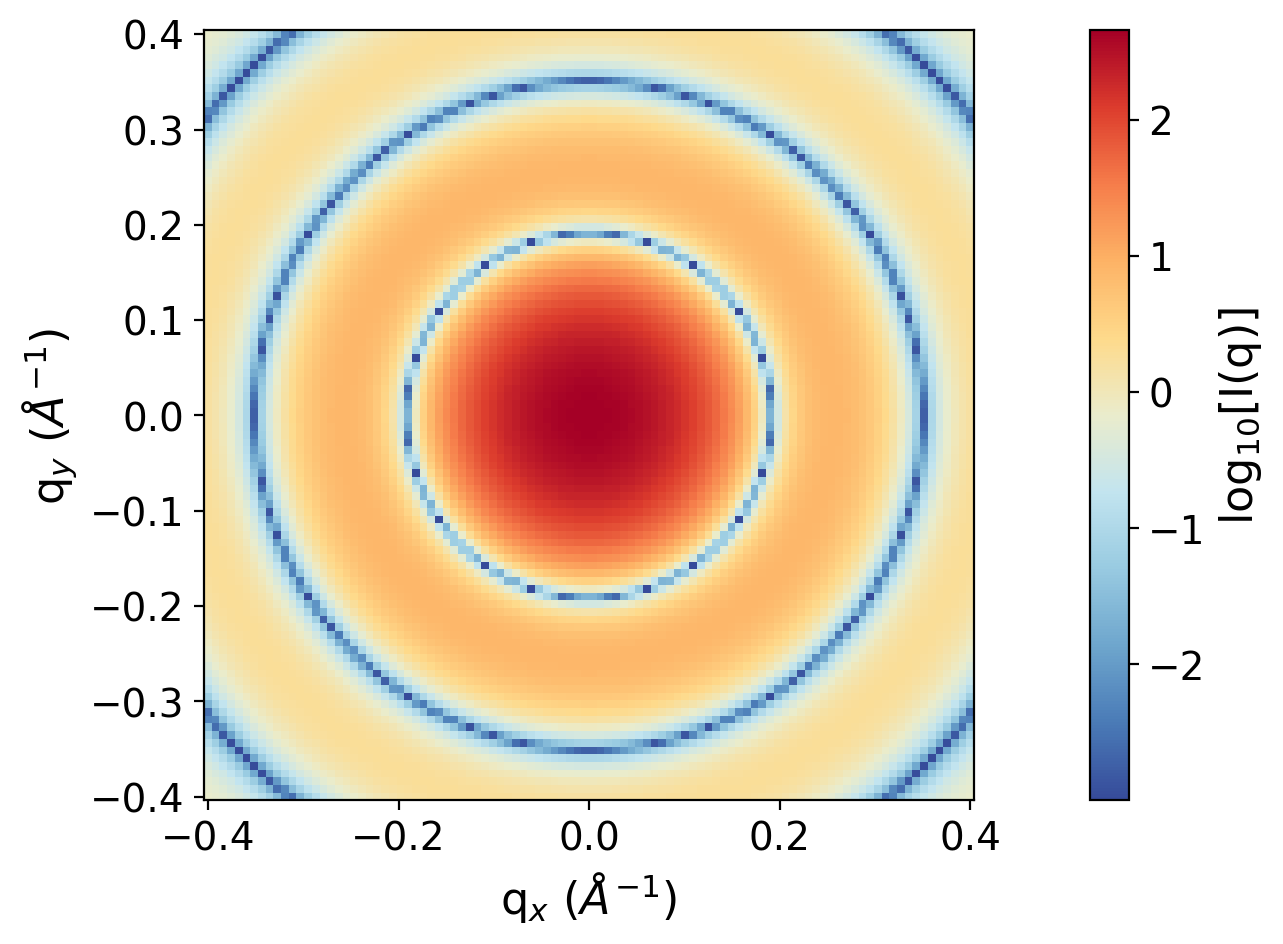

In [ ]:
Iq = call_kernel(phi=0, theta=0)

fig, ax = plt.subplots()
im = ax.pcolormesh(data2d.qx_data.reshape(2*int(num_q/2), -1), data2d.qy_data.reshape(2*int(num_q/2), -1), np.log10(Iq.reshape(2*int(num_q/2), -1)), cmap=tc.tol_cmap('sunset'))
fig.colorbar(im, label='log$_{10}$[I(q)]')

ratio = 1.0
x_min, x_max = (np.min(data2d.qx_data), np.max(data2d.qx_data))
y_min, y_max = (np.min(data2d.qy_data), np.max(data2d.qy_data))
ax.set_aspect(abs((x_max-x_min)/(y_min-y_max))*ratio)

plt.xlabel("q$_x$ ($\AA^{-1}$)")
plt.ylabel("q$_y$ ($\AA^{-1}$)")

plt.show()

We can also apply pinhole resolution (no slit smearing yet) but with a different approach. Here we apply the dq/q value directly in the resolution argument of the `empty_data2d` method:

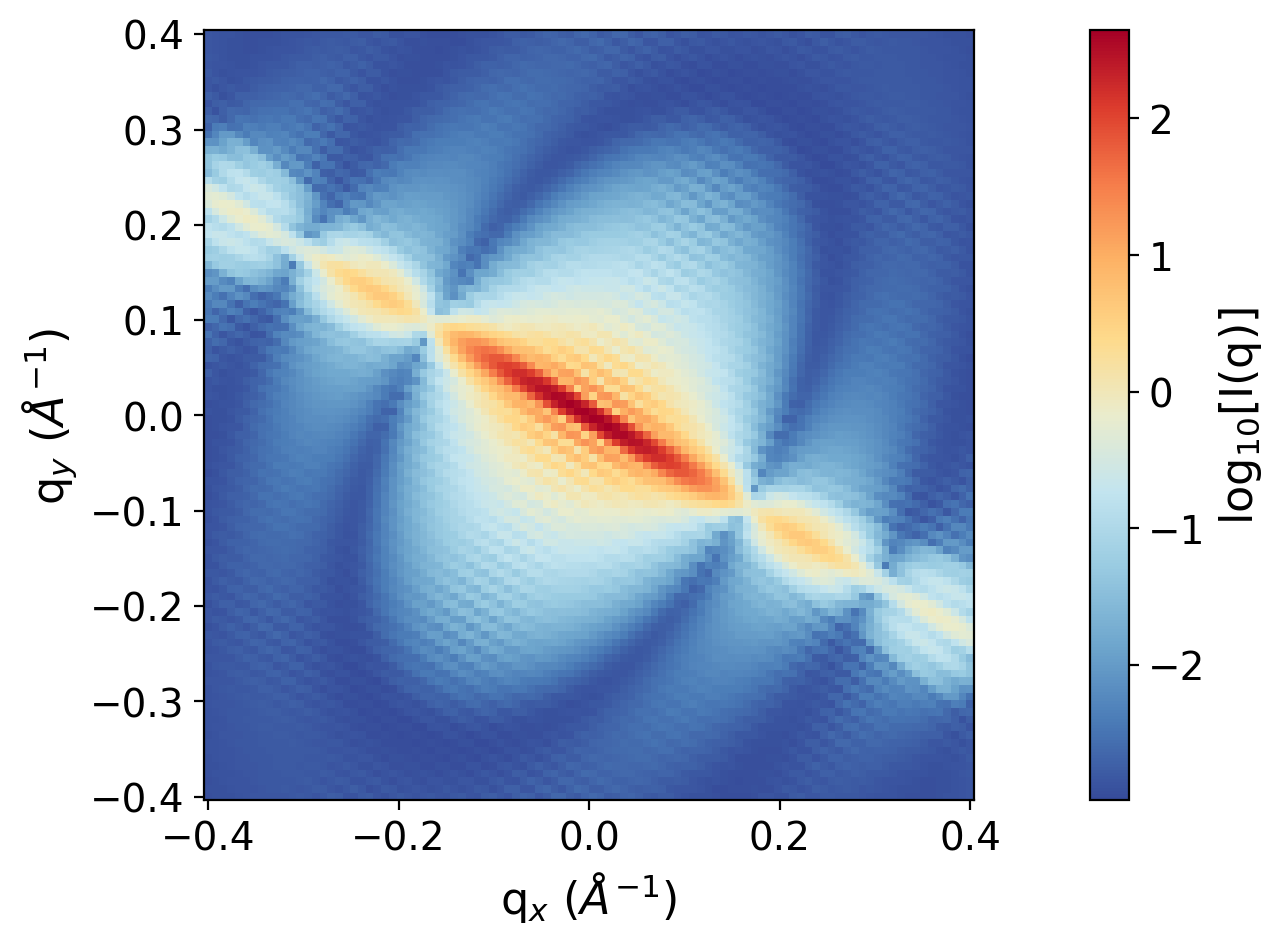

In [ ]:
# apply pinhole resolution when generating empty dataset
data2d = sasmodels.data.empty_data2D(qx=q, qy=q, resolution=0.05)

call_kernel = sasmodels.direct_model.DirectModel(data2d, kernel)

Iq = call_kernel()

fig, ax = plt.subplots()
im = ax.pcolormesh(data2d.qx_data.reshape(2*int(num_q/2), -1), data2d.qy_data.reshape(2*int(num_q/2), -1), np.log10(Iq.reshape(2*int(num_q/2), -1)), cmap=tc.tol_cmap('sunset'))
fig.colorbar(im, label='log$_{10}$[I(q)]')

ratio = 1.0
x_min, x_max = (np.min(data2d.qx_data), np.max(data2d.qx_data))
y_min, y_max = (np.min(data2d.qy_data), np.max(data2d.qy_data))
ax.set_aspect(abs((x_max-x_min)/(y_min-y_max))*ratio)

plt.xlabel("q$_x$ ($\AA^{-1}$)")
plt.ylabel("q$_y$ ($\AA^{-1}$)")

plt.show()

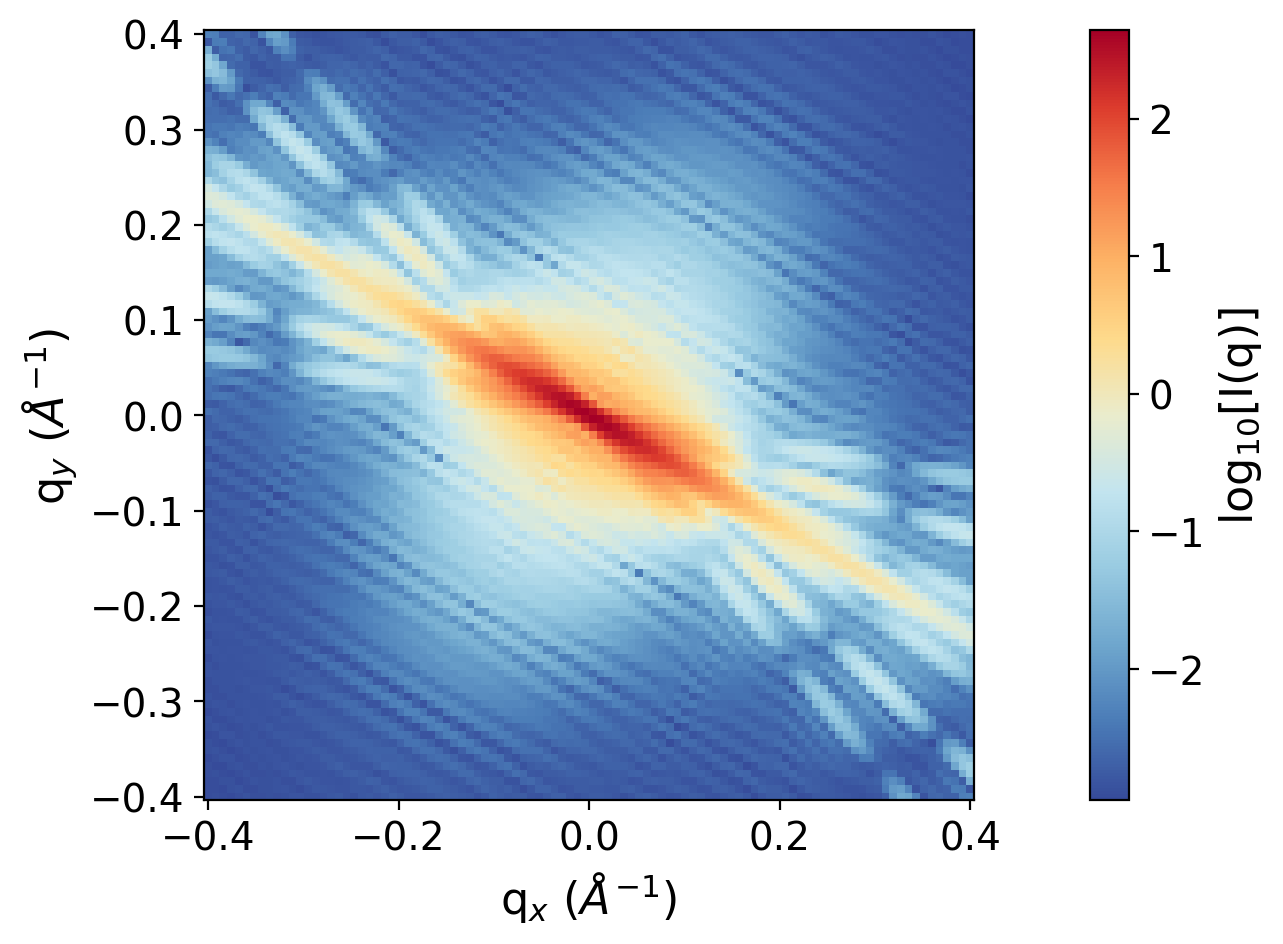

In [ ]:
# apply pinhole resolution when generating empty dataset
data2d = sasmodels.data.empty_data2D(qx=q, qy=q, resolution=0.15)

call_kernel = sasmodels.direct_model.DirectModel(data2d, kernel)

Iq = call_kernel()

fig, ax = plt.subplots()
im = ax.pcolormesh(data2d.qx_data.reshape(2*int(num_q/2), -1), data2d.qy_data.reshape(2*int(num_q/2), -1), np.log10(Iq.reshape(2*int(num_q/2), -1)), cmap=tc.tol_cmap('sunset'))
fig.colorbar(im, label='log$_{10}$[I(q)]')

ratio = 1.0
x_min, x_max = (np.min(data2d.qx_data), np.max(data2d.qx_data))
y_min, y_max = (np.min(data2d.qy_data), np.max(data2d.qy_data))
ax.set_aspect(abs((x_max-x_min)/(y_min-y_max))*ratio)

plt.xlabel("q$_x$ ($\AA^{-1}$)")
plt.ylabel("q$_y$ ($\AA^{-1}$)")

plt.show()